In [1]:
!pip install sktime

# Structuri de date și unelte de analiză
import numpy as np
import pandas as pd 
import sktime

# Vizualizare
import matplotlib.pyplot as plt
from matplotlib import rcParams
from google.colab import drive
import seaborn as sns
from sktime.datasets import load_from_tsfile, load_from_arff_to_dataframe
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from scipy.signal import find_peaks
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 80.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 12.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sktime/__init__.py:45: PackageDeprecationWarning: 
The sktime PyPI package is deprecated.
The sktime project split into two projects.

To find out how to install the new packages, please go to:

* https://github.com/aeon-toolkit/aeon
* https://github.com/sktime/sktime

Here is what you can do when installing sktime via pip (e.g. using `pip install ...` or a requirement file like `requirements.txt`, `setup.py`, `setup.cfg`):

* continue using the package without receiving any updates (ignoring the deprecation warning or avoiding it by pinning the version: `sktime==0.18.0`),
* replace sktime with one of the new projects,
* if the sktime package is used by one of your dependencies, it would be great if you take some time to track which package uses sktime and report to their issue tracker that sktime is deprecated.

More information is available at:
https://github.com/mloning/sktime-deprecation/discussions/2

If the previous advice does not support 

In [ ]:
rs_train_x, rs_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSports_TRAIN.arff')

rs_train_y = pd.DataFrame(rs_train_y, columns=['class'])

rs_train = pd.concat([rs_train_x, rs_train_y], axis=1)

rs_test_x, rs_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSports_TEST.arff')

rs_test_y = pd.DataFrame(rs_test_y, columns=['class'])

rs_test = pd.concat([rs_test_x, rs_test_y], axis=1)


rs_dim1_train_x, rs_dim1_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension1_TRAIN.arff')
rs_dim1_test_x, rs_dim1_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension1_TEST.arff')

rs_dim2_train_x, rs_dim2_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension2_TRAIN.arff')
rs_dim2_test_x, rs_dim2_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension2_TEST.arff')

rs_dim3_train_x, rs_dim3_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension3_TRAIN.arff')
rs_dim3_test_x, rs_dim3_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension3_TEST.arff')

rs_dim4_train_x, rs_dim4_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension4_TRAIN.arff')
rs_dim4_test_x, rs_dim4_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension4_TEST.arff')

rs_dim5_train_x, rs_dim5_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension5_TRAIN.arff')
rs_dim5_test_x, rs_dim5_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension5_TEST.arff')

rs_dim6_train_x, rs_dim5_train_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension6_TRAIN.arff')
rs_dim6_test_x, rs_dim5_test_y = load_from_arff_to_dataframe('/content/drive/MyDrive/ML/Tema1/data1/RacketSportsDimension6_TEST.arff')


mitbih_train = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/mitbih_test.csv', header=None)

ptbdb_abnormal = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/ptbdb_normal.csv', header=None)

ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal], axis=0, ignore_index=True)
print(len(ptbdb))
ptbdb_train, ptbdb_test = train_test_split(ptbdb, test_size=0.2, random_state=42)

14552


# 3.1 Explorarea Datelor (Exploratory Data Analysis)

## 1. Analiza echilibrului de clase

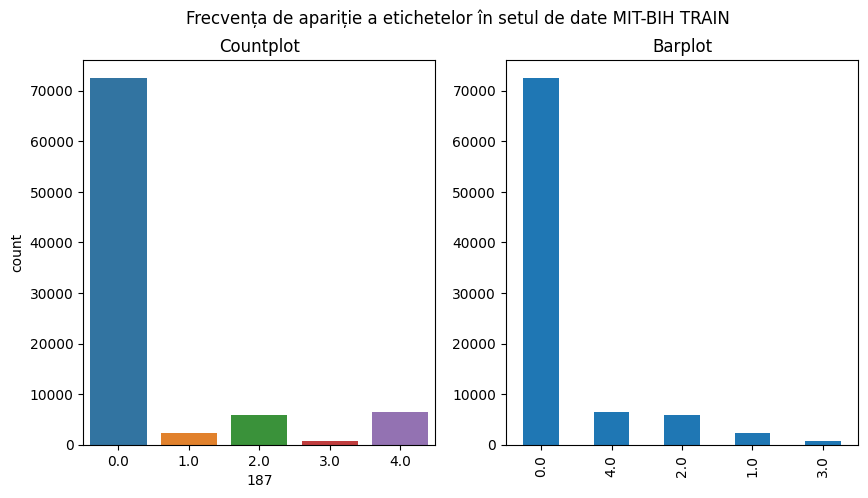

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(x=mitbih_train.columns[-1], data=mitbih_train, ax=ax1)
ax1.set_title('Countplot')

counts = mitbih_train.iloc[:, -1].value_counts()
counts.plot.bar(ax=ax2)
ax2.set_title('Barplot')

fig.suptitle('Frecvența de apariție a etichetelor în setul de date MIT-BIH TRAIN')
plt.show()

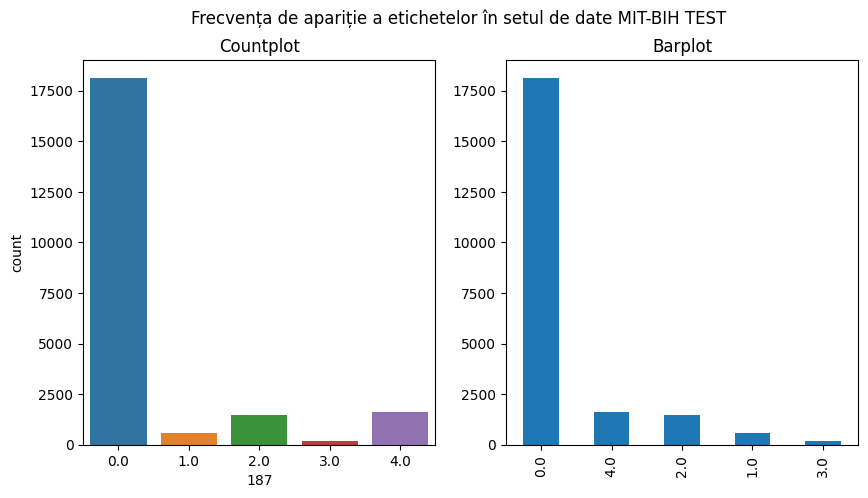

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(x=mitbih_test.columns[-1], data=mitbih_test, ax=ax1)
ax1.set_title('Countplot')

counts = mitbih_test.iloc[:, -1].value_counts()
counts.plot.bar(ax=ax2)
ax2.set_title('Barplot')

fig.suptitle('Frecvența de apariție a etichetelor în setul de date MIT-BIH TEST')
plt.show()

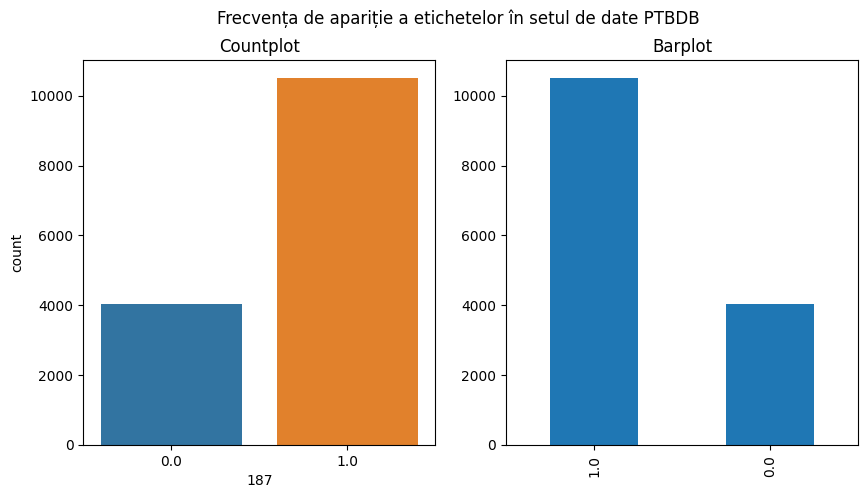

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(x=ptbdb.columns[-1], data=ptbdb, ax=ax1)
ax1.set_title('Countplot')

counts = ptbdb.iloc[:, -1].value_counts()
counts.plot.bar(ax=ax2)
ax2.set_title('Barplot')

fig.suptitle('Frecvența de apariție a etichetelor în setul de date PTBDB')
plt.show()


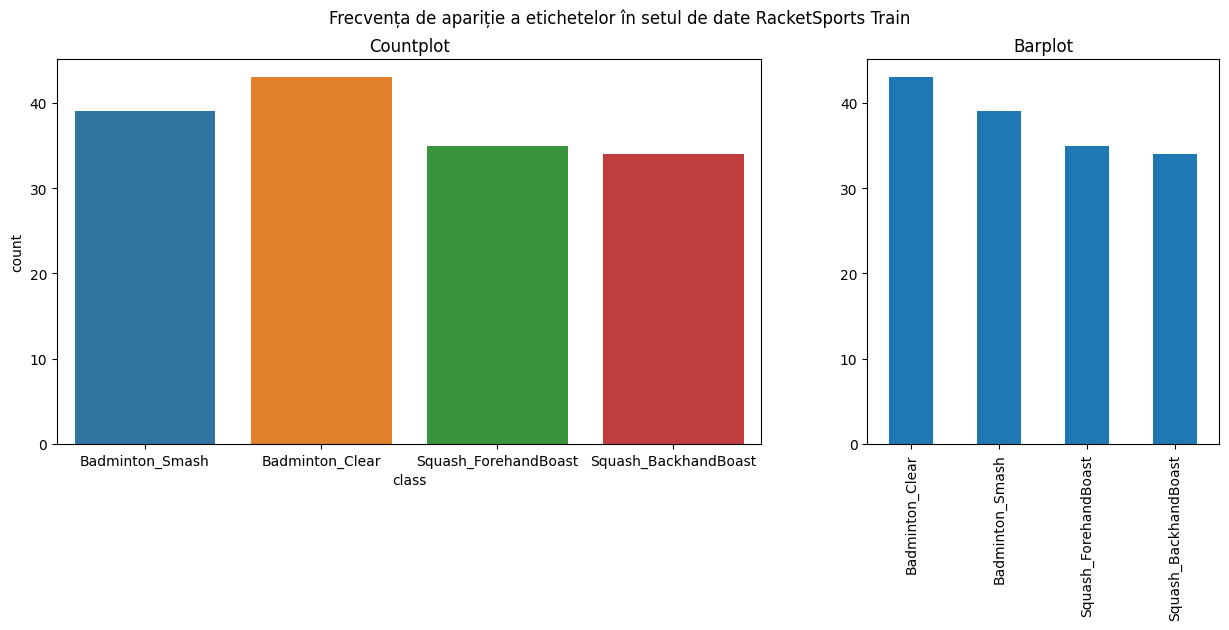

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1]})

sns.countplot(x='class', data=rs_train, ax=ax1)
ax1.set_title('Countplot')

rs_train['class'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Barplot')

fig.suptitle('Frecvența de apariție a etichetelor în setul de date RacketSports Train')
plt.show()

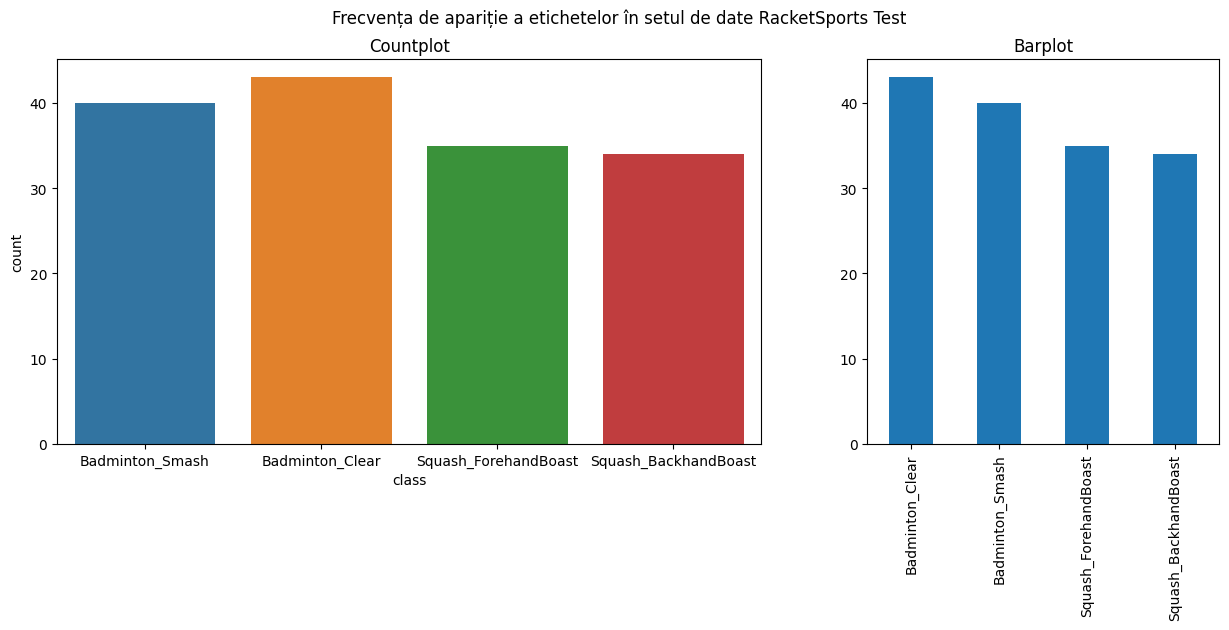

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5), gridspec_kw={'width_ratios': [2, 1]})

sns.countplot(x='class', data=rs_test, ax=ax1)
ax1.set_title('Countplot')

rs_test['class'].value_counts().plot.bar(ax=ax2)
ax2.set_title('Barplot')

fig.suptitle('Frecvența de apariție a etichetelor în setul de date RacketSports Test')
plt.show()

## 2. Vizualizarea seriilor de timp


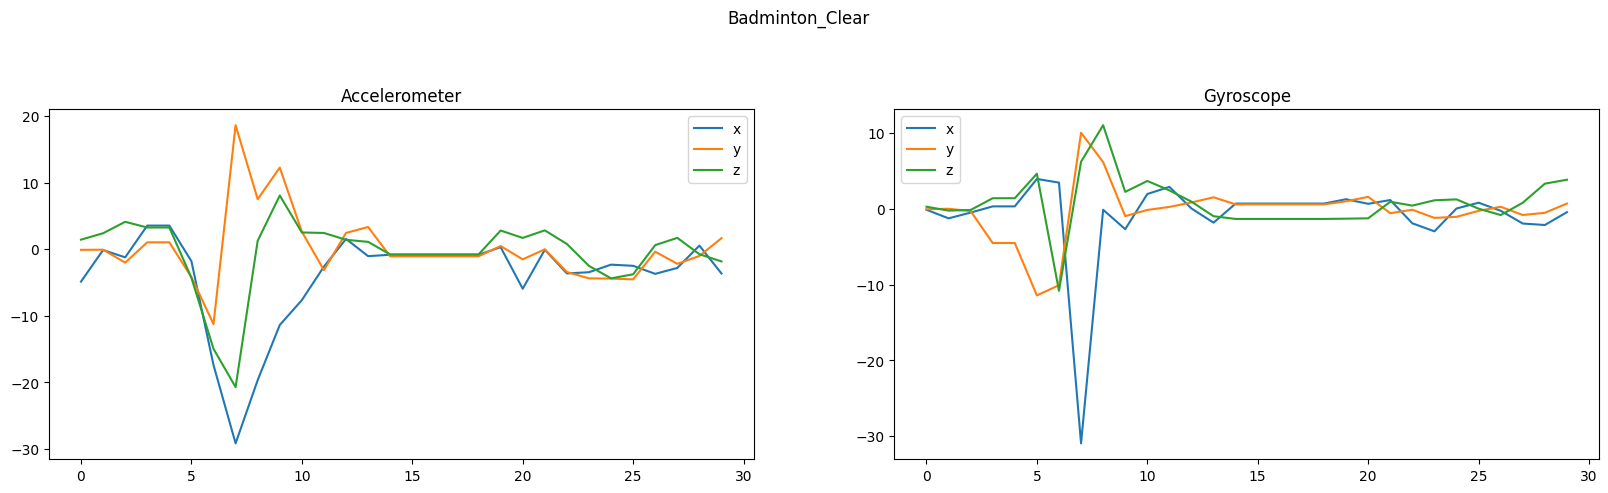

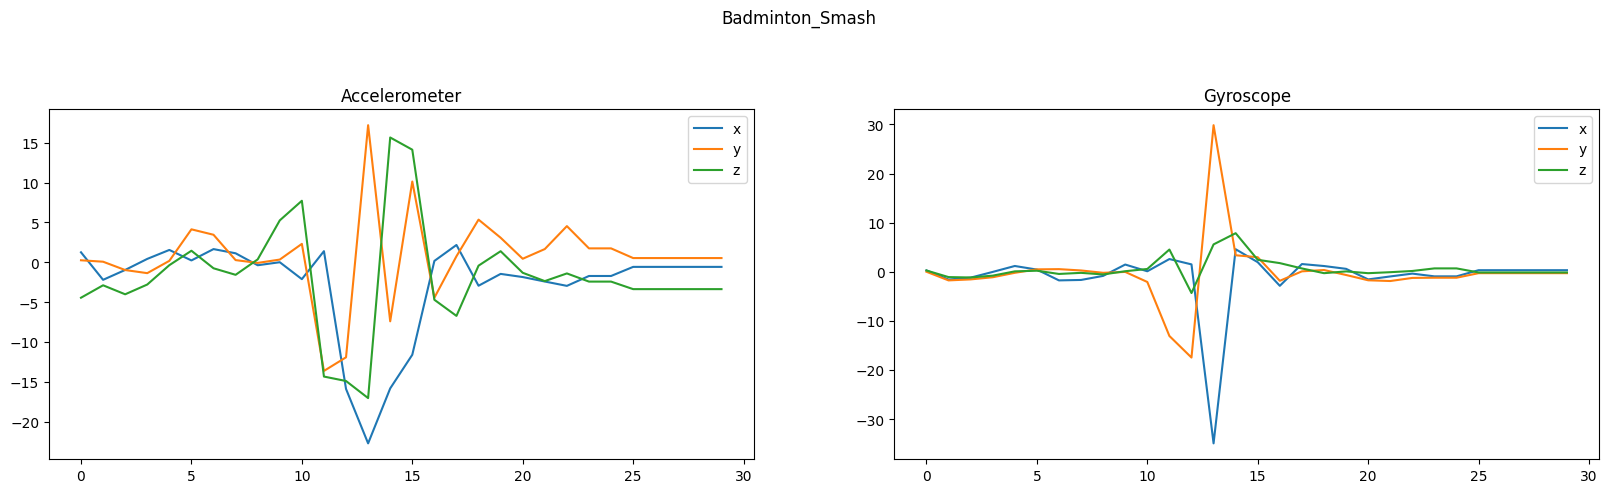

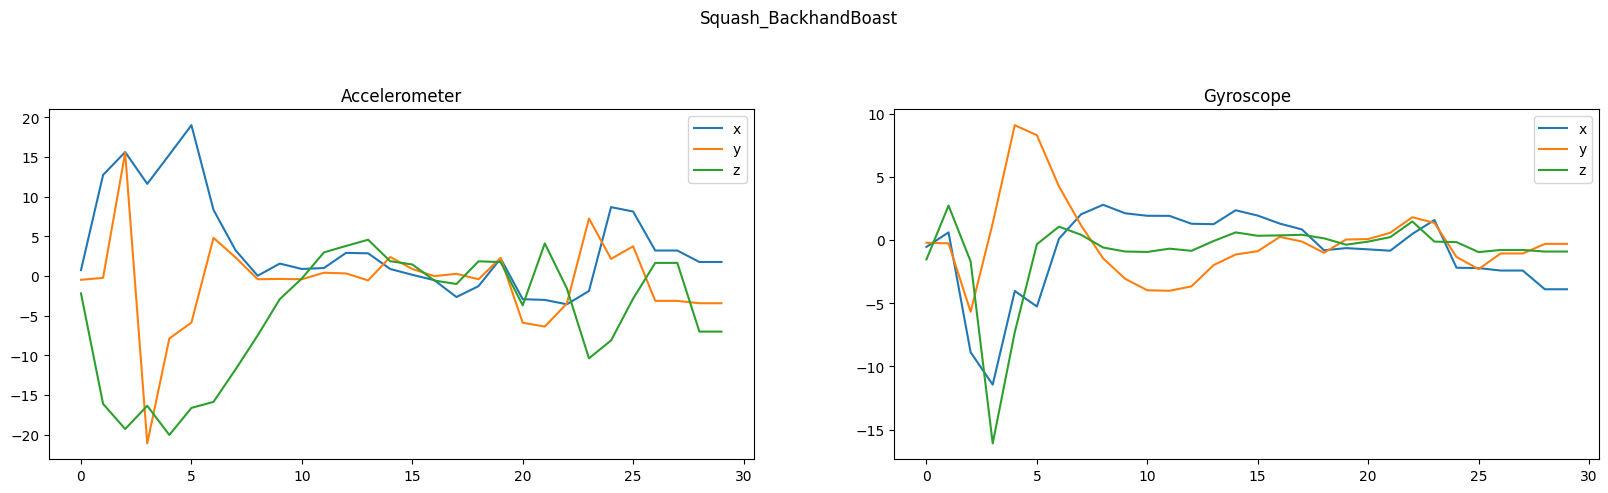

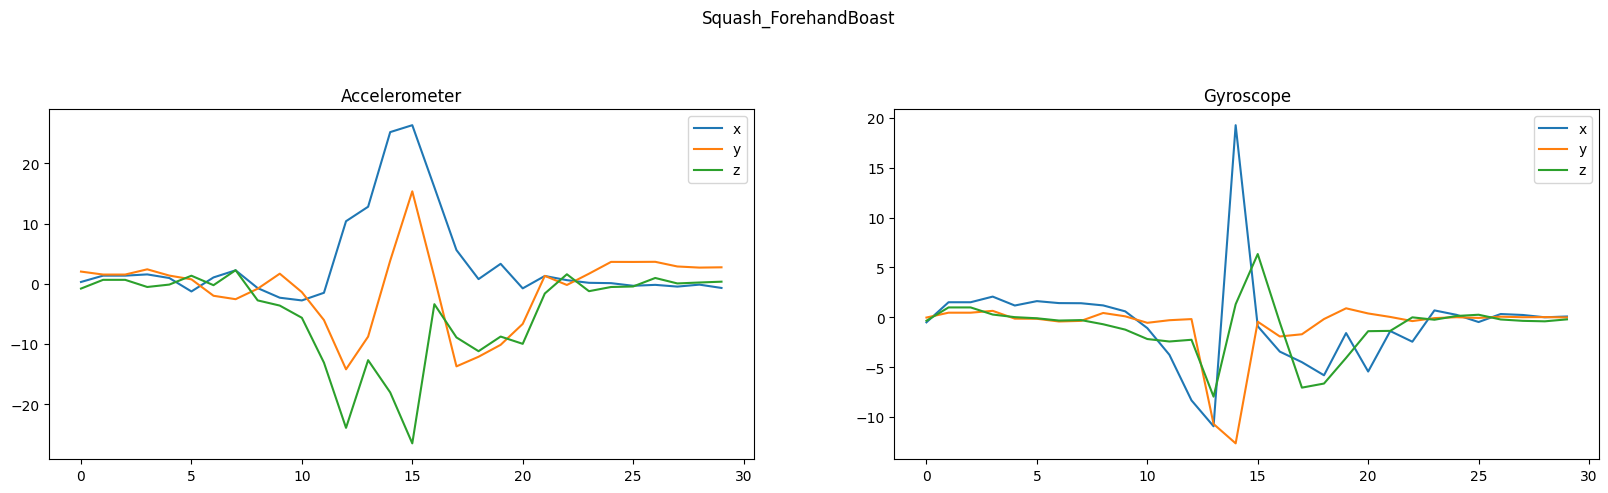

In [ ]:
rs_train_grouped = rs_train.groupby('class')

examples = []
for name, group in rs_train_grouped:
    examples.append(group.iloc[0])


def plot_example(example):
    fig, axs = plt.subplots(2, 2, figsize=(20,10))
    axs[0,0].plot(example['dim_0'], label='x')
    axs[0,0].plot(example['dim_1'], label='y')
    axs[0,0].plot(example['dim_2'], label='z')
    axs[0, 0].legend()
    axs[0,0].set_title('Accelerometer')

    axs[0,1].plot(example['dim_3'], label='x')
    axs[0,1].plot(example['dim_4'], label='y')
    axs[0,1].plot(example['dim_5'], label='z')
    axs[0, 1].legend()
    axs[0,1].set_title('Gyroscope')

    axs[1,0].set_visible(False)
    axs[1,1].set_visible(False)
    fig.suptitle(example["class"])
    plt.show()

for example in examples:
    plot_example(example)

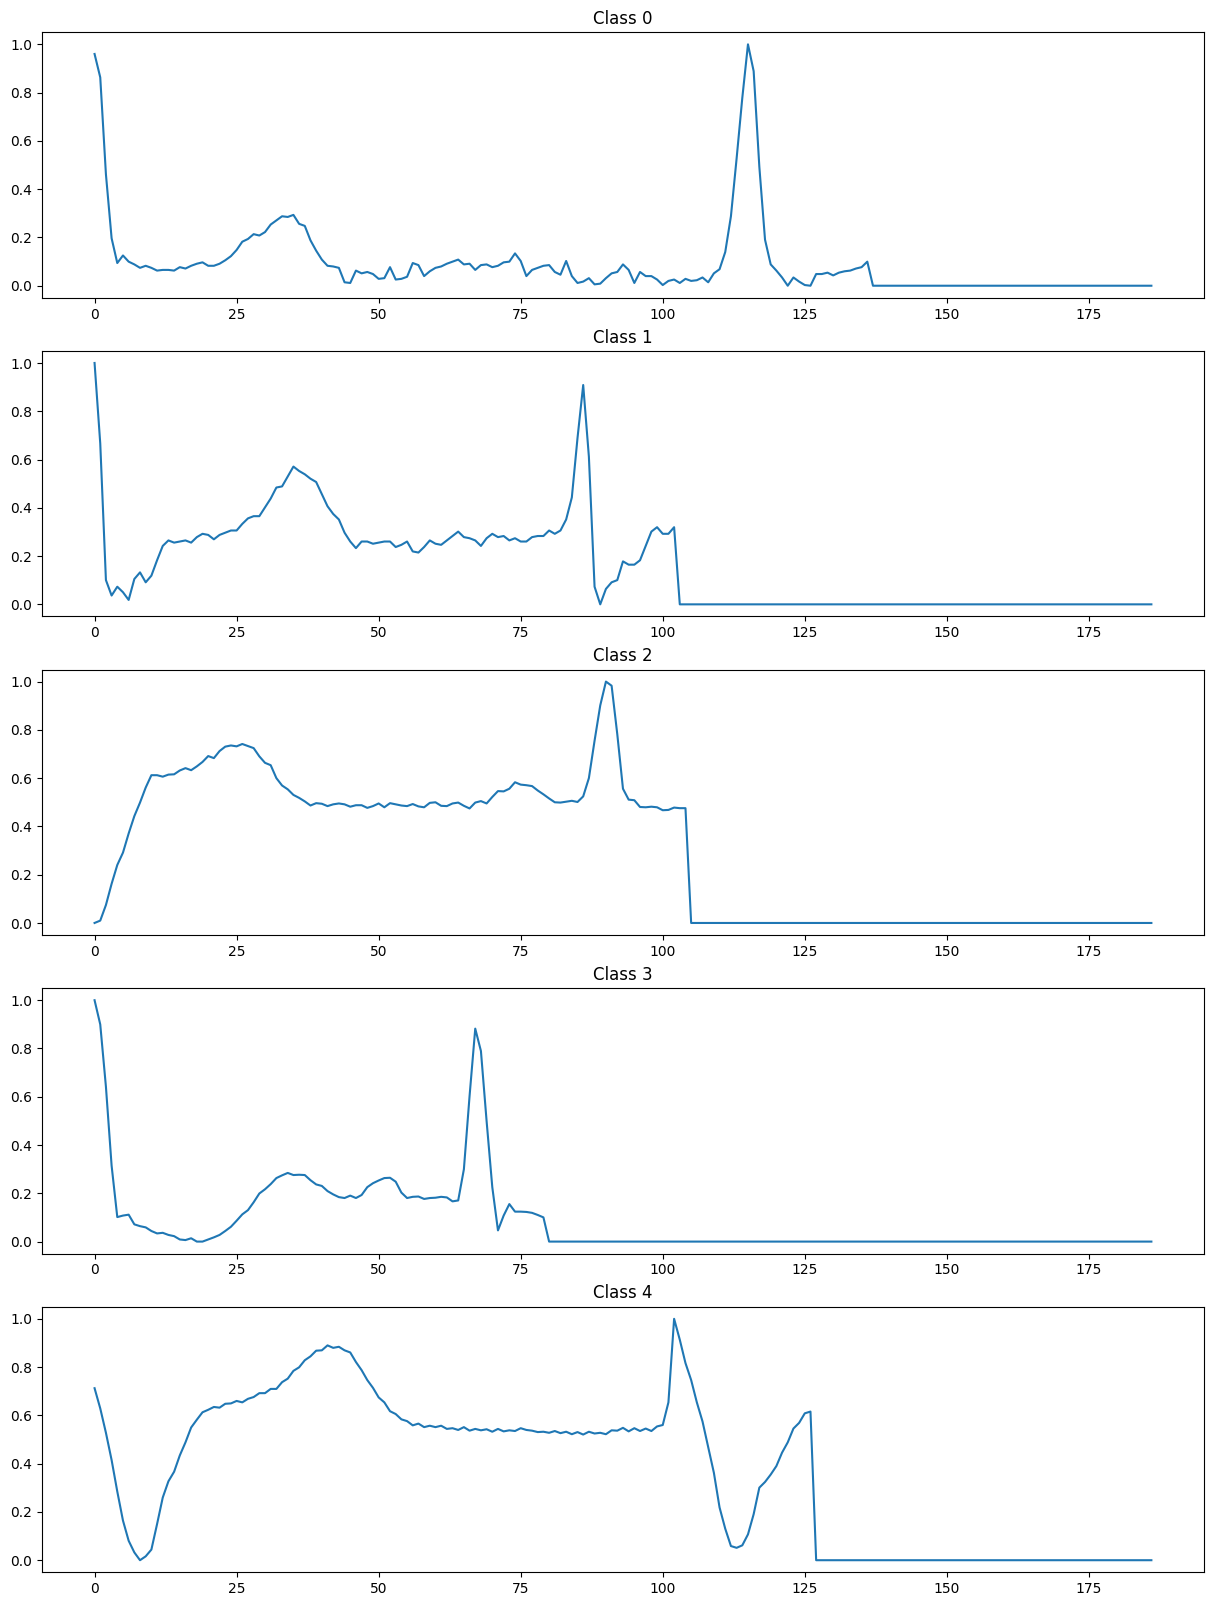

In [ ]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 20))
for i in range(5):
  class_df = mitbih_train[mitbih_train.iloc[:, -1] == i]
  class_ecg = class_df.iloc[0, :-1].values
  axes[i].plot(class_ecg)
  axes[i].set_title(f"Class {i}")
plt.show()

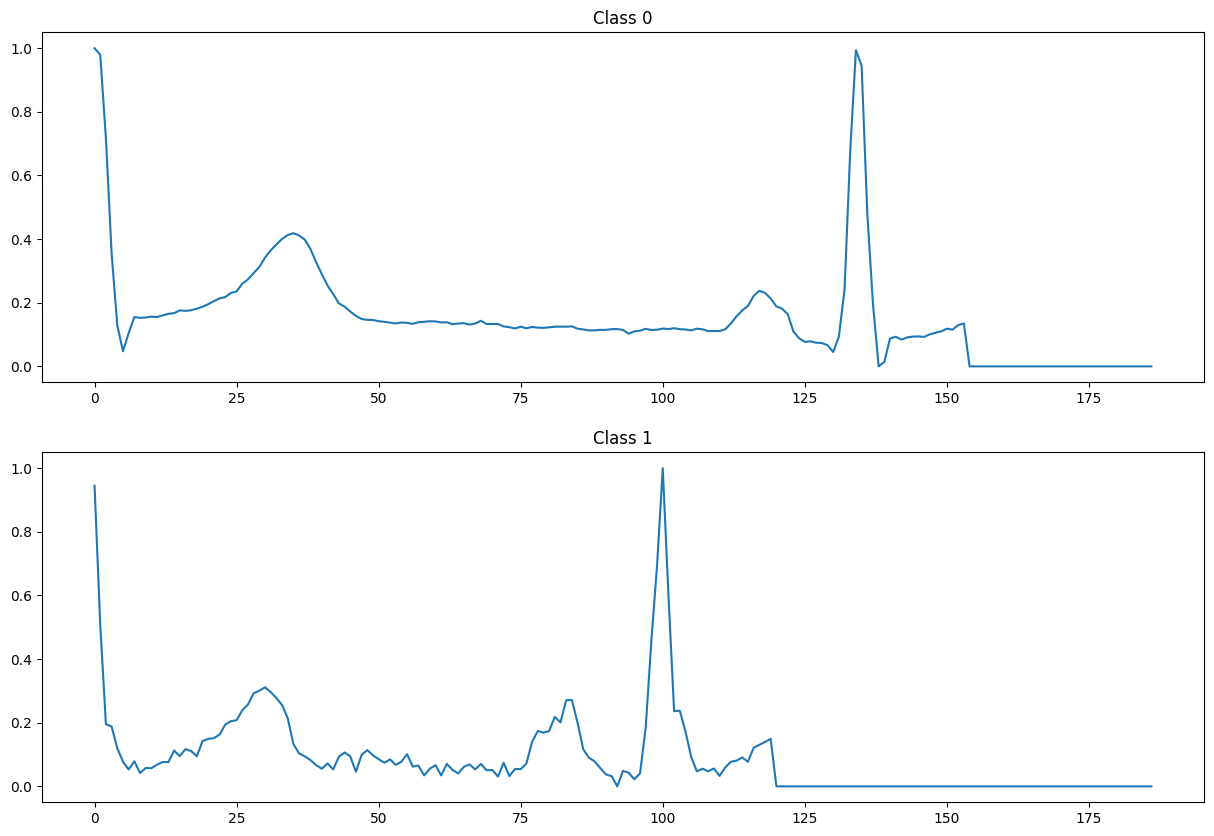

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 10))
for i in range(2):
    class_df = ptbdb_train[ptbdb_train.iloc[:, -1] == i]
    class_ecg = class_df.iloc[0, :-1].values
    axes[i].plot(class_ecg)
    axes[i].set_title(f"Class {i}")
plt.show()

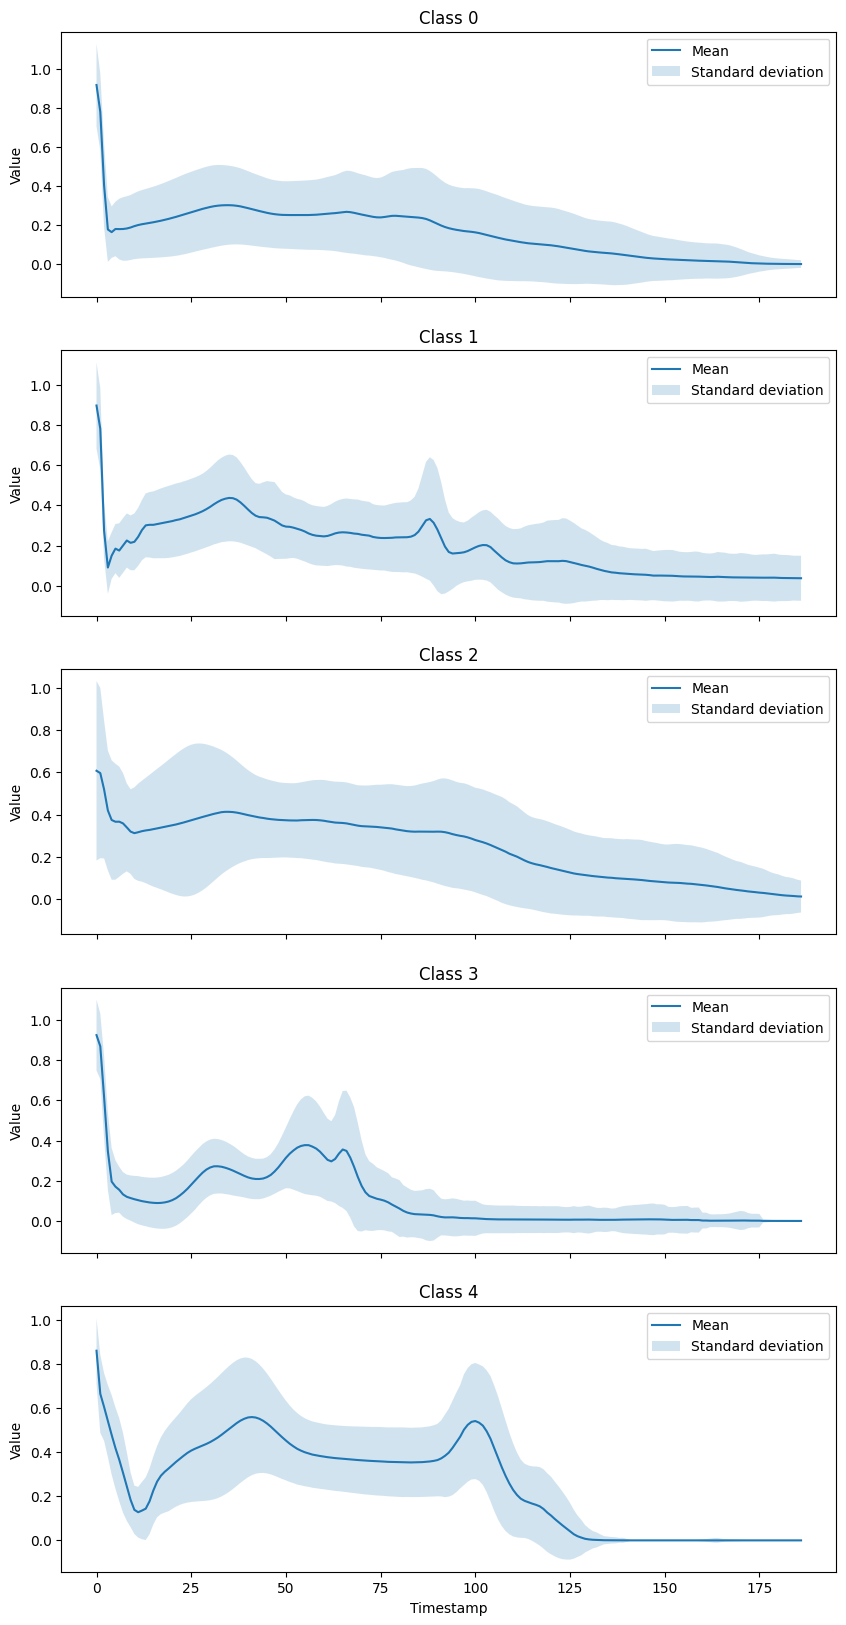

In [ ]:
mitbih_full = pd.concat([mitbih_train, mitbih_test], ignore_index=True)
timestamps = mitbih_full.iloc[:, :187]
class_labels = mitbih_full.iloc[:, -1]

means = {}
stds = {}

for i in range(5):
  class_data = timestamps[class_labels == i]
    
  means_values = np.mean(class_data, axis=0)
  stds_values = np.std(class_data, axis=0)
    
  means[i] = means_values
  stds[i] = stds_values


fig, axes = plt.subplots(nrows=5, figsize=(10, 20), sharex=True)
for i, class_name in enumerate(means):
  axes[i].set_title(f"Class {class_name}")
  axes[i].set_ylabel("Value")
    
  timestamps = range(187)
  means_values = means[class_name]
  stds_values = stds[class_name]
    
  axes[i].plot(timestamps, means_values, label="Mean")
    # plt.plot(timestamps, stds_values, label="Standard deviation")
  axes[i].fill_between(
        timestamps, 
        means_values - stds_values, 
        means_values + stds_values, 
        alpha=0.2,
        label="Standard deviation"
    )
  axes[i].legend()

axes[-1].set_xlabel("Timestamp")
plt.show()

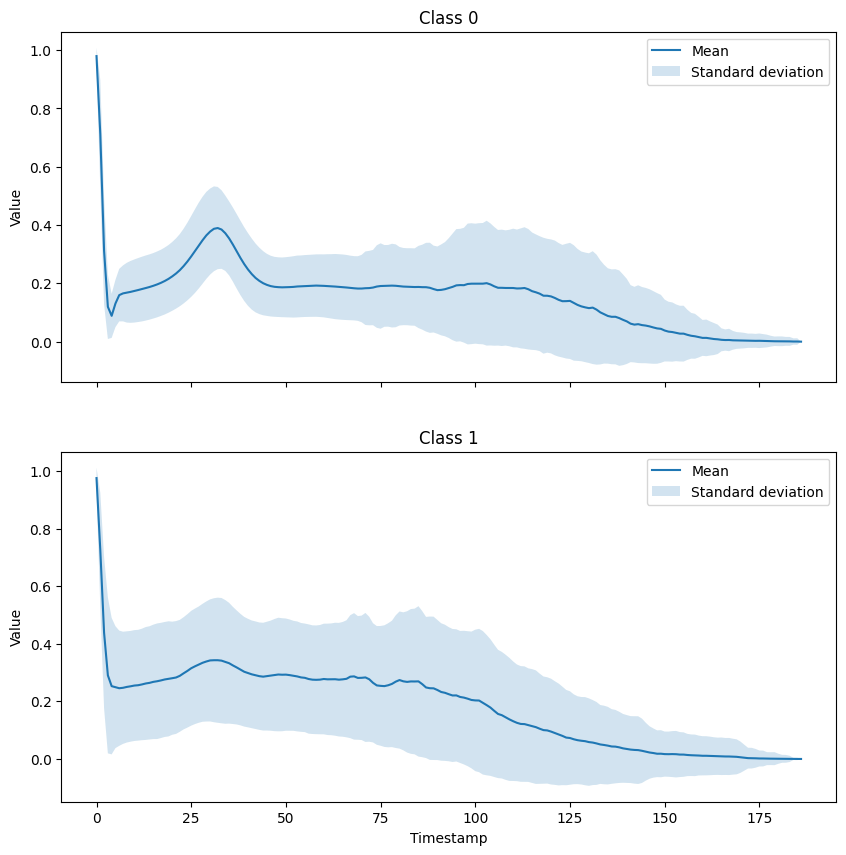

In [ ]:
timestamps = ptbdb.iloc[:, :187]
class_labels = ptbdb.iloc[:, -1]

means = {}
stds = {}

for i in range(2):
  class_data = timestamps[class_labels == i]
    
  # Calculăm media și deviația standard per moment de timp pentru această clasă
  means_values = np.mean(class_data, axis=0)
  stds_values = np.std(class_data, axis=0)
    
  # Adăugăm media și deviația standard la dicționarele corespunzătoare pentru această clasă
  means[i] = means_values
  stds[i] = stds_values


fig, axes = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
for i, class_name in enumerate(means):
  axes[i].set_title(f"Class {class_name}")
  axes[i].set_ylabel("Value")
    
  timestamps = range(187)
  means_values = means[class_name]
  stds_values = stds[class_name]
    
  axes[i].plot(timestamps, means_values, label="Mean")
    # plt.plot(timestamps, stds_values, label="Standard deviation")
  axes[i].fill_between(
        timestamps, 
        means_values - stds_values, 
        means_values + stds_values, 
        alpha=0.2,
        label="Standard deviation"
    )
  axes[i].legend()

axes[-1].set_xlabel("Timestamp")
plt.show()

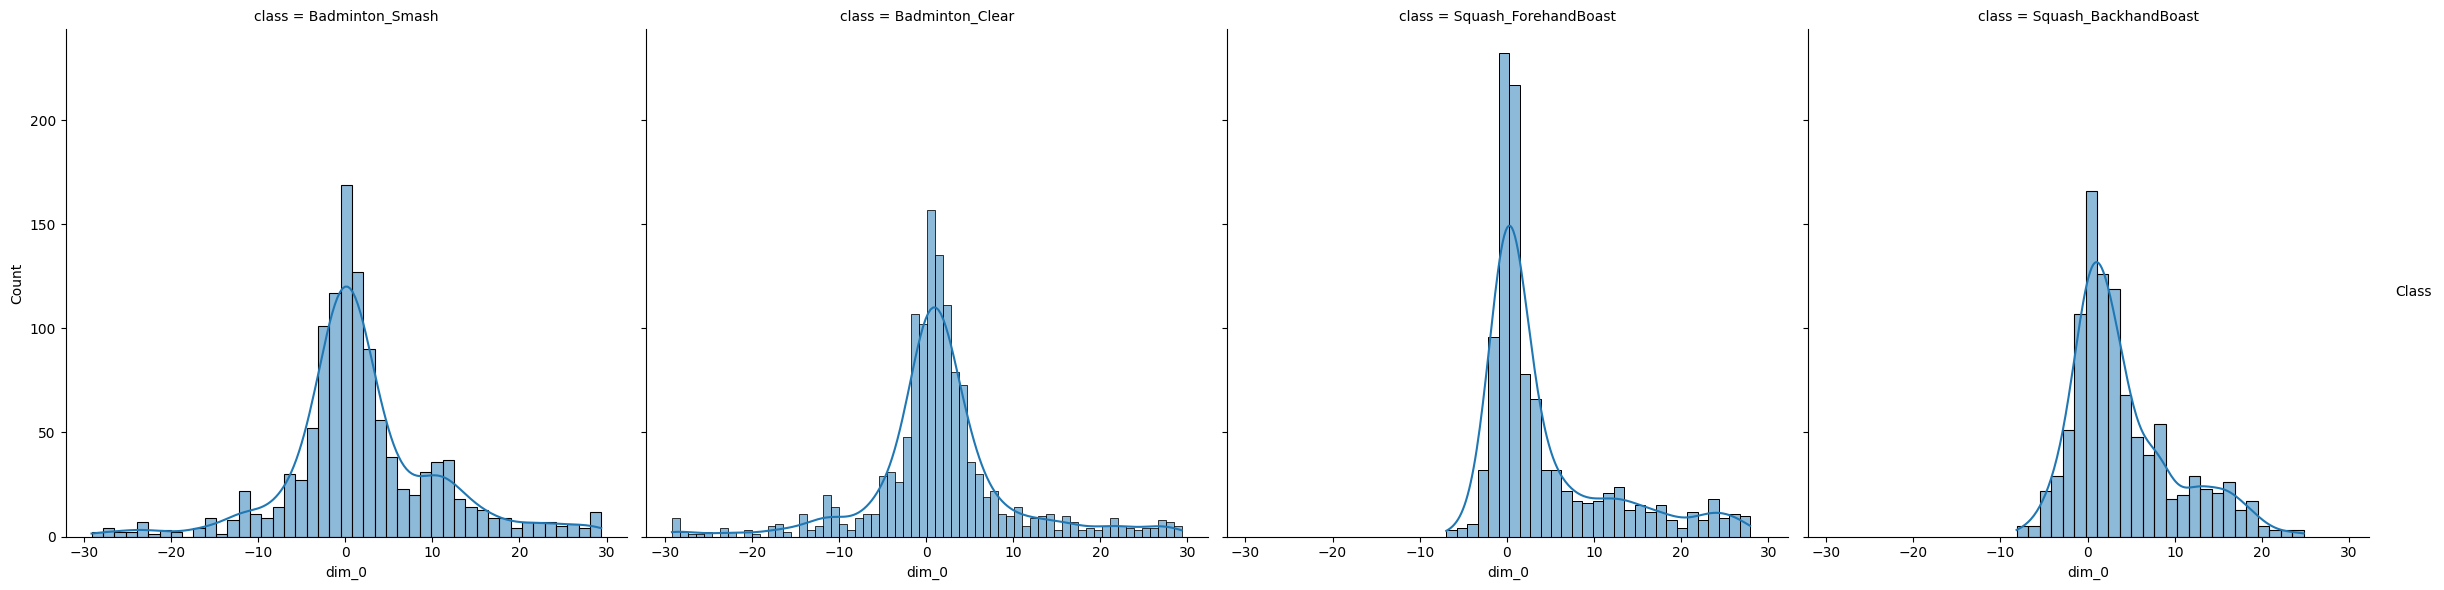

In [ ]:
rs_expanded_dim0 = rs_train.explode("dim_0")

g = sns.FacetGrid(rs_expanded_dim0, col="class", margin_titles=True, height=6, col_wrap=4)
g.map(sns.histplot, 'dim_0', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')


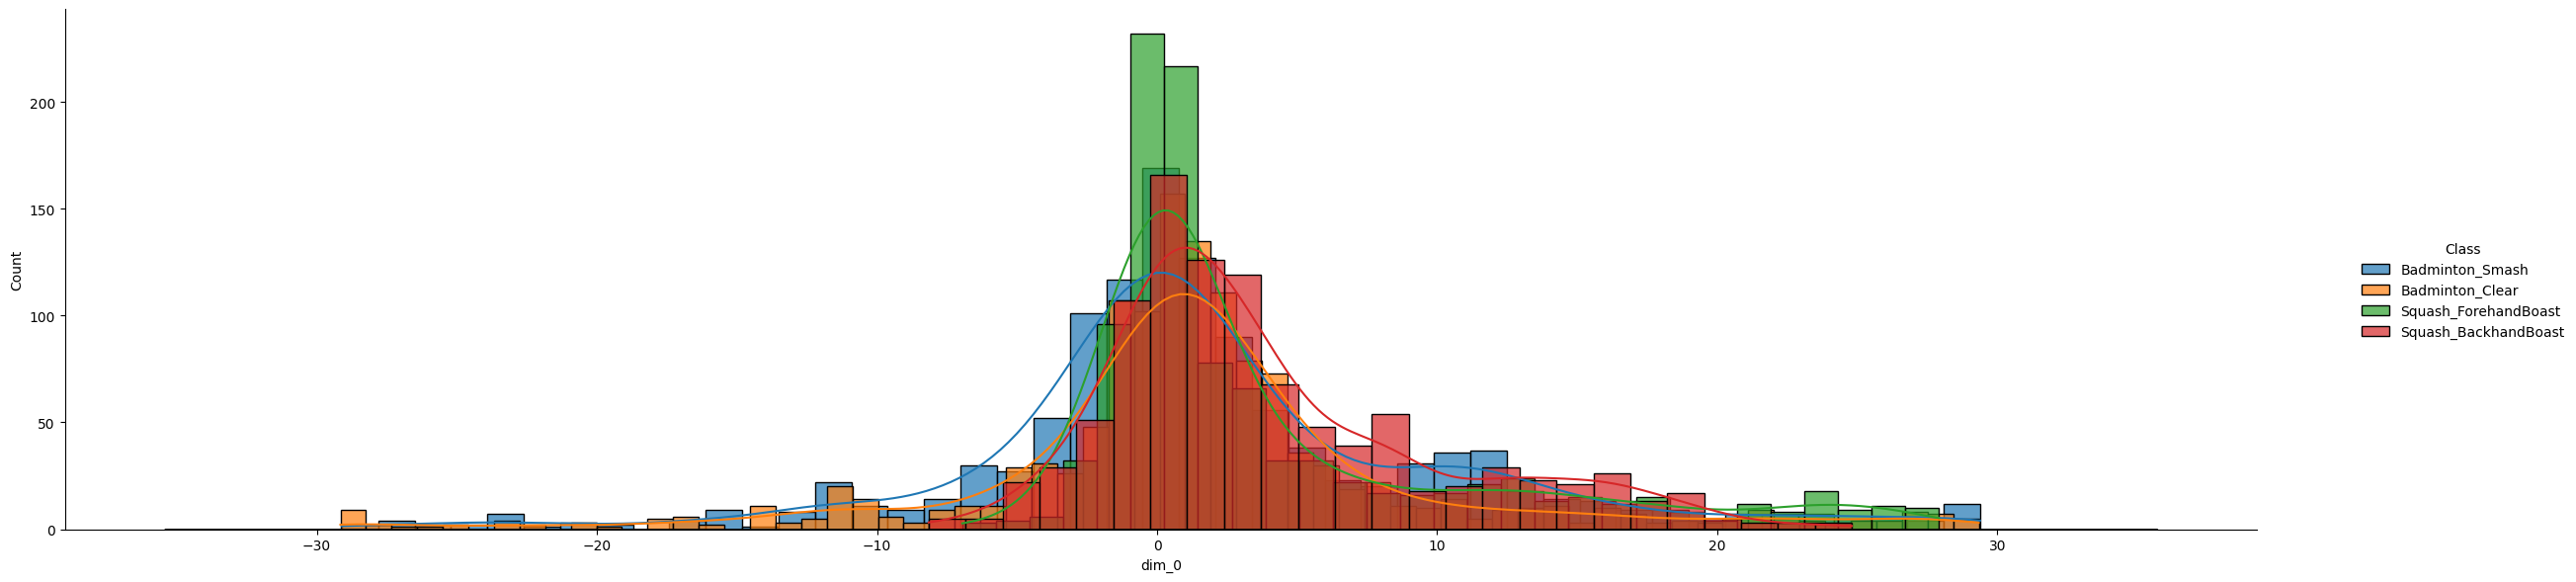

In [ ]:
rs_expanded_dim0 = rs_train.explode("dim_0")

g = sns.FacetGrid(rs_expanded_dim0, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_0', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_0', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')


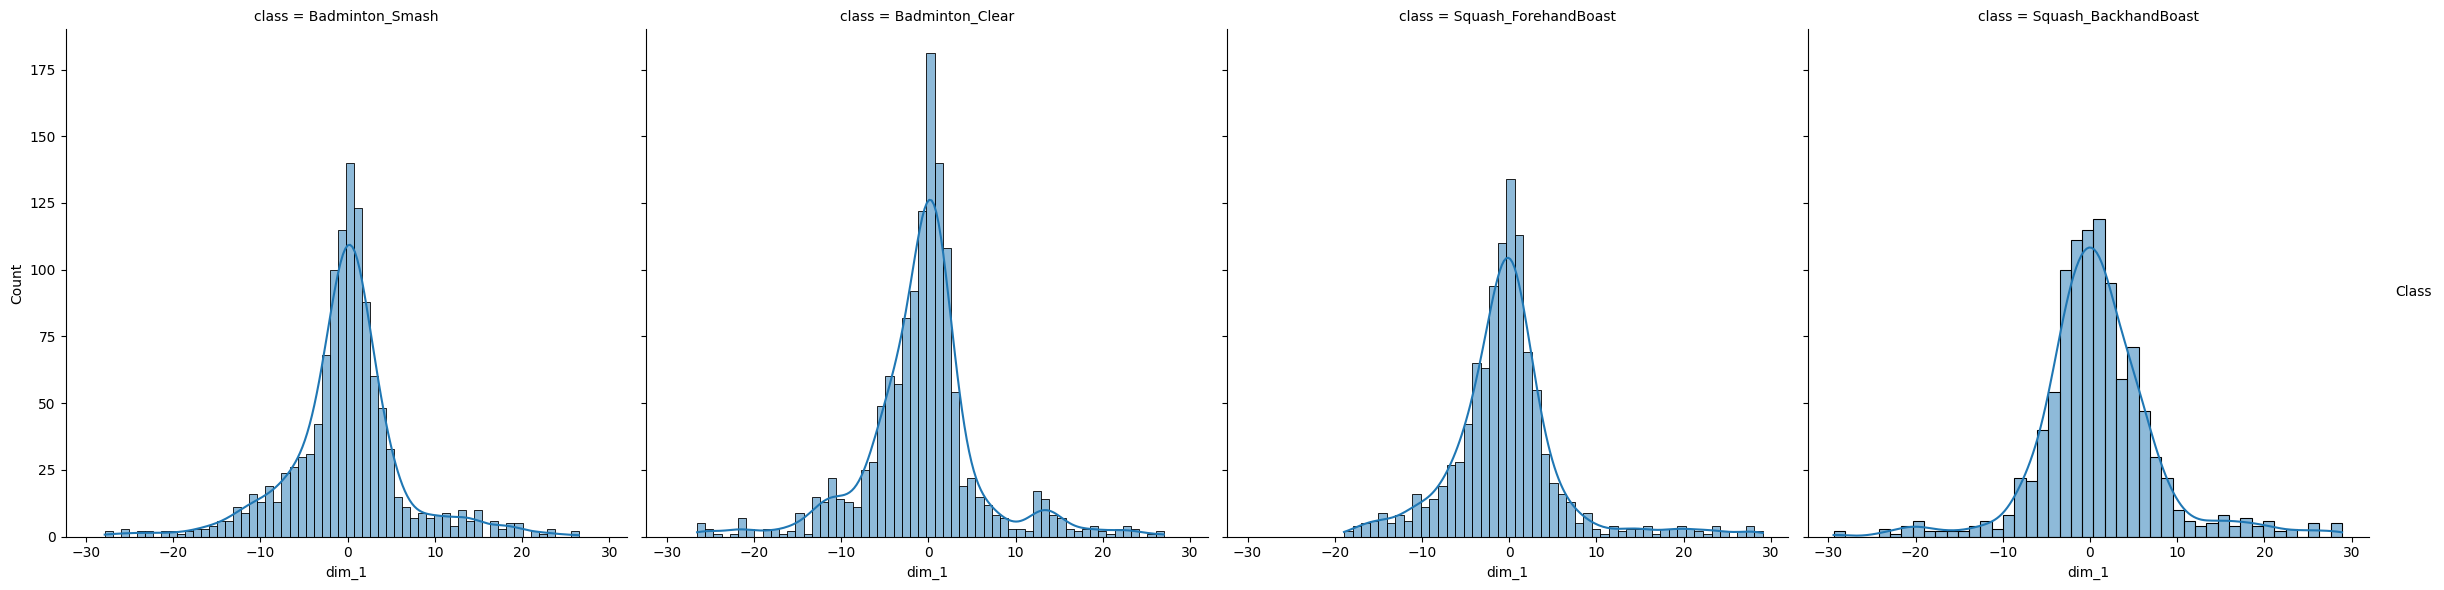

In [ ]:
rs_expanded_dim1 = rs_train.explode("dim_1")

g = sns.FacetGrid(rs_expanded_dim1, col="class", margin_titles=True, height=6, col_wrap=4)
g.map(sns.histplot, 'dim_1', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')

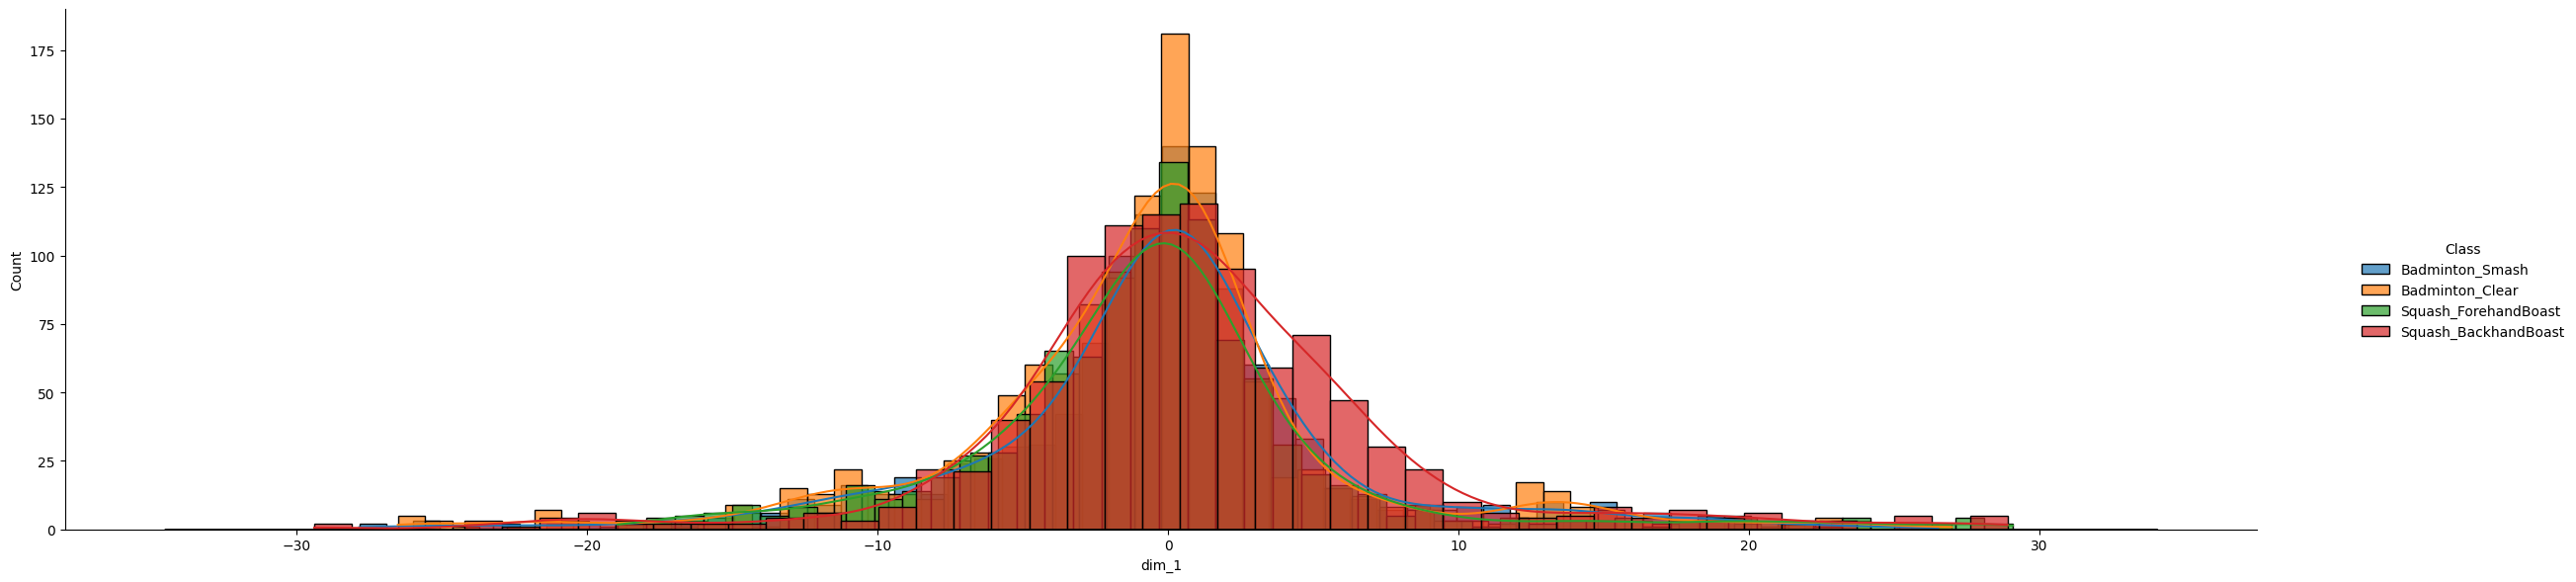

In [ ]:
rs_expanded_dim1 = rs_train.explode("dim_1")

g = sns.FacetGrid(rs_expanded_dim1, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_1', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_1', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')

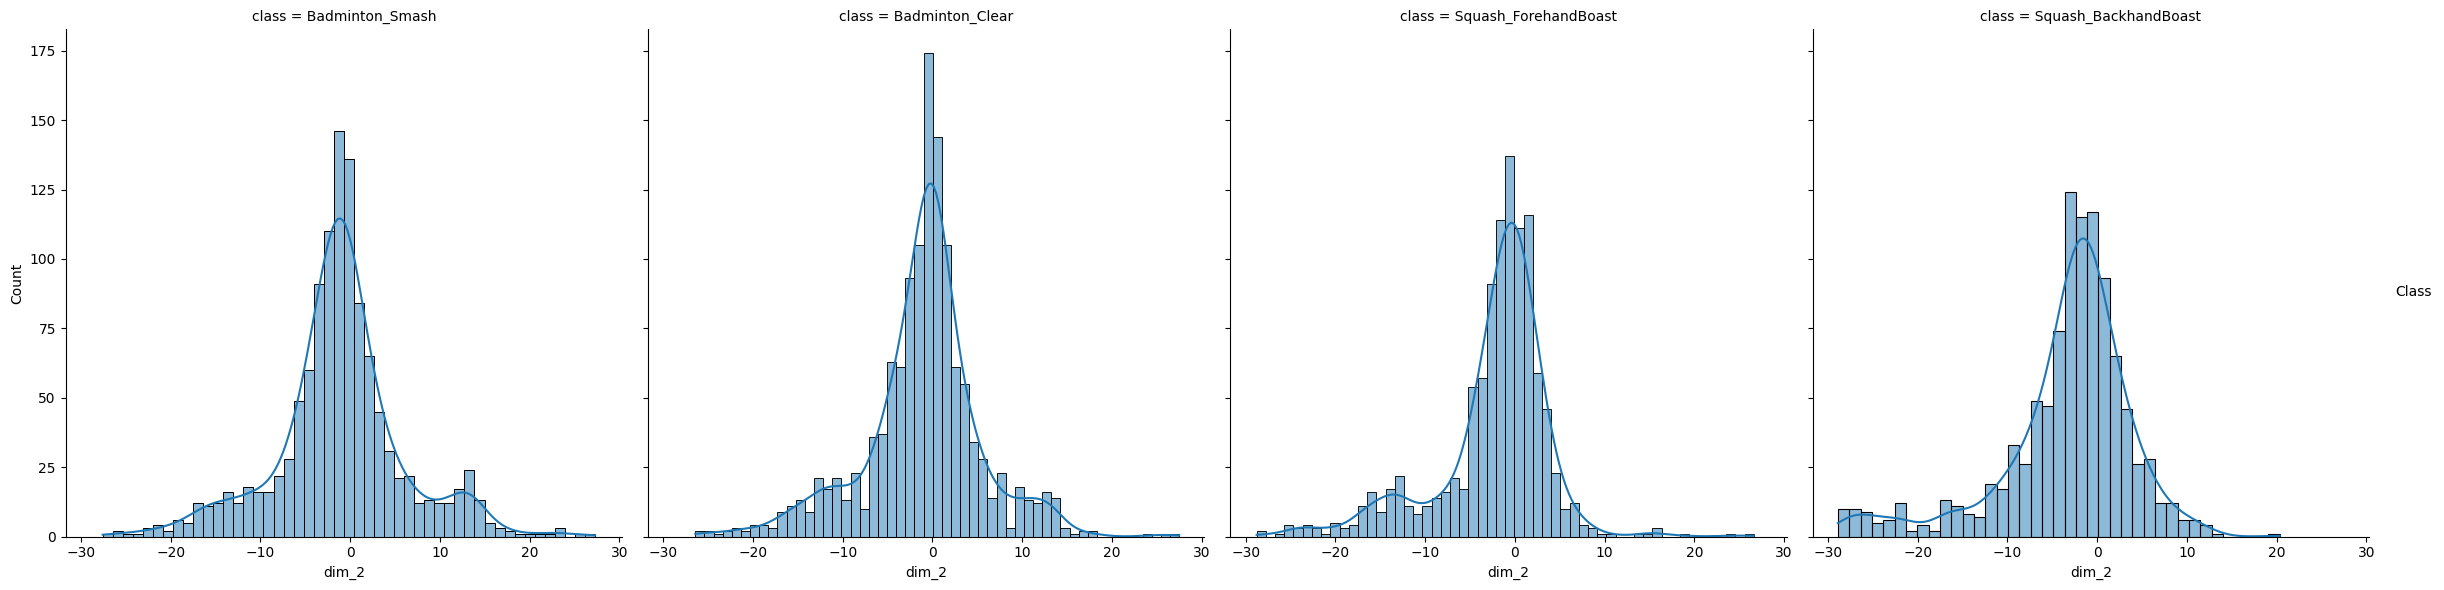

In [ ]:
rs_expanded_dim2 = rs_train.explode("dim_2")

g = sns.FacetGrid(rs_expanded_dim2, col="class", margin_titles=True, height=6, col_wrap=4)
g.map(sns.histplot, 'dim_2', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')

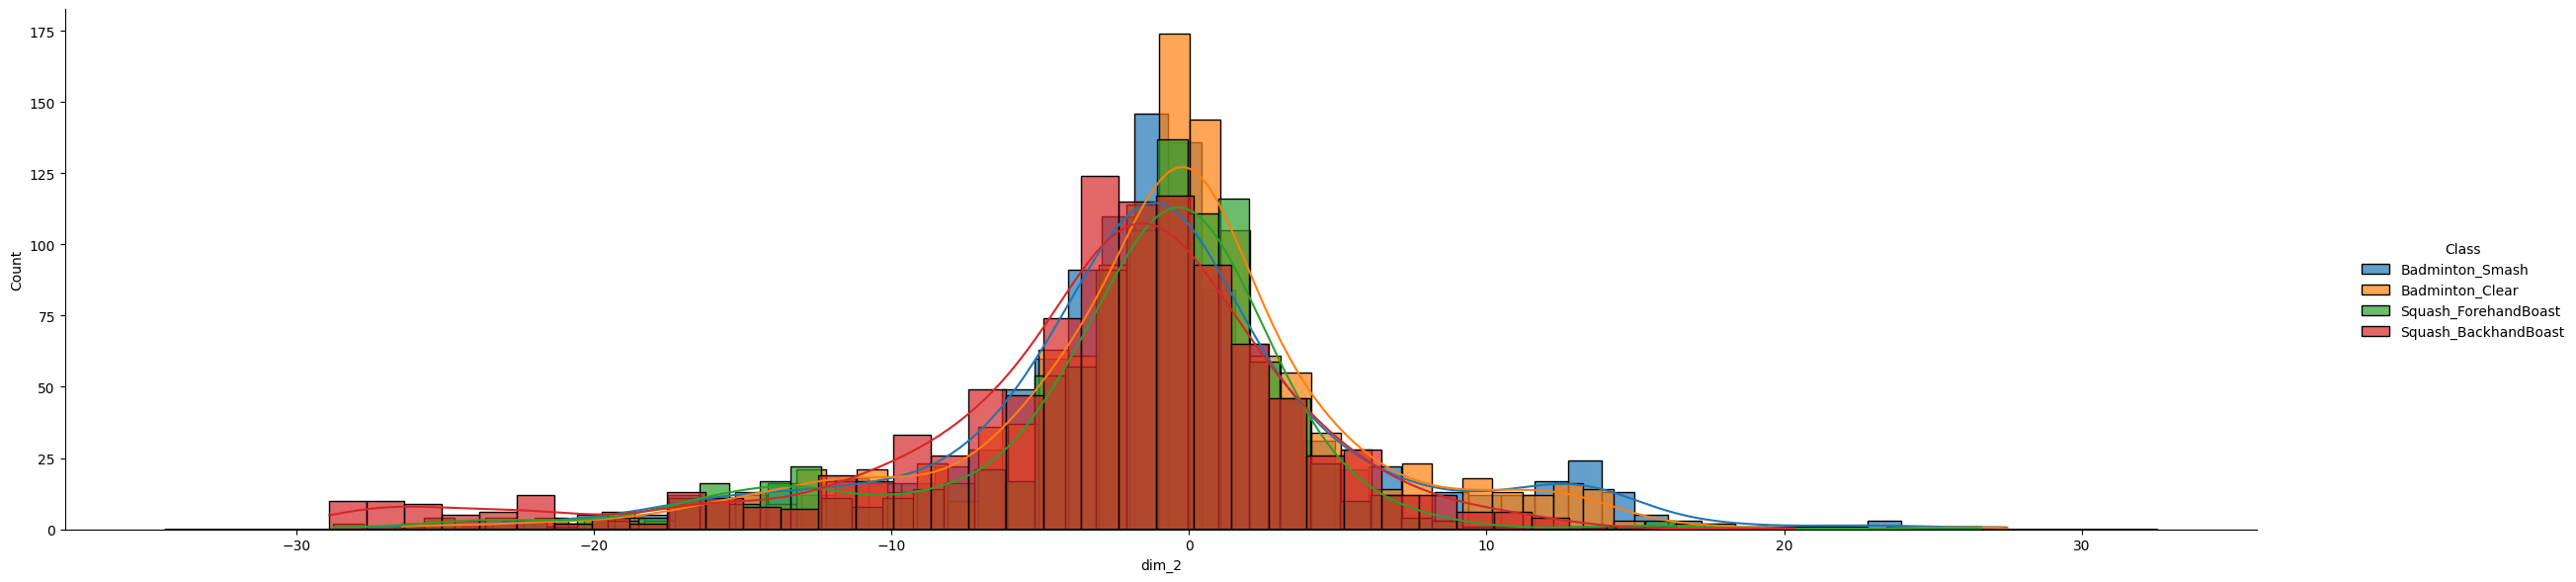

In [ ]:
rs_expanded_dim2 = rs_train.explode("dim_2")

g = sns.FacetGrid(rs_expanded_dim2, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_2', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_2', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')

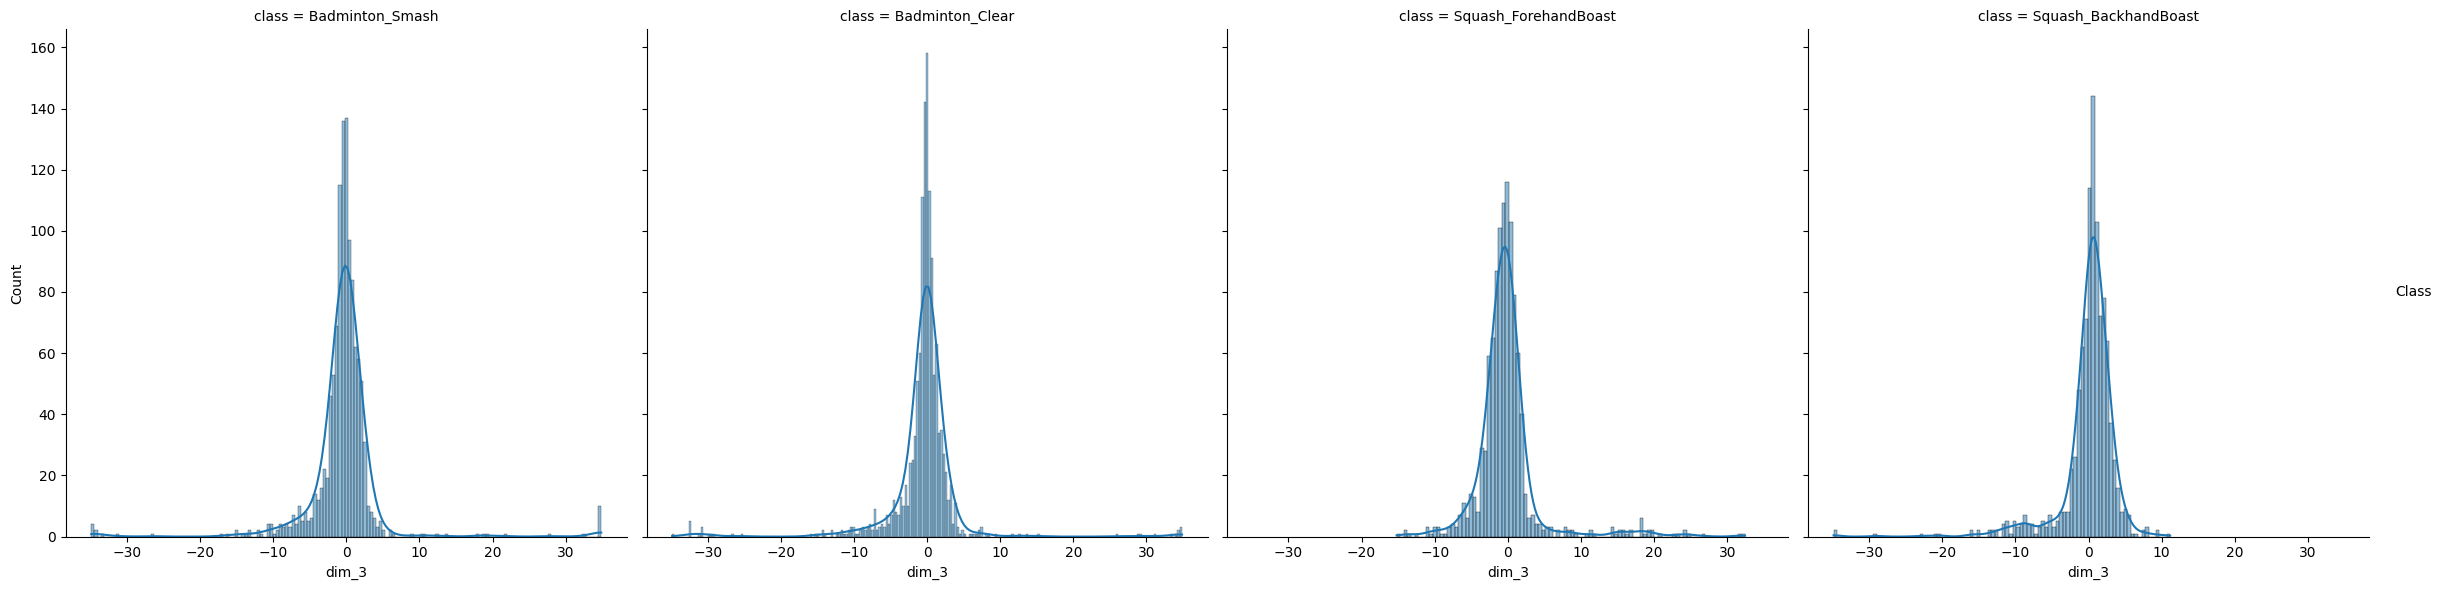

In [ ]:
rs_expanded_dim3 = rs_train.explode("dim_3")

g = sns.FacetGrid(rs_expanded_dim3, col="class", margin_titles=True, height=6, col_wrap=4)
g.map(sns.histplot, 'dim_3', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')

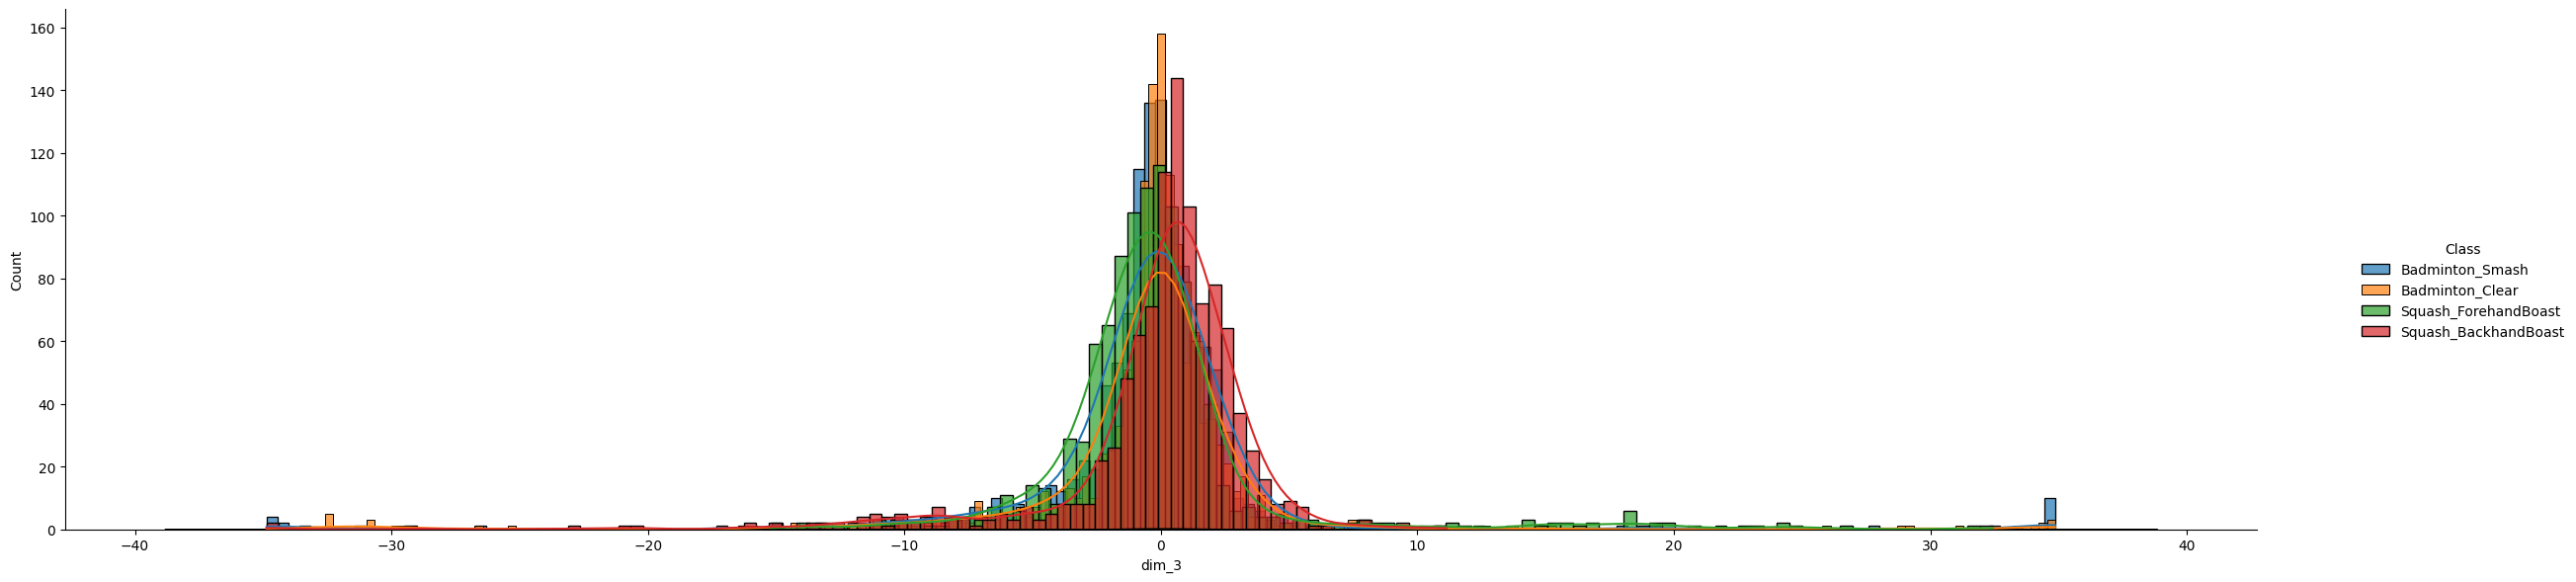

In [ ]:
rs_expanded_dim3 = rs_train.explode("dim_3")

g = sns.FacetGrid(rs_expanded_dim3, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_3', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_3', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')

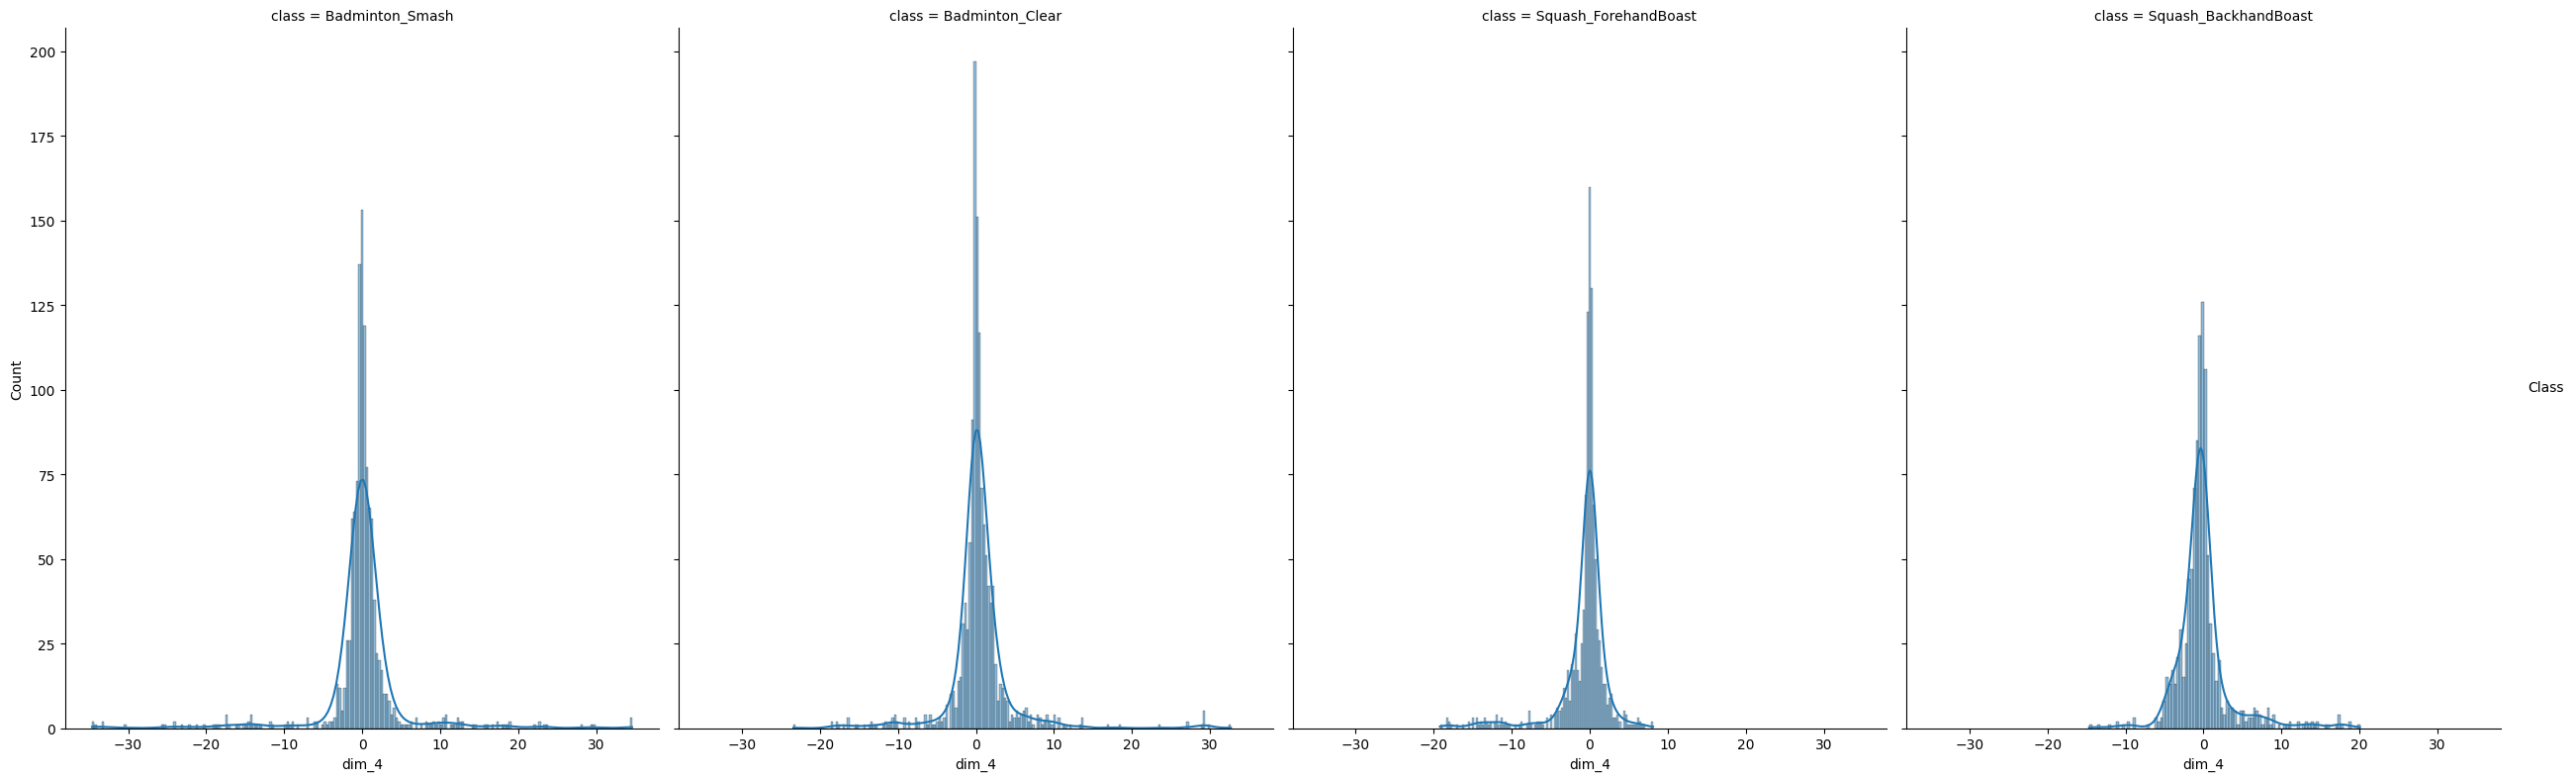

In [ ]:
rs_expanded_dim4 = rs_train.explode("dim_4")

g = sns.FacetGrid(rs_expanded_dim4, col="class", margin_titles=True, height=8, col_wrap=4, aspect=0.8)
g.map(sns.histplot, 'dim_4', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')

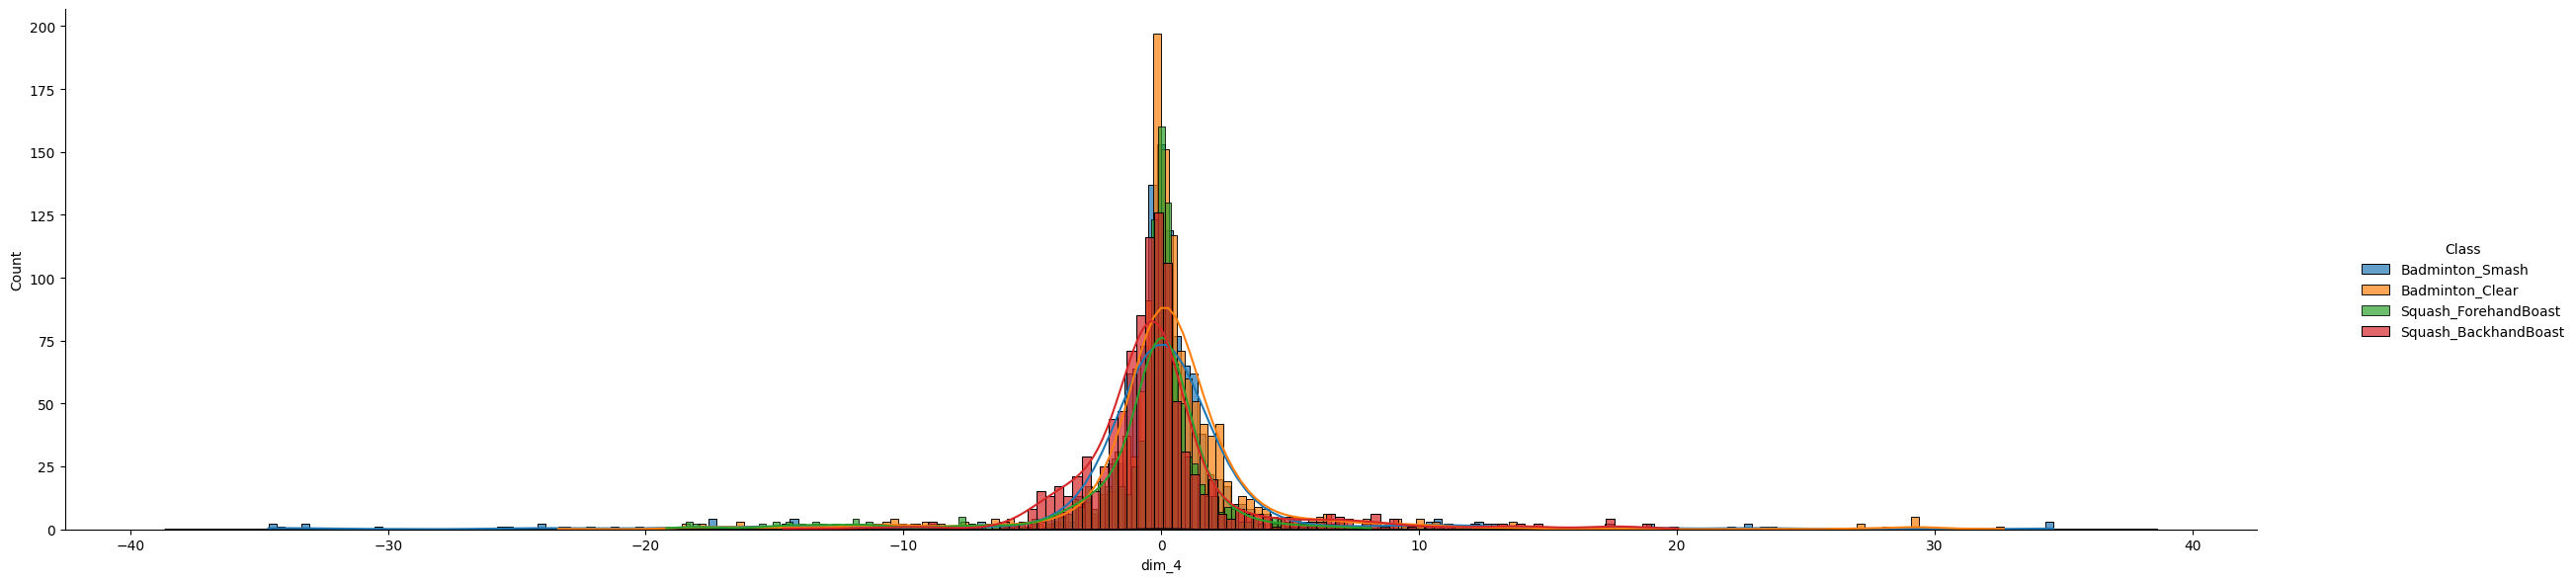

In [ ]:
rs_expanded_dim4 = rs_train.explode("dim_4")

g = sns.FacetGrid(rs_expanded_dim4, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_4', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_4', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')

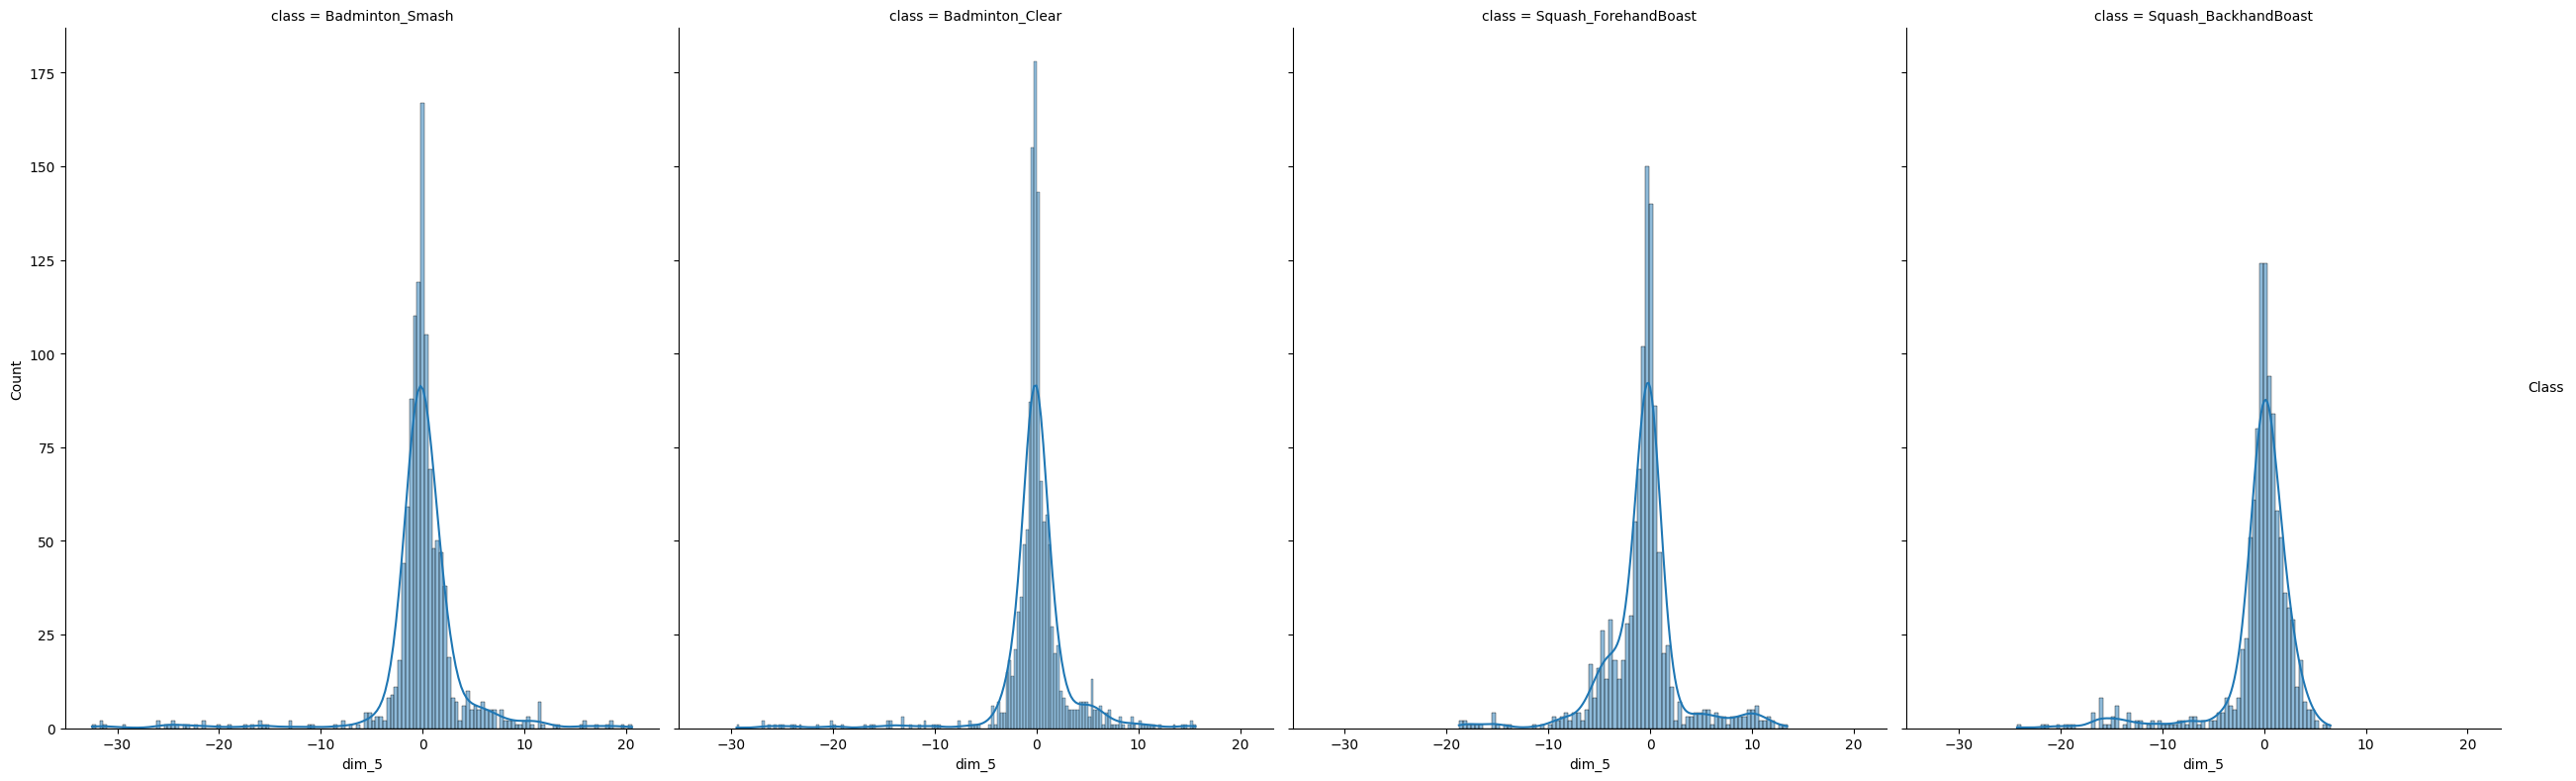

In [ ]:
rs_expanded_dim5 = rs_train.explode("dim_5")

g = sns.FacetGrid(rs_expanded_dim5, col="class", margin_titles=True, height=8, col_wrap=4, aspect=0.8)
g.map(sns.histplot, 'dim_5', kde=True, alpha=0.5, fill=True)

g.add_legend(title='Class')

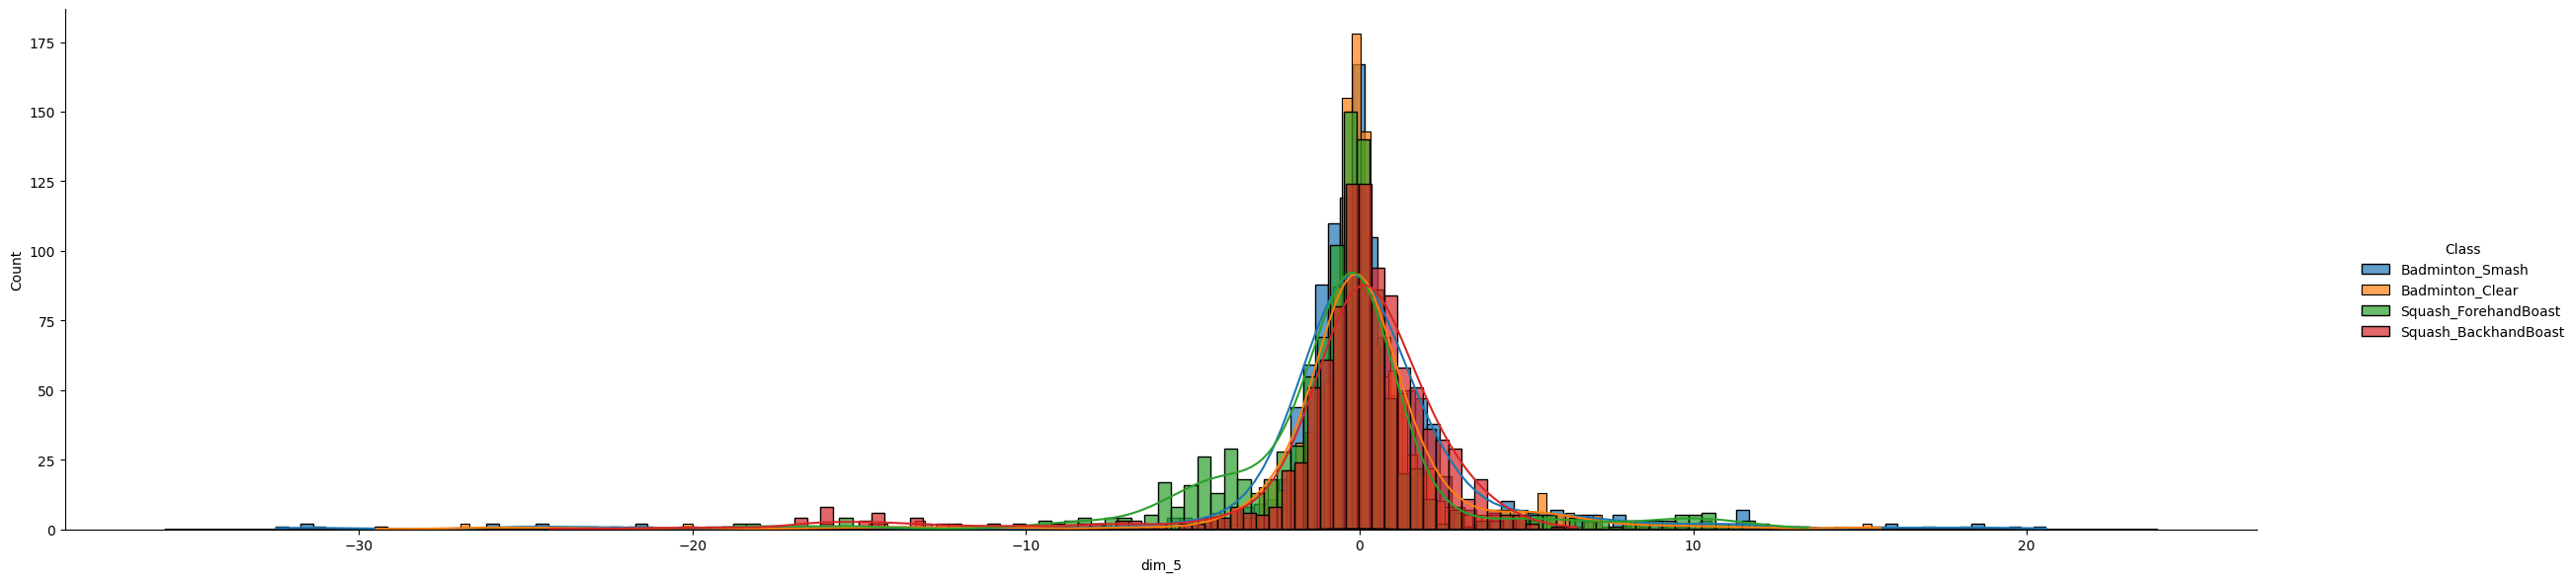

In [ ]:
rs_expanded_dim5 = rs_train.explode("dim_5")

g = sns.FacetGrid(rs_expanded_dim5, hue='class', margin_titles=True, height=6, aspect=4)
g.map(sns.histplot, 'dim_5', kde=True, alpha=0.7, fill=True,)
g.map(sns.kdeplot, 'dim_5', multiple='stack', fill=True, alpha=0.7)

g.add_legend(title='Class')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

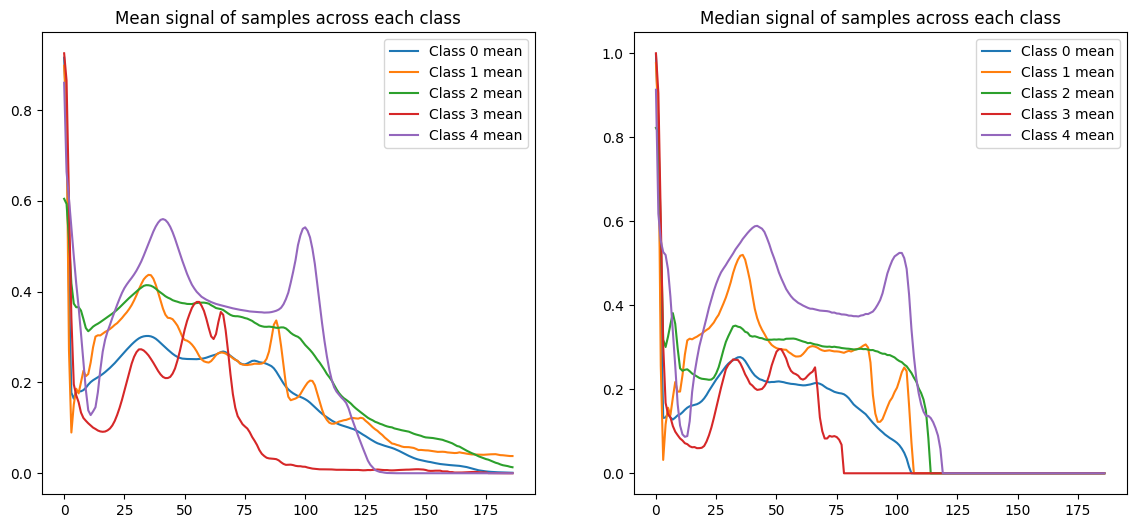

In [ ]:
mitbih_train_0=mitbih_train[mitbih_train.iloc[:,187]==0.0]
mitbih_train_1=mitbih_train[mitbih_train.iloc[:,187]==1.0]
mitbih_train_2=mitbih_train[mitbih_train.iloc[:,187]==2.0]
mitbih_train_3=mitbih_train[mitbih_train.iloc[:,187]==3.0]
mitbih_train_4=mitbih_train[mitbih_train.iloc[:,187]==4.0]

plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.title('Mean signal of samples across each class')S
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_0.iloc[:,0:187]),label='Class 0 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_1.iloc[:,0:187]),label='Class 1 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_2.iloc[:,0:187]),label='Class 2 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_3.iloc[:,0:187]),label='Class 3 mean')
plt.plot(np.linspace(0,186,187),np.mean(mitbih_train_4.iloc[:,0:187]),label='Class 4 mean')
plt.legend()
plt.subplot(122)
plt.title('Median signal of samples across each class')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_0.iloc[:,0:187],axis=0),label='Class 0 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_1.iloc[:,0:187],axis=0),label='Class 1 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_2.iloc[:,0:187],axis=0),label='Class 2 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_3.iloc[:,0:187],axis=0),label='Class 3 mean')
plt.plot(np.linspace(0,186,187),np.median(mitbih_train_4.iloc[:,0:187],axis=0),label='Class 4 mean')
plt.legend()


# 3.2. Extragere manuala a atributelor și utilizarea algoritmilor clasici de Învățare Automată

# Racket Sports Dataset

In [ ]:
rs_train

dim_0  \
0    0      1.266676
1     -2.180751
2     -0.94334...   
1    0      0.464568
1      7.017253
2      0.40154...   
2    0      0.094274
1      1.185966
2      3.73064...   
3    0     -1.239790
1     -1.217200
2     -0.21568...   
4    0     -0.108107
1      4.973278
2      1.18115...   
..                                                 ...   
146  0      0.314572
1      8.349167
2     21.37934...   
147  0     -0.743014
1      9.206404
2     15.01268...   
148  0      0.918178
1      7.336412
2      8.36798...   
149  0      2.582684
1     13.509926
2     13.50992...   
150  0     -2.214484
1     -0.074870
2     -1.94463...   

                                                 dim_1  \
0    0      0.268223
1      0.088596
2     -0.95314...   
1    0      0.281542
1     -1.483576
2     -5.08311...   
2    0     -0.257740
1      2.160782
2      1.39045...   
3    0     -0.151634
1      0.168659
2     -0.07567...   
4    0      0.799450
1     -2.803670
2     -3.09371...   
..                                                 ...   
146  0     -4.396758
1      2.666356
2     13.88755...   
147  0     -5.922557
1     -3.557850
2     14.60349...   
148  0     -4.916056
1     -4.244981
2     -2.99727...   
149  0     -0.965431
1     18.169147
2     18.16914...   
150  0     -1.116849
1     -1.754224
2     -0.74568...   

                                                 dim_2  \
0    0     -4.421537
1     -2.864239
2     -3.99280...   
1    0      0.466525
1      0.654392
2      0.13575...   
2    0      0.470250
1      0.588830
2      0.32505...   
3    0     -0.124296
1     -2.021917
2     -2.97035...   
4    0      0.772173
1     -3.346607
2     -6.99526...   
..                                                 ...   
146  0      0.547948
1      5.959750
2      0.79821...   
147  0     -1.515104
1     -9.932649
2    -11.70159...   
148  0     -0.390760
1     -7.769012
2     -9.62298...   
149  0     -0.727696
1    -22.544884
2    -22.54488...   
150  0      0.059797
1     -1.368870
2     -1.36805...   

                                                 dim_3  \
0    0      0.303624
1     -1.555410
2     -1.16389...   
1    0     -0.420813
1      0.897557
2      1.53942...   
2    0     -0.031960
1     -0.071911
2      0.74308...   
3    0      0.335585
1     -0.657853
2     -0.32493...   
4    0    -0.013317
1     1.592697
2     1.438221
3...   
..                                                 ...   
146  0    -0.684487
1    -0.261010
2     4.794071
3...   
147  0     -1.251785
1      0.364882
2     -4.98050...   
148  0     -0.519358
1      2.506234
2      0.45810...   
149  0     -0.982784
1    -10.038251
2    -10.03825...   
150  0    -1.214498
1     0.402169
2    -0.127842
3...   

                                                 dim_4  \
0    0      0.031960
1     -1.725865
2     -1.52344...   
1    0     -0.237040
1      0.551318
2      0.58860...   
2    0     -0.085228
1     -0.902883
2     -0.42880...   
3    0     -0.114525
1     -2.223916
2     -1.98154...   
4    0     -0.053267
1      0.378199
2     -0.03462...   
..                                                 ...   
146  0     0.101208
1    -0.926854
2    -3.515652
3...   
147  0    -0.860269
1    -0.002663
2    -4.714170
3...   
148  0    -1.329023
1     1.928282
2    -0.114525
3...   
149  0     -0.617902
1     -6.229629
2     -6.22962...   
150  0     -0.388852
1     -0.466090
2     -1.04670...   

                                                 dim_5                 class  
0    0     0.287644
1    -1.054696
2    -1.134597
3...       Badminton_Smash  
1    0     -0.170456
1     -1.174547
2     -2.39703...       Badminton_Smash  
2    0      0.007990
1     -0.615239
2     -0.89223...       Badminton_Smash  
3    0      0.098545
1     -1.672598
2     -1.34500...       Badminton_Smash  
4    0     -0.287644
1     -0.945497
2     -0.92685...       Badminton_Smash  
..                                                 ...                   ...  
146  0    -

### RacketSports Train Dataset Expanded

In [ ]:
# RacketSports Train Dataset Expanded
dim_0 = []
dim_1 = []
dim_2 = []
dim_3 = []
dim_4 = []
dim_5 = []

for index, row in rs_train.iterrows():
  dim_0 = np.concatenate((dim_0, row['dim_0'].values))
  dim_1 = np.concatenate((dim_1, row['dim_1'].values))
  dim_2 = np.concatenate((dim_2, row['dim_2'].values))
  dim_3 = np.concatenate((dim_3, row['dim_3'].values))
  dim_4 = np.concatenate((dim_4, row['dim_4'].values))
  dim_5 = np.concatenate((dim_5, row['dim_5'].values))

class_expanded = rs_train['class']
class_expanded = [elem for elem in class_expanded for i in range(30)]


data = {'dim_0': dim_0,
        'dim_1': dim_1,
        'dim_2': dim_2,
        'dim_3': dim_3,
        'dim_4': dim_4,
        'dim_5': dim_5,
        'class': class_expanded}

class_counts = rs_train['class'].value_counts()

rs_train_expanded = pd.DataFrame(data)

rs_train_expanded



dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0     1.266676  0.268223 -4.421537  0.303624  0.031960  0.287644   
1    -2.180751  0.088596 -2.864239 -1.555410 -1.725865 -1.054696   
2    -0.943348 -0.953149 -3.992804 -1.163894 -1.523449 -1.134597   
3     0.440631 -1.344175 -2.769629 -0.002663 -1.086656 -0.761725   
4     1.562197  0.197503 -0.345838  1.203844 -0.183773  0.109198   
...        ...       ...       ...       ...       ...       ...   
4525  1.270579  1.056978 -6.215487  2.586135  0.029297 -0.737754   
4526  1.753261 -0.552467 -6.052494  2.197282  0.295634 -0.351565   
4527  0.652767  0.194160 -3.178803  0.793685 -0.042614  0.026634   
4528  0.198396  0.179739 -2.445464 -0.601922  0.191763  0.428803   
4529  0.912173  0.494920 -2.092719 -1.046705  0.292971  0.154476   

                     class  
0          Badminton_Smash  
1          Badminton_Smash  
2          Badminton_Smash  
3          Badminton_Smash  
4          Badminton_Smash  
...                    ...  
4525  Squash_BackhandBoast  
4526  Squash_BackhandBoast  
4527  Squash_BackhandBoast  
4528  Squash_BackhandBoast  
4529  Squash_BackhandBoast  

[4530 rows x 7 columns]

### RacketSports Test Dataset Expanded

In [ ]:
# RacketSports Test Dataset Expanded
dim_0 = []
dim_1 = []
dim_2 = []
dim_3 = []
dim_4 = []
dim_5 = []

for index, row in rs_test.iterrows():
  dim_0 = np.concatenate((dim_0, row['dim_0'].values))
  dim_1 = np.concatenate((dim_1, row['dim_1'].values))
  dim_2 = np.concatenate((dim_2, row['dim_2'].values))
  dim_3 = np.concatenate((dim_3, row['dim_3'].values))
  dim_4 = np.concatenate((dim_4, row['dim_4'].values))
  dim_5 = np.concatenate((dim_5, row['dim_5'].values))

class_expanded = rs_test['class']
class_expanded = [elem for elem in class_expanded for i in range(30)]


data = {'dim_0': dim_0,
        'dim_1': dim_1,
        'dim_2': dim_2,
        'dim_3': dim_3,
        'dim_4': dim_4,
        'dim_5': dim_5,
        'class': class_expanded}

class_counts = rs_test['class'].value_counts()

rs_test_expanded = pd.DataFrame(data)

rs_test_expanded



dim_0     dim_1     dim_2     dim_3     dim_4     dim_5  \
0     0.666100 -0.558194 -2.323993 -0.058594 -0.822982 -0.194426   
1    -0.549034 -0.354419 -2.772675 -1.558073  0.058594 -2.040144   
2     1.787509 -0.813344  5.804565 -2.540857  0.077238 -1.054696   
3     1.787509 -0.813344  5.804565 -2.540857  0.077238 -1.054696   
4     4.933549  1.774982  6.955224 -1.099973  1.651291 -0.050604   
...        ...       ...       ...       ...       ...       ...   
4555  0.672292  7.152022 -0.938916 -1.430231 -0.436793 -0.367545   
4556  0.672292  7.152022 -0.938916 -1.430231 -0.436793 -0.367545   
4557  3.583920  5.820591  2.394447 -0.447447 -0.133169  0.042614   
4558  2.484839  9.713163  2.377252 -0.370209 -0.207743  0.207743   
4559  2.484839  9.713163  2.377252 -0.370209 -0.207743  0.207743   

                     class  
0          Badminton_Smash  
1          Badminton_Smash  
2          Badminton_Smash  
3          Badminton_Smash  
4          Badminton_Smash  
...                    ...  
4555  Squash_BackhandBoast  
4556  Squash_BackhandBoast  
4557  Squash_BackhandBoast  
4558  Squash_BackhandBoast  
4559  Squash_BackhandBoast  

[4560 rows x 7 columns]

### Statistical features extraction Train Set

In [ ]:
dim_0 = []
dim_1 = []
dim_2 = []
dim_3 = []
dim_4 = []
dim_5 = []
train_labels = []

window_size = 30
step_size = 30


for i in range(0, rs_train_expanded.shape[0], step_size):
  d0 = rs_train_expanded['dim_0'].values[i: i + window_size]
  d1 = rs_train_expanded['dim_1'].values[i: i + window_size]
  d2 = rs_train_expanded['dim_2'].values[i: i + window_size]
  d3 = rs_train_expanded['dim_3'].values[i: i + window_size]
  d4 = rs_train_expanded['dim_4'].values[i: i + window_size]
  d5 = rs_train_expanded['dim_5'].values[i: i + window_size]

  label = rs_train_expanded['class'][i: i + window_size].mode()[0]

  dim_0.append(d0)
  dim_1.append(d1)
  dim_2.append(d2)
  dim_3.append(d3)
  dim_4.append(d4)
  dim_5.append(d5)

  train_labels.append(label)

X_train = pd.DataFrame()
X_train['dim0_mean'] = pd.Series(dim_0).apply(lambda x: x.mean())
X_train['dim1_mean'] = pd.Series(dim_1).apply(lambda x: x.mean())
X_train['dim2_mean'] = pd.Series(dim_2).apply(lambda x: x.mean())
X_train['dim3_mean'] = pd.Series(dim_3).apply(lambda x: x.mean())
X_train['dim4_mean'] = pd.Series(dim_4).apply(lambda x: x.mean())
X_train['dim5_mean'] = pd.Series(dim_5).apply(lambda x: x.mean())

X_train['dim0_std'] = pd.Series(dim_0).apply(lambda x: x.std())
X_train['dim1_std'] = pd.Series(dim_1).apply(lambda x: x.std())
X_train['dim2_std'] = pd.Series(dim_2).apply(lambda x: x.std())
X_train['dim3_std'] = pd.Series(dim_3).apply(lambda x: x.std())
X_train['dim4_std'] = pd.Series(dim_4).apply(lambda x: x.std())
X_train['dim5_std'] = pd.Series(dim_5).apply(lambda x: x.std())

X_train['dim0_aad'] = pd.Series(dim_0).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim1_aad'] = pd.Series(dim_1).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim2_aad'] = pd.Series(dim_2).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim3_aad'] = pd.Series(dim_3).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim4_aad'] = pd.Series(dim_4).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim5_aad'] = pd.Series(dim_5).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

X_train['dim0_min'] = pd.Series(dim_0).apply(lambda x: x.min())
X_train['dim1_min'] = pd.Series(dim_1).apply(lambda x: x.min())
X_train['dim2_min'] = pd.Series(dim_2).apply(lambda x: x.min())
X_train['dim3_min'] = pd.Series(dim_3).apply(lambda x: x.min())
X_train['dim4_min'] = pd.Series(dim_4).apply(lambda x: x.min())
X_train['dim5_min'] = pd.Series(dim_5).apply(lambda x: x.min())

X_train['dim0_max'] = pd.Series(dim_0).apply(lambda x: x.max())
X_train['dim1_max'] = pd.Series(dim_1).apply(lambda x: x.max())
X_train['dim2_max'] = pd.Series(dim_2).apply(lambda x: x.max())
X_train['dim3_max'] = pd.Series(dim_3).apply(lambda x: x.max())
X_train['dim4_max'] = pd.Series(dim_4).apply(lambda x: x.max())
X_train['dim5_max'] = pd.Series(dim_5).apply(lambda x: x.max())

X_train['dim0_maxmin_diff'] = X_train['dim0_max'] - X_train['dim0_min']
X_train['dim1_maxmin_diff'] = X_train['dim1_max'] - X_train['dim1_min']
X_train['dim2_maxmin_diff'] = X_train['dim2_max'] - X_train['dim2_min']
X_train['dim3_maxmin_diff'] = X_train['dim3_max'] - X_train['dim3_min']
X_train['dim4_maxmin_diff'] = X_train['dim4_max'] - X_train['dim4_min']
X_train['dim5_maxmin_diff'] = X_train['dim5_max'] - X_train['dim5_min']

X_train['dim0_median'] = pd.Series(dim_0).apply(lambda x: np.median(x))
X_train['dim1_median'] = pd.Series(dim_1).apply(lambda x: np.median(x))
X_train['dim2_median'] = pd.Series(dim_2).apply(lambda x: np.median(x))
X_train['dim3_median'] = pd.Series(dim_3).apply(lambda x: np.median(x))
X_train['dim4_median'] = pd.Series(dim_4).apply(lambda x: np.median(x))
X_train['dim5_median'] = pd.Series(dim_5).apply(lambda x: np.median(x))

X_train['dim0_mad'] = pd.Series(dim_0).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim1_mad'] = pd.Series(dim_1).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim2_mad'] = pd.Series(dim_2).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim3_mad'] = pd.Series(dim_3).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim4_mad'] = pd.Series(dim_4).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim5_mad'] = pd.Series(dim_5).apply(lambda x: np.median(np.absolute(x - np.median(x))))

X_train['dim0_IQR'] = pd.Series(dim_0).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim1_IQR'] = pd.Series(dim_1).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim2_IQR'] = pd.Series(dim_2).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim3_IQR'] = pd.Series(dim_3).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim4_IQR'] = pd.Series(dim_4).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim5_IQR'] = pd.Series(dim_5).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

X_train['dim0_neg_count'] = pd.Series(dim_0).apply(lambda x: np.sum(x < 0))
X_train['dim1_neg_count'] = pd.Series(dim_1).apply(lambda x: np.sum(x < 0))
X_train['dim2_neg_count'] = pd.Series(dim_2).apply(lambda x: np.sum(x < 0))
X_train['dim3_neg_count'] = pd.Series(dim_3).apply(lambda x: np.sum(x < 0))
X_train['dim4_neg_count'] = pd.Series(dim_4).apply(lambda x: np.sum(x < 0))
X_train['dim5_neg_count'] = pd.Series(dim_5).apply(lambda x: np.sum(x < 0))

X_train['dim0_pos_count'] = pd.Series(dim_0).apply(lambda x: np.sum(x > 0))
X_train['dim1_pos_count'] = pd.Series(dim_1).apply(lambda x: np.sum(x > 0))
X_train['dim2_pos_count'] = pd.Series(dim_2).apply(lambda x: np.sum(x > 0))
X_train['dim3_pos_count'] = pd.Series(dim_3).apply(lambda x: np.sum(x > 0))
X_train['dim4_pos_count'] = pd.Series(dim_4).apply(lambda x: np.sum(x > 0))
X_train['dim5_pos_count'] = pd.Series(dim_5).apply(lambda x: np.sum(x > 0))

X_train['dim0_above_mean'] = pd.Series(dim_0).apply(lambda x: np.sum(x > x.mean()))
X_train['dim1_above_mean'] = pd.Series(dim_1).apply(lambda x: np.sum(x > x.mean()))
X_train['dim2_above_mean'] = pd.Series(dim_2).apply(lambda x: np.sum(x > x.mean()))
X_train['dim3_above_mean'] = pd.Series(dim_3).apply(lambda x: np.sum(x > x.mean()))
X_train['dim4_above_mean'] = pd.Series(dim_4).apply(lambda x: np.sum(x > x.mean()))
X_train['dim5_above_mean'] = pd.Series(dim_5).apply(lambda x: np.sum(x > x.mean()))

X_train['dim0_peak_count'] = pd.Series(dim_0).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim1_peak_count'] = pd.Series(dim_1).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim2_peak_count'] = pd.Series(dim_2).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim3_peak_count'] = pd.Series(dim_3).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim4_peak_count'] = pd.Series(dim_4).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim5_peak_count'] = pd.Series(dim_5).apply(lambda x: len(find_peaks(x)[0]))

X_train['dim0_skewness'] = pd.Series(dim_0).apply(lambda x: stats.skew(x))
X_train['dim1_skewness'] = pd.Series(dim_1).apply(lambda x: stats.skew(x))
X_train['dim2_skewness'] = pd.Series(dim_2).apply(lambda x: stats.skew(x))
X_train['dim3_skewness'] = pd.Series(dim_3).apply(lambda x: stats.skew(x))
X_train['dim4_skewness'] = pd.Series(dim_4).apply(lambda x: stats.skew(x))
X_train['dim5_skewness'] = pd.Series(dim_5).apply(lambda x: stats.skew(x))

X_train['dim0_kurtosis'] = pd.Series(dim_0).apply(lambda x: stats.kurtosis(x))
X_train['dim1_kurtosis'] = pd.Series(dim_1).apply(lambda x: stats.kurtosis(x))
X_train['dim2_kurtosis'] = pd.Series(dim_2).apply(lambda x: stats.kurtosis(x))
X_train['dim3_kurtosis'] = pd.Series(dim_3).apply(lambda x: stats.kurtosis(x))
X_train['dim4_kurtosis'] = pd.Series(dim_4).apply(lambda x: stats.kurtosis(x))
X_train['dim5_kurtosis'] = pd.Series(dim_5).apply(lambda x: stats.kurtosis(x))

X_train['dim0_energy'] = pd.Series(dim_0).apply(lambda x: np.sum(x**2)/100)
X_train['dim1_energy'] = pd.Series(dim_1).apply(lambda x: np.sum(x**2)/100)
X_train['dim2_energy'] = pd.Series(dim_2).apply(lambda x: np.sum(x**2)/100)
X_train['dim3_energy'] = pd.Series(dim_3).apply(lambda x: np.sum(x**2)/100)
X_train['dim4_energy'] = pd.Series(dim_4).apply(lambda x: np.sum(x**2)/100)
X_train['dim5_energy'] = pd.Series(dim_5).apply(lambda x: np.sum(x**2)/100)

X_train['avg_result_accl'] = [i.mean() for i in ((pd.Series(dim_0)**2 + pd.Series(dim_1)**2 + pd.Series(dim_2)**2)**0.5)]
X_train['avg_result_gyro'] = [i.mean() for i in ((pd.Series(dim_3)**2 + pd.Series(dim_4)**2 + pd.Series(dim_5)**2)**0.5)]

X_train['sma_acc'] =    pd.Series(dim_0).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_1).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_2).apply(lambda x: np.sum(abs(x)/100))
                  
X_train['sma_gyro'] =    pd.Series(dim_3).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_4).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_5).apply(lambda x: np.sum(abs(x)/100))

X_train

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0    -2.633486   0.698630  -1.838858  -0.989798  -0.331767   0.551318   
1     2.358459  -0.013185  -2.105579  -0.700112   0.524063  -0.404389   
2     4.966444  -1.965019  -1.994086   0.023704   0.766874  -0.360443   
3    -4.189178   2.387300  -1.623857  -2.481642   0.974794  -0.325642   
4     2.990686  -0.884455  -0.818460  -0.310194   1.242907   0.915490   
..         ...        ...        ...        ...        ...        ...   
146   3.969377   1.495273  -2.499271   0.994415  -0.774953  -0.354317   
147   4.812887  -1.018456  -1.203562   0.039418  -0.003818  -0.345084   
148   5.507909  -0.061900  -3.413293   0.543062   0.239082  -0.506573   
149   3.269166   0.228282  -3.525194  -0.537646  -0.290041  -0.723194   
150   3.985046  -0.041243  -5.599009   0.531254  -0.165839  -0.437326   

      dim0_std  dim1_std  dim2_std  dim3_std  ...  dim0_energy  dim1_energy  \
0     5.774056  5.449947  6.697476  6.461239  ...    12.082493     9.057003   
1    10.098880  6.337340  8.047178  3.205403  ...    32.264909    12.048617   
2     6.718684  5.751589  6.792628  4.599634  ...    20.941885    11.082622   
3     8.585126  6.091658  6.045597  8.526537  ...    27.376079    12.842248   
4     8.187165  7.182345  6.531081  3.057754  ...    22.792161    15.710504   
..         ...       ...       ...       ...  ...          ...          ...   
146   6.492539  7.538682  5.426877  1.863603  ...    17.372705    17.720269   
147   6.151023  6.659084  5.053611  2.974775  ...    18.299689    13.614196   
148   6.624689  6.392655  6.344015  3.201403  ...    22.267069    12.260960   
149   5.794449  7.135144  9.137378  4.135155  ...    13.278925    15.288719   
150   6.028991  5.647233  9.115794  2.755113  ...    15.668797     9.567883   

     dim2_energy  dim3_energy  dim4_energy  dim5_energy  avg_result_accl  \
0      14.471274    12.818193    14.095560     1.473692         7.415322   
1      20.757160     3.229430     3.772835    10.609195        11.914068   
2      15.034853     6.347159     2.803885     1.819956         9.840247   
3      11.755846    23.658113    27.989055     5.811022         8.485319   
4      12.997469     2.833824     5.113861     5.299531         9.237913   
..           ...          ...          ...          ...              ...   
146    10.709204     1.338563     2.454445     1.632655         8.291877   
147     8.096263     2.655252     1.279503     4.037247         9.705575   
148    15.569131     3.163169     2.290317     3.010771        10.793503   
149    28.775600     5.216572     3.399066     4.469074         9.636898   
150    34.333984     2.361864     5.941368     5.284583        10.684636   

     avg_result_gyro   sma_acc  sma_gyro  
0           4.263780  3.466276  1.904311  
1           4.779786  5.425727  2.132349  
2           3.810319  4.679854  1.731911  
3           5.901675  3.942351  2.690938  
4           4.144635  4.289004  1.835650  
..               ...       ...       ...  
146         3.050862  3.676864  1.353659  
147         3.556063  4.492837  1.648308  
148         3.698010  5.066405  1.647509  
149         4.588911  4.571949  2.157358  
150         4.456773  4.868487  2.093251  

[151 rows x 100 columns]

### FFT vizualization

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


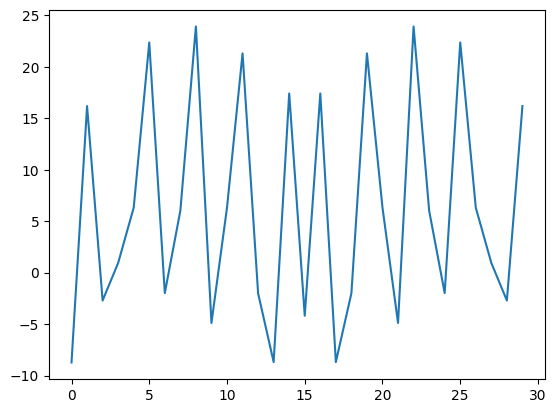

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


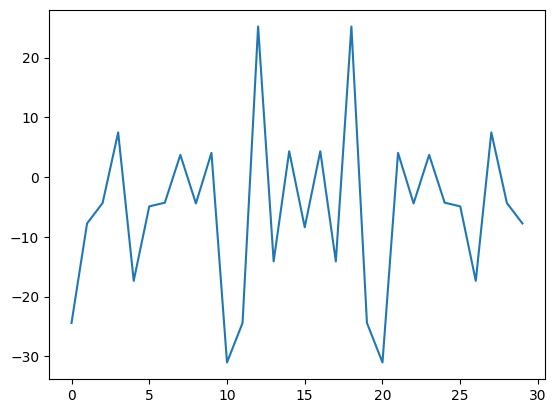

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


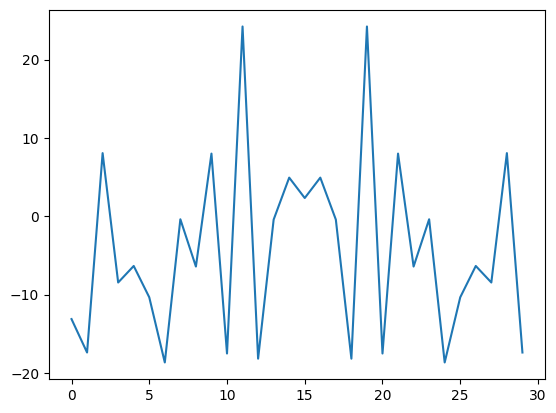

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


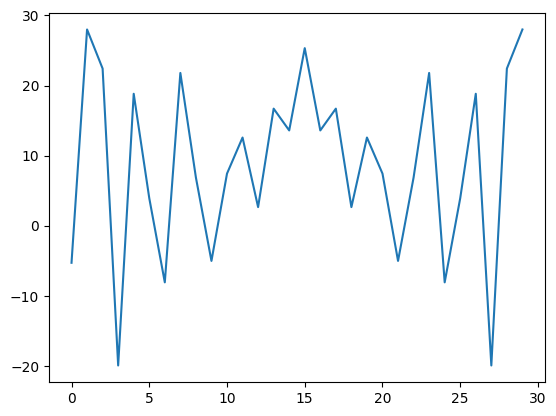

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


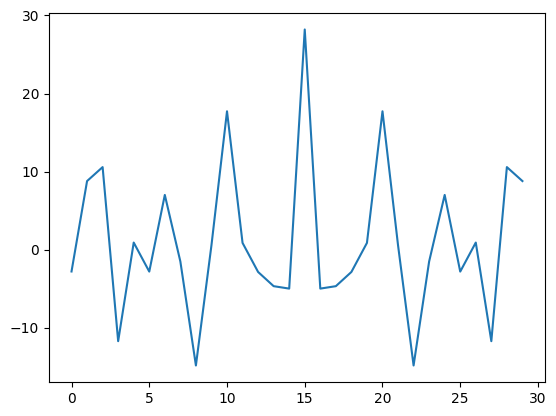

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


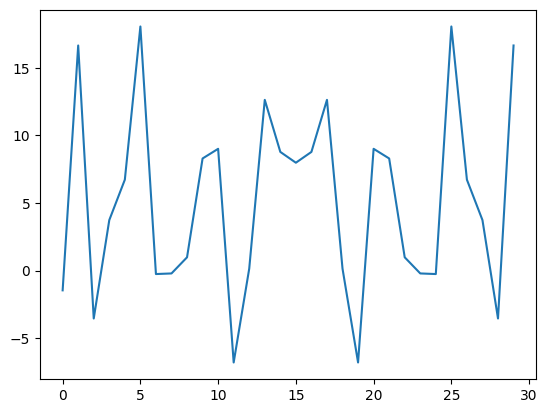

In [ ]:
pd.Series(np.fft.fft(pd.Series(dim_0)[42])).plot()
plt.show()
pd.Series(np.fft.fft(pd.Series(dim_1)[42])).plot()
plt.show()
pd.Series(np.fft.fft(pd.Series(dim_2)[42])).plot()
plt.show()
pd.Series(np.fft.fft(pd.Series(dim_3)[42])).plot()
plt.show()
pd.Series(np.fft.fft(pd.Series(dim_4)[42])).plot()
plt.show()
pd.Series(np.fft.fft(pd.Series(dim_5)[42])).plot()
plt.show()

### Statistical FFT features extraction Train Set

In [ ]:
dim_0_fft = pd.Series(dim_0).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_1_fft = pd.Series(dim_1).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_2_fft = pd.Series(dim_2).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_3_fft = pd.Series(dim_3).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_4_fft = pd.Series(dim_4).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_5_fft = pd.Series(dim_5).apply(lambda x: np.abs(np.fft.fft(x))[1:16])

X_train['dim0_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.mean())
X_train['dim1_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.mean())
X_train['dim2_mean_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.mean())
X_train['dim3_mean_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.mean())
X_train['dim4_mean_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.mean())
X_train['dim5_mean_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.mean())

X_train['dim0_std_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.std())
X_train['dim1_std_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.std())
X_train['dim2_std_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.std())
X_train['dim3_std_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.std())
X_train['dim4_std_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.std())
X_train['dim5_std_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.std())

X_train['dim0_aad_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim1_aad_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim2_aad_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim3_aad_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim4_aad_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_train['dim5_aad_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

X_train['dim0_min_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.min())
X_train['dim1_min_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.min())
X_train['dim2_min_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.min())
X_train['dim3_min_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.min())
X_train['dim4_min_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.min())
X_train['dim5_min_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.min())

X_train['dim0_max_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.max())
X_train['dim1_max_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.max())
X_train['dim2_max_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.max())
X_train['dim3_max_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.max())
X_train['dim4_max_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.max())
X_train['dim5_max_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.max())

X_train['dim0_maxmin_diff_fft'] = X_train['dim0_max_fft'] - X_train['dim0_min_fft']
X_train['dim1_maxmin_diff_fft'] = X_train['dim1_max_fft'] - X_train['dim1_min_fft']
X_train['dim2_maxmin_diff_fft'] = X_train['dim2_max_fft'] - X_train['dim2_min_fft']
X_train['dim3_maxmin_diff_fft'] = X_train['dim3_max_fft'] - X_train['dim3_min_fft']
X_train['dim4_maxmin_diff_fft'] = X_train['dim4_max_fft'] - X_train['dim4_min_fft']
X_train['dim5_maxmin_diff_fft'] = X_train['dim5_max_fft'] - X_train['dim5_min_fft']

X_train['dim0_median_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.median(x))
X_train['dim1_median_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.median(x))
X_train['dim2_median_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.median(x))
X_train['dim3_median_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.median(x))
X_train['dim4_median_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.median(x))
X_train['dim5_median_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.median(x))

X_train['dim0_mad_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim1_mad_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim2_mad_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim3_mad_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim4_mad_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_train['dim5_mad_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

X_train['dim0_IQR_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim1_IQR_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim2_IQR_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim3_IQR_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim4_IQR_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_train['dim5_IQR_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

X_train['dim0_neg_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x < 0))
X_train['dim1_neg_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x < 0))
X_train['dim2_neg_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x < 0))
X_train['dim3_neg_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x < 0))
X_train['dim4_neg_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x < 0))
X_train['dim5_neg_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x < 0))

X_train['dim0_pos_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x > 0))
X_train['dim1_pos_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x > 0))
X_train['dim2_pos_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x > 0))
X_train['dim3_pos_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x > 0))
X_train['dim4_pos_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x > 0))
X_train['dim5_pos_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x > 0))

X_train['dim0_above_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['dim1_above_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['dim2_above_mean_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['dim3_above_mean_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['dim4_above_mean_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x > x.mean()))
X_train['dim5_above_mean_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x > x.mean()))

X_train['dim0_peak_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim1_peak_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim2_peak_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim3_peak_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim4_peak_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: len(find_peaks(x)[0]))
X_train['dim5_peak_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: len(find_peaks(x)[0]))

X_train['dim0_skewness_fft'] = pd.Series(dim_0_fft).apply(lambda x: stats.skew(x))
X_train['dim1_skewness_fft'] = pd.Series(dim_1_fft).apply(lambda x: stats.skew(x))
X_train['dim2_skewness_fft'] = pd.Series(dim_2_fft).apply(lambda x: stats.skew(x))
X_train['dim3_skewness_fft'] = pd.Series(dim_3_fft).apply(lambda x: stats.skew(x))
X_train['dim4_skewness_fft'] = pd.Series(dim_4_fft).apply(lambda x: stats.skew(x))
X_train['dim5_skewness_fft'] = pd.Series(dim_5_fft).apply(lambda x: stats.skew(x))

X_train['dim0_kurtosis_fft'] = pd.Series(dim_0_fft).apply(lambda x: stats.kurtosis(x))
X_train['dim1_kurtosis_fft'] = pd.Series(dim_1_fft).apply(lambda x: stats.kurtosis(x))
X_train['dim2_kurtosis_fft'] = pd.Series(dim_2_fft).apply(lambda x: stats.kurtosis(x))
X_train['dim3_kurtosis_fft'] = pd.Series(dim_3_fft).apply(lambda x: stats.kurtosis(x))
X_train['dim4_kurtosis_fft'] = pd.Series(dim_4_fft).apply(lambda x: stats.kurtosis(x))
X_train['dim5_kurtosis_fft'] = pd.Series(dim_5_fft).apply(lambda x: stats.kurtosis(x))

X_train['dim0_energy_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x**2)/100)
X_train['dim1_energy_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x**2)/100)
X_train['dim2_energy_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x**2)/100)
X_train['dim3_energy_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x**2)/100)
X_train['dim4_energy_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x**2)/100)
X_train['dim5_energy_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x**2)/100)

X_train['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(dim_0_fft)**2 + pd.Series(dim_1_fft)**2 + pd.Series(dim_2_fft)**2)**0.5)]
X_train['avg_result_gyro_fft'] = [i.mean() for i in ((pd.Series(dim_3_fft)**2 + pd.Series(dim_4_fft)**2 + pd.Series(dim_5_fft)**2)**0.5)]

X_train['sma_acc_fft'] =    pd.Series(dim_0_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_1_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_2_fft).apply(lambda x: np.sum(abs(x)/100))
                  
X_train['sma_gyro_fft'] =    pd.Series(dim_3_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_4_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_5_fft).apply(lambda x: np.sum(abs(x)/100))

X_train


<ipython-input-47-901b87329988>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['dim0_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.mean())
<ipython-input-47-901b87329988>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['dim1_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.mean())
<ipython-input-47-901b87329988>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0    -2.633486   0.698630  -1.838858  -0.989798  -0.331767   0.551318   
1     2.358459  -0.013185  -2.105579  -0.700112   0.524063  -0.404389   
2     4.966444  -1.965019  -1.994086   0.023704   0.766874  -0.360443   
3    -4.189178   2.387300  -1.623857  -2.481642   0.974794  -0.325642   
4     2.990686  -0.884455  -0.818460  -0.310194   1.242907   0.915490   
..         ...        ...        ...        ...        ...        ...   
146   3.969377   1.495273  -2.499271   0.994415  -0.774953  -0.354317   
147   4.812887  -1.018456  -1.203562   0.039418  -0.003818  -0.345084   
148   5.507909  -0.061900  -3.413293   0.543062   0.239082  -0.506573   
149   3.269166   0.228282  -3.525194  -0.537646  -0.290041  -0.723194   
150   3.985046  -0.041243  -5.599009   0.531254  -0.165839  -0.437326   

      dim0_std  dim1_std  dim2_std  dim3_std  ...  dim0_energy_fft  \
0     5.774056  5.449947  6.697476  6.461239  ...       150.064524   
1    10.098880  6.337340  8.047178  3.205403  ...       465.219289   
2     6.718684  5.751589  6.792628  4.599634  ...       203.510415   
3     8.585126  6.091658  6.045597  8.526537  ...       331.923431   
4     8.187165  7.182345  6.531081  3.057754  ...       302.282765   
..         ...       ...       ...       ...  ...              ...   
146   6.492539  7.538682  5.426877  1.863603  ...       190.084920   
147   6.151023  6.659084  5.053611  2.974775  ...       170.603274   
148   6.624689  6.392655  6.344015  3.201403  ...       197.495477   
149   5.794449  7.135144  9.137378  4.135155  ...       151.595530   
150   6.028991  5.647233  9.115794  2.755113  ...       164.558748   

     dim1_energy_fft  dim2_energy_fft  dim3_energy_fft  dim4_energy_fft  \
0         138.597629       203.903095       192.490630       217.744548   
1         182.155681       297.533545        46.438680        56.054263   
2         163.083738       211.229504       101.266417        39.694695   
3         170.503010       164.978929       327.268480       417.935368   
4         241.662348       199.228851        42.542752        70.143876   
..               ...              ...              ...              ...   
146       256.846168       132.722897        15.817007        34.460557   
147       202.733506       116.156692        39.846097        19.216979   
148       190.051355       183.513680        46.127130        34.180665   
149       231.511018       376.830643        77.182059        50.648422   
150       147.337268       374.096266        34.219342        89.007563   

     dim5_energy_fft  avg_result_accl_fft  avg_result_gyro_fft  sma_acc_fft  \
0          21.030146            55.099854            52.985030    12.995121   
1         167.353996            72.017367            41.147585    17.260559   
2          27.951849            58.423294            33.145819    13.819918   
3          87.096695            60.410625            69.658207    14.033454   
4          79.147228            67.890111            35.333375    15.407286   
..               ...                  ...                  ...          ...   
146        23.992932            48.000211            20.549171    11.830658   
147        60.088916            49.810544            24.484768    11.997152   
148        44.027280            53.643015            24.789431    12.910026   
149        64.758162            60.446372            30.099182    14.215493   
150        79.069411            59.963037            31.309673    14.437457   

     sma_gyro_fft  
0       12.541283  
1        9.207137  
2        7.848614  
3       16.950870  
4        8.335364  
..            ...  
146      5.088080  
147      5.871031  
148      6.035515  
149      7.382799  
150      7.740249  

[151 rows x 200 columns]

### More feature extraction

In [ ]:
X_train['dim0_argmax'] = pd.Series(dim_0).apply(lambda x: np.argmax(x))
X_train['dim1_argmax'] = pd.Series(dim_1).apply(lambda x: np.argmax(x))
X_train['dim2_argmax'] = pd.Series(dim_2).apply(lambda x: np.argmax(x))
X_train['dim3_argmax'] = pd.Series(dim_3).apply(lambda x: np.argmax(x))
X_train['dim4_argmax'] = pd.Series(dim_4).apply(lambda x: np.argmax(x))
X_train['dim5_argmax'] = pd.Series(dim_5_fft).apply(lambda x: np.argmax(x))

X_train['dim0_argmin'] = pd.Series(dim_0).apply(lambda x: np.argmin(x))
X_train['dim1_argmin'] = pd.Series(dim_1).apply(lambda x: np.argmin(x))
X_train['dim2_argmin'] = pd.Series(dim_2).apply(lambda x: np.argmin(x))
X_train['dim3_argmin'] = pd.Series(dim_3).apply(lambda x: np.argmin(x))
X_train['dim4_argmin'] = pd.Series(dim_4).apply(lambda x: np.argmin(x))
X_train['dim5_argmin'] = pd.Series(dim_5).apply(lambda x: np.argmin(x))

X_train['dim0_arg_diff'] = abs(X_train['dim0_argmax'] - X_train['dim0_argmin'])
X_train['dim1_arg_diff'] = abs(X_train['dim1_argmax'] - X_train['dim1_argmin'])
X_train['dim2_arg_diff'] = abs(X_train['dim2_argmax'] - X_train['dim2_argmin'])
X_train['dim3_arg_diff'] = abs(X_train['dim3_argmax'] - X_train['dim3_argmin'])
X_train['dim4_arg_diff'] = abs(X_train['dim4_argmax'] - X_train['dim4_argmin'])
X_train['dim5_arg_diff'] = abs(X_train['dim5_argmax'] - X_train['dim5_argmin'])

X_train['dim0_argmax_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_train['dim1_argmax_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_train['dim2_argmax_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_train['dim3_argmax_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_train['dim4_argmax_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_train['dim5_argmax_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))

X_train['dim0_argmin_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_train['dim1_argmin_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_train['dim2_argmin_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_train['dim3_argmin_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_train['dim4_argmin_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_train['dim5_argmin_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))

X_train['dim0_arg_diff'] = abs(X_train['dim0_argmax_fft'] - X_train['dim0_argmin_fft'])
X_train['dim1_arg_diff'] = abs(X_train['dim1_argmax_fft'] - X_train['dim1_argmin_fft'])
X_train['dim2_arg_diff'] = abs(X_train['dim2_argmax_fft'] - X_train['dim2_argmin_fft'])
X_train['dim3_arg_diff'] = abs(X_train['dim3_argmax_fft'] - X_train['dim3_argmin_fft'])
X_train['dim4_arg_diff'] = abs(X_train['dim4_argmax_fft'] - X_train['dim4_argmin_fft'])
X_train['dim5_arg_diff'] = abs(X_train['dim5_argmax_fft'] - X_train['dim5_argmin_fft'])

X_train = X_train.dropna()
X_train

<ipython-input-27-28365c1bc809>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['dim0_argmax'] = pd.Series(dim_0).apply(lambda x: np.argmax(x))
<ipython-input-27-28365c1bc809>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train['dim1_argmax'] = pd.Series(dim_1).apply(lambda x: np.argmax(x))
<ipython-input-27-28365c1bc809>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0    -2.633486   0.698630  -1.838858  -0.989798  -0.331767   0.551318   
1     2.358459  -0.013185  -2.105579  -0.700112   0.524063  -0.404389   
2     4.966444  -1.965019  -1.994086   0.023704   0.766874  -0.360443   
3    -4.189178   2.387300  -1.623857  -2.481642   0.974794  -0.325642   
4     2.990686  -0.884455  -0.818460  -0.310194   1.242907   0.915490   
..         ...        ...        ...        ...        ...        ...   
146   3.969377   1.495273  -2.499271   0.994415  -0.774953  -0.354317   
147   4.812887  -1.018456  -1.203562   0.039418  -0.003818  -0.345084   
148   5.507909  -0.061900  -3.413293   0.543062   0.239082  -0.506573   
149   3.269166   0.228282  -3.525194  -0.537646  -0.290041  -0.723194   
150   3.985046  -0.041243  -5.599009   0.531254  -0.165839  -0.437326   

      dim0_std  dim1_std  dim2_std  dim3_std  ...  dim2_argmax_fft  \
0     5.774056  5.449947  6.697476  6.461239  ...               13   
1    10.098880  6.337340  8.047178  3.205403  ...                2   
2     6.718684  5.751589  6.792628  4.599634  ...                0   
3     8.585126  6.091658  6.045597  8.526537  ...                1   
4     8.187165  7.182345  6.531081  3.057754  ...               13   
..         ...       ...       ...       ...  ...              ...   
146   6.492539  7.538682  5.426877  1.863603  ...                0   
147   6.151023  6.659084  5.053611  2.974775  ...                5   
148   6.624689  6.392655  6.344015  3.201403  ...               13   
149   5.794449  7.135144  9.137378  4.135155  ...                0   
150   6.028991  5.647233  9.115794  2.755113  ...                0   

     dim3_argmax_fft  dim4_argmax_fft  dim5_argmax_fft  dim0_argmin_fft  \
0                  0                0                1                6   
1                  0                1                0                6   
2                  1                0                0                5   
3                  0                0                0                7   
4                  0                0                0                7   
..               ...              ...              ...              ...   
146                6                0                0                5   
147                0                0                0                1   
148                0                0                0                5   
149                0                0                0                5   
150                0                0                0                9   

     dim1_argmin_fft  dim2_argmin_fft  dim3_argmin_fft  dim4_argmin_fft  \
0                  5                5                7                5   
1                 10                6                7                2   
2                  1                2                5                9   
3                  1                3                5                7   
4                  5                3                5                7   
..               ...              ...              ...              ...   
146                3                9                4                7   
147                0                2               10                5   
148                9                6                5                6   
149                2                5                6               10   
150                5                3                6                5   

     dim5_argmin_fft  
0                  0  
1                  2  
2                  5  
3                  9  
4                  4  
..               ...  
146                7  
147                7  
148                1  
149                6  
150                5  

[151 rows x 230 columns]

### Statistical features extraction Test Set

In [ ]:
dim_0 = []
dim_1 = []
dim_2 = []
dim_3 = []
dim_4 = []
dim_5 = []
test_labels = []

window_size = 30
step_size = 30


for i in range(0, rs_test_expanded.shape[0], step_size):
    d0 = rs_test_expanded['dim_0'].values[i: i + window_size]
    d1 = rs_test_expanded['dim_1'].values[i: i + window_size]
    d2 = rs_test_expanded['dim_2'].values[i: i + window_size]
    d3 = rs_test_expanded['dim_3'].values[i: i + window_size]
    d4 = rs_test_expanded['dim_4'].values[i: i + window_size]
    d5 = rs_test_expanded['dim_5'].values[i: i + window_size]

    label = rs_test_expanded['class'][i: i + window_size].mode()[0]

    dim_0.append(d0)
    dim_1.append(d1)
    dim_2.append(d2)
    dim_3.append(d3)
    dim_4.append(d4)
    dim_5.append(d5)

    test_labels.append(label)


X_test = pd.DataFrame()
X_test['dim0_mean'] = pd.Series(dim_0).apply(lambda x: x.mean())
X_test['dim1_mean'] = pd.Series(dim_1).apply(lambda x: x.mean())
X_test['dim2_mean'] = pd.Series(dim_2).apply(lambda x: x.mean())
X_test['dim3_mean'] = pd.Series(dim_3).apply(lambda x: x.mean())
X_test['dim4_mean'] = pd.Series(dim_4).apply(lambda x: x.mean())
X_test['dim5_mean'] = pd.Series(dim_5).apply(lambda x: x.mean())

X_test['dim0_std'] = pd.Series(dim_0).apply(lambda x: x.std())
X_test['dim1_std'] = pd.Series(dim_1).apply(lambda x: x.std())
X_test['dim2_std'] = pd.Series(dim_2).apply(lambda x: x.std())
X_test['dim3_std'] = pd.Series(dim_3).apply(lambda x: x.std())
X_test['dim4_std'] = pd.Series(dim_4).apply(lambda x: x.std())
X_test['dim5_std'] = pd.Series(dim_5).apply(lambda x: x.std())

X_test['dim0_aad'] = pd.Series(dim_0).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim1_aad'] = pd.Series(dim_1).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim2_aad'] = pd.Series(dim_2).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim3_aad'] = pd.Series(dim_3).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim4_aad'] = pd.Series(dim_4).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim5_aad'] = pd.Series(dim_5).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

X_test['dim0_min'] = pd.Series(dim_0).apply(lambda x: x.min())
X_test['dim1_min'] = pd.Series(dim_1).apply(lambda x: x.min())
X_test['dim2_min'] = pd.Series(dim_2).apply(lambda x: x.min())
X_test['dim3_min'] = pd.Series(dim_3).apply(lambda x: x.min())
X_test['dim4_min'] = pd.Series(dim_4).apply(lambda x: x.min())
X_test['dim5_min'] = pd.Series(dim_5).apply(lambda x: x.min())

X_test['dim0_max'] = pd.Series(dim_0).apply(lambda x: x.max())
X_test['dim1_max'] = pd.Series(dim_1).apply(lambda x: x.max())
X_test['dim2_max'] = pd.Series(dim_2).apply(lambda x: x.max())
X_test['dim3_max'] = pd.Series(dim_3).apply(lambda x: x.max())
X_test['dim4_max'] = pd.Series(dim_4).apply(lambda x: x.max())
X_test['dim5_max'] = pd.Series(dim_5).apply(lambda x: x.max())

X_test['dim0_maxmin_diff'] = X_test['dim0_max'] - X_test['dim0_min']
X_test['dim1_maxmin_diff'] = X_test['dim1_max'] - X_test['dim1_min']
X_test['dim2_maxmin_diff'] = X_test['dim2_max'] - X_test['dim2_min']
X_test['dim3_maxmin_diff'] = X_test['dim3_max'] - X_test['dim3_min']
X_test['dim4_maxmin_diff'] = X_test['dim4_max'] - X_test['dim4_min']
X_test['dim5_maxmin_diff'] = X_test['dim5_max'] - X_test['dim5_min']

X_test['dim0_median'] = pd.Series(dim_0).apply(lambda x: np.median(x))
X_test['dim1_median'] = pd.Series(dim_1).apply(lambda x: np.median(x))
X_test['dim2_median'] = pd.Series(dim_2).apply(lambda x: np.median(x))
X_test['dim3_median'] = pd.Series(dim_3).apply(lambda x: np.median(x))
X_test['dim4_median'] = pd.Series(dim_4).apply(lambda x: np.median(x))
X_test['dim5_median'] = pd.Series(dim_5).apply(lambda x: np.median(x))

X_test['dim0_mad'] = pd.Series(dim_0).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim1_mad'] = pd.Series(dim_1).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim2_mad'] = pd.Series(dim_2).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim3_mad'] = pd.Series(dim_3).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim4_mad'] = pd.Series(dim_4).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim5_mad'] = pd.Series(dim_5).apply(lambda x: np.median(np.absolute(x - np.median(x))))

X_test['dim0_IQR'] = pd.Series(dim_0).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim1_IQR'] = pd.Series(dim_1).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim2_IQR'] = pd.Series(dim_2).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim3_IQR'] = pd.Series(dim_3).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim4_IQR'] = pd.Series(dim_4).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim5_IQR'] = pd.Series(dim_5).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

X_test['dim0_neg_count'] = pd.Series(dim_0).apply(lambda x: np.sum(x < 0))
X_test['dim1_neg_count'] = pd.Series(dim_1).apply(lambda x: np.sum(x < 0))
X_test['dim2_neg_count'] = pd.Series(dim_2).apply(lambda x: np.sum(x < 0))
X_test['dim3_neg_count'] = pd.Series(dim_3).apply(lambda x: np.sum(x < 0))
X_test['dim4_neg_count'] = pd.Series(dim_4).apply(lambda x: np.sum(x < 0))
X_test['dim5_neg_count'] = pd.Series(dim_5).apply(lambda x: np.sum(x < 0))

X_test['dim0_pos_count'] = pd.Series(dim_0).apply(lambda x: np.sum(x > 0))
X_test['dim1_pos_count'] = pd.Series(dim_1).apply(lambda x: np.sum(x > 0))
X_test['dim2_pos_count'] = pd.Series(dim_2).apply(lambda x: np.sum(x > 0))
X_test['dim3_pos_count'] = pd.Series(dim_3).apply(lambda x: np.sum(x > 0))
X_test['dim4_pos_count'] = pd.Series(dim_4).apply(lambda x: np.sum(x > 0))
X_test['dim5_pos_count'] = pd.Series(dim_5).apply(lambda x: np.sum(x > 0))

X_test['dim0_above_mean'] = pd.Series(dim_0).apply(lambda x: np.sum(x > x.mean()))
X_test['dim1_above_mean'] = pd.Series(dim_1).apply(lambda x: np.sum(x > x.mean()))
X_test['dim2_above_mean'] = pd.Series(dim_2).apply(lambda x: np.sum(x > x.mean()))
X_test['dim3_above_mean'] = pd.Series(dim_3).apply(lambda x: np.sum(x > x.mean()))
X_test['dim4_above_mean'] = pd.Series(dim_4).apply(lambda x: np.sum(x > x.mean()))
X_test['dim5_above_mean'] = pd.Series(dim_5).apply(lambda x: np.sum(x > x.mean()))

X_test['dim0_peak_count'] = pd.Series(dim_0).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim1_peak_count'] = pd.Series(dim_1).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim2_peak_count'] = pd.Series(dim_2).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim3_peak_count'] = pd.Series(dim_3).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim4_peak_count'] = pd.Series(dim_4).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim5_peak_count'] = pd.Series(dim_5).apply(lambda x: len(find_peaks(x)[0]))

X_test['dim0_skewness'] = pd.Series(dim_0).apply(lambda x: stats.skew(x))
X_test['dim1_skewness'] = pd.Series(dim_1).apply(lambda x: stats.skew(x))
X_test['dim2_skewness'] = pd.Series(dim_2).apply(lambda x: stats.skew(x))
X_test['dim3_skewness'] = pd.Series(dim_3).apply(lambda x: stats.skew(x))
X_test['dim4_skewness'] = pd.Series(dim_4).apply(lambda x: stats.skew(x))
X_test['dim5_skewness'] = pd.Series(dim_5).apply(lambda x: stats.skew(x))

X_test['dim0_kurtosis'] = pd.Series(dim_0).apply(lambda x: stats.kurtosis(x))
X_test['dim1_kurtosis'] = pd.Series(dim_1).apply(lambda x: stats.kurtosis(x))
X_test['dim2_kurtosis'] = pd.Series(dim_2).apply(lambda x: stats.kurtosis(x))
X_test['dim3_kurtosis'] = pd.Series(dim_3).apply(lambda x: stats.kurtosis(x))
X_test['dim4_kurtosis'] = pd.Series(dim_4).apply(lambda x: stats.kurtosis(x))
X_test['dim5_kurtosis'] = pd.Series(dim_5).apply(lambda x: stats.kurtosis(x))


X_test['dim0_energy'] = pd.Series(dim_0).apply(lambda x: np.sum(x**2)/100)
X_test['dim1_energy'] = pd.Series(dim_1).apply(lambda x: np.sum(x**2)/100)
X_test['dim2_energy'] = pd.Series(dim_2).apply(lambda x: np.sum(x**2)/100)
X_test['dim3_energy'] = pd.Series(dim_3).apply(lambda x: np.sum(x**2)/100)
X_test['dim4_energy'] = pd.Series(dim_4).apply(lambda x: np.sum(x**2)/100)
X_test['dim5_energy'] = pd.Series(dim_5).apply(lambda x: np.sum(x**2)/100)

X_test['avg_result_accl'] = [i.mean() for i in ((pd.Series(dim_0)**2 + pd.Series(dim_1)**2 + pd.Series(dim_2)**2)**0.5)]
X_test['avg_result_gyro'] = [i.mean() for i in ((pd.Series(dim_3)**2 + pd.Series(dim_4)**2 + pd.Series(dim_5)**2)**0.5)]

X_test['sma_acc'] =    pd.Series(dim_0).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_1).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_2).apply(lambda x: np.sum(abs(x)/100))
                  
X_test['sma_gyro'] =    pd.Series(dim_3).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_4).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_5).apply(lambda x: np.sum(abs(x)/100))
                  

X_test

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0     4.289960  -0.436669  -0.680847   0.375092   0.350766  -0.738109   
1     3.510931   0.615146   0.220610   0.380241  -0.023260  -1.245393   
2    -2.002441   0.969086  -1.209829  -2.404049   1.221955   0.853877   
3     2.073937   1.037241  -0.415073   0.548743   0.986158   1.057359   
4    -3.508742  -1.943276  -1.680734  -0.220261   0.280098   0.405898   
..         ...        ...        ...        ...        ...        ...   
147   3.433661   0.881274  -2.867452  -0.300073  -0.541020  -0.931026   
148   3.158927   3.159966  -2.009339   0.223013  -0.146042  -0.320759   
149   5.087595   2.530119  -4.752522  -1.723823  -0.111862  -0.951268   
150   4.477552   1.405218  -3.134512  -0.570228  -0.373227  -0.574489   
151   4.563951   3.704915  -3.240695  -0.408828   0.268823   0.654923   

     dim0_std  dim1_std  dim2_std  dim3_std  ...  dim0_energy  dim1_energy  \
0    6.289654  7.193739  6.694751  7.873237  ...    17.389050    15.582167   
1    7.196994  6.584590  6.038286  1.881960  ...    19.237005    13.120568   
2    5.759555  7.598385  5.442411  8.784274  ...    11.154672    17.602373   
3    8.263875  6.930559  7.799754  6.302904  ...    21.777852    14.732554   
4    7.158941  7.095643  5.719966  3.630355  ...    19.068514    16.237340   
..        ...       ...       ...       ...  ...          ...          ...   
147  5.400476  5.305159  6.583584  6.246785  ...    12.286550     8.676407   
148  5.515254  4.818379  6.479946  3.949896  ...    12.119054     9.960650   
149  6.755372  4.009576  8.462045  9.179685  ...    21.455604     6.743461   
150  6.002022  4.189902  6.416500  6.609422  ...    16.821821     5.858975   
151  6.388407  6.635750  7.194322  4.117022  ...    18.492419    17.327874   

     dim2_energy  dim3_energy  dim4_energy  dim5_energy  avg_result_accl  \
0      13.584974    18.638568     3.400242     4.658500         9.259124   
1      10.952869     1.105906     5.053374     8.806206         9.289760   
2       9.325057    24.882878     9.781243     3.963203         6.707960   
3      18.302537    12.008317     4.868939     4.706936        10.572657   
4      10.662865     3.968398     4.773627     1.681152         8.285584   
..           ...          ...          ...          ...              ...   
147    15.469758    11.733710     1.847183     5.117320         7.289899   
148    13.808142     4.695424     1.118586     2.650931         7.884885   
149    28.257800    26.171457     1.008270     4.254525         8.980344   
150    15.298992    13.202887     2.561192     5.440714         7.827653   
151    18.678113     5.135103     6.264569     5.500972        11.099907   

     avg_result_gyro   sma_acc  sma_gyro  
0           5.074365  4.409031  2.336790  
1           3.377347  4.416791  1.541747  
2           4.718315  3.202011  2.152511  
3           4.328626  4.863483  1.903166  
4           3.729319  3.822594  1.744403  
..               ...       ...       ...  
147         4.010850  3.267191  1.753538  
148         3.504561  3.678739  1.568620  
149         4.964446  4.159083  2.145134  
150         4.257967  3.594125  1.772741  
151         4.597254  4.990729  2.087978  

[152 rows x 100 columns]

### Statistical FFT features extraction Test Set

In [ ]:
dim_0_fft = pd.Series(dim_0).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_1_fft = pd.Series(dim_1).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_2_fft = pd.Series(dim_2).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_3_fft = pd.Series(dim_3).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_4_fft = pd.Series(dim_4).apply(lambda x: np.abs(np.fft.fft(x))[1:16])
dim_5_fft = pd.Series(dim_5).apply(lambda x: np.abs(np.fft.fft(x))[1:16])

X_test['dim0_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.mean())
X_test['dim1_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.mean())
X_test['dim2_mean_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.mean())
X_test['dim3_mean_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.mean())
X_test['dim4_mean_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.mean())
X_test['dim5_mean_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.mean())

X_test['dim0_std_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.std())
X_test['dim1_std_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.std())
X_test['dim2_std_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.std())
X_test['dim3_std_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.std())
X_test['dim4_std_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.std())
X_test['dim5_std_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.std())

X_test['dim0_aad_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim1_aad_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim2_aad_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim3_aad_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim4_aad_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_test['dim5_aad_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

X_test['dim0_min_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.min())
X_test['dim1_min_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.min())
X_test['dim2_min_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.min())
X_test['dim3_min_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.min())
X_test['dim4_min_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.min())
X_test['dim5_min_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.min())

X_test['dim0_max_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.max())
X_test['dim1_max_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.max())
X_test['dim2_max_fft'] = pd.Series(dim_2_fft).apply(lambda x: x.max())
X_test['dim3_max_fft'] = pd.Series(dim_3_fft).apply(lambda x: x.max())
X_test['dim4_max_fft'] = pd.Series(dim_4_fft).apply(lambda x: x.max())
X_test['dim5_max_fft'] = pd.Series(dim_5_fft).apply(lambda x: x.max())

X_test['dim0_maxmin_diff_fft'] = X_test['dim0_max_fft'] - X_test['dim0_min_fft']
X_test['dim1_maxmin_diff_fft'] = X_test['dim1_max_fft'] - X_test['dim1_min_fft']
X_test['dim2_maxmin_diff_fft'] = X_test['dim2_max_fft'] - X_test['dim2_min_fft']
X_test['dim3_maxmin_diff_fft'] = X_test['dim3_max_fft'] - X_test['dim3_min_fft']
X_test['dim4_maxmin_diff_fft'] = X_test['dim4_max_fft'] - X_test['dim4_min_fft']
X_test['dim5_maxmin_diff_fft'] = X_test['dim5_max_fft'] - X_test['dim5_min_fft']

X_test['dim0_median_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.median(x))
X_test['dim1_median_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.median(x))
X_test['dim2_median_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.median(x))
X_test['dim3_median_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.median(x))
X_test['dim4_median_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.median(x))
X_test['dim5_median_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.median(x))

X_test['dim0_mad_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim1_mad_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim2_mad_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim3_mad_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim4_mad_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_test['dim5_mad_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.median(np.absolute(x - np.median(x))))

X_test['dim0_IQR_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim1_IQR_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim2_IQR_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim3_IQR_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim4_IQR_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_test['dim5_IQR_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

X_test['dim0_neg_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x < 0))
X_test['dim1_neg_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x < 0))
X_test['dim2_neg_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x < 0))
X_test['dim3_neg_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x < 0))
X_test['dim4_neg_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x < 0))
X_test['dim5_neg_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x < 0))

X_test['dim0_pos_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x > 0))
X_test['dim1_pos_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x > 0))
X_test['dim2_pos_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x > 0))
X_test['dim3_pos_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x > 0))
X_test['dim4_pos_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x > 0))
X_test['dim5_pos_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x > 0))

X_test['dim0_above_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['dim1_above_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['dim2_above_mean_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['dim3_above_mean_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['dim4_above_mean_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x > x.mean()))
X_test['dim5_above_mean_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x > x.mean()))

X_test['dim0_peak_count_fft'] = pd.Series(dim_0_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim1_peak_count_fft'] = pd.Series(dim_1_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim2_peak_count_fft'] = pd.Series(dim_2_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim3_peak_count_fft'] = pd.Series(dim_3_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim4_peak_count_fft'] = pd.Series(dim_4_fft).apply(lambda x: len(find_peaks(x)[0]))
X_test['dim5_peak_count_fft'] = pd.Series(dim_5_fft).apply(lambda x: len(find_peaks(x)[0]))

X_test['dim0_skewness_fft'] = pd.Series(dim_0_fft).apply(lambda x: stats.skew(x))
X_test['dim1_skewness_fft'] = pd.Series(dim_1_fft).apply(lambda x: stats.skew(x))
X_test['dim2_skewness_fft'] = pd.Series(dim_2_fft).apply(lambda x: stats.skew(x))
X_test['dim3_skewness_fft'] = pd.Series(dim_3_fft).apply(lambda x: stats.skew(x))
X_test['dim4_skewness_fft'] = pd.Series(dim_4_fft).apply(lambda x: stats.skew(x))
X_test['dim5_skewness_fft'] = pd.Series(dim_5_fft).apply(lambda x: stats.skew(x))

X_test['dim0_kurtosis_fft'] = pd.Series(dim_0_fft).apply(lambda x: stats.kurtosis(x))
X_test['dim1_kurtosis_fft'] = pd.Series(dim_1_fft).apply(lambda x: stats.kurtosis(x))
X_test['dim2_kurtosis_fft'] = pd.Series(dim_2_fft).apply(lambda x: stats.kurtosis(x))
X_test['dim3_kurtosis_fft'] = pd.Series(dim_3_fft).apply(lambda x: stats.kurtosis(x))
X_test['dim4_kurtosis_fft'] = pd.Series(dim_4_fft).apply(lambda x: stats.kurtosis(x))
X_test['dim5_kurtosis_fft'] = pd.Series(dim_5_fft).apply(lambda x: stats.kurtosis(x))

X_test['dim0_energy_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.sum(x**2)/100)
X_test['dim1_energy_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.sum(x**2)/100)
X_test['dim2_energy_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.sum(x**2)/100)
X_test['dim3_energy_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.sum(x**2)/100)
X_test['dim4_energy_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.sum(x**2)/100)
X_test['dim5_energy_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.sum(x**2)/100)

X_test['avg_result_accl_fft'] = [i.mean() for i in ((pd.Series(dim_0_fft)**2 + pd.Series(dim_1_fft)**2 + pd.Series(dim_2_fft)**2)**0.5)]
X_test['avg_result_gyro_fft'] = [i.mean() for i in ((pd.Series(dim_3_fft)**2 + pd.Series(dim_4_fft)**2 + pd.Series(dim_5_fft)**2)**0.5)]

X_test['sma_acc_fft'] =    pd.Series(dim_0_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_1_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_2_fft).apply(lambda x: np.sum(abs(x)/100))
                  
X_test['sma_gyro_fft'] =    pd.Series(dim_3_fft).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(dim_4_fft).apply(lambda x: np.sum(abs(x)/100)) \
                  + pd.Series(dim_5_fft).apply(lambda x: np.sum(abs(x)/100))

X_test

<ipython-input-49-431b7308b0c2>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['dim0_mean_fft'] = pd.Series(dim_0_fft).apply(lambda x: x.mean())
<ipython-input-49-431b7308b0c2>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['dim1_mean_fft'] = pd.Series(dim_1_fft).apply(lambda x: x.mean())
<ipython-input-49-431b7308b0c2>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0     4.289960  -0.436669  -0.680847   0.375092   0.350766  -0.738109   
1     3.510931   0.615146   0.220610   0.380241  -0.023260  -1.245393   
2    -2.002441   0.969086  -1.209829  -2.404049   1.221955   0.853877   
3     2.073937   1.037241  -0.415073   0.548743   0.986158   1.057359   
4    -3.508742  -1.943276  -1.680734  -0.220261   0.280098   0.405898   
..         ...        ...        ...        ...        ...        ...   
147   3.433661   0.881274  -2.867452  -0.300073  -0.541020  -0.931026   
148   3.158927   3.159966  -2.009339   0.223013  -0.146042  -0.320759   
149   5.087595   2.530119  -4.752522  -1.723823  -0.111862  -0.951268   
150   4.477552   1.405218  -3.134512  -0.570228  -0.373227  -0.574489   
151   4.563951   3.704915  -3.240695  -0.408828   0.268823   0.654923   

     dim0_std  dim1_std  dim2_std  dim3_std  ...  dim0_energy_fft  \
0    6.289654  7.193739  6.694751  7.873237  ...       178.018979   
1    7.196994  6.584590  6.038286  1.881960  ...       233.214997   
2    5.759555  7.598385  5.442411  8.784274  ...       151.326190   
3    8.263875  6.930559  7.799754  6.302904  ...       308.338256   
4    7.158941  7.095643  5.719966  3.630355  ...       231.141022   
..        ...       ...       ...       ...  ...              ...   
147  5.400476  5.305159  6.583584  6.246785  ...       132.021665   
148  5.515254  4.818379  6.479946  3.949896  ...       137.304065   
149  6.755372  4.009576  8.462045  9.179685  ...       205.830674   
150  6.002022  4.189902  6.416500  6.609422  ...       162.177370   
151  6.388407  6.635750  7.194322  4.117022  ...       188.285480   

     dim1_energy_fft  dim2_energy_fft  dim3_energy_fft  dim4_energy_fft  \
0         259.168324       203.394003       297.742129        50.823898   
1         200.974118       168.114021        15.945187        78.062447   
2         261.839341       139.587919       347.235803       140.223880   
3         234.834760       277.276730       182.081474        69.786014   
4         232.120294       147.718338        63.736890        72.669365   
..               ...              ...              ...              ...   
147       126.651870       195.061568       178.934863        26.397831   
148       105.543339       189.186289        70.339937        17.083473   
149        72.837968       323.628999       379.209648        15.393370   
150        79.812693       190.872593       202.245865        37.891145   
151       198.235248       240.186656        78.097264        93.873614   

     dim5_energy_fft  avg_result_accl_fft  avg_result_gyro_fft  sma_acc_fft  \
0          67.432371            61.955472            51.839428    13.720982   
1         127.812962            61.190056            38.081731    15.077300   
2          56.527530            59.315322            53.569694    13.841061   
3          65.928970            72.683927            45.258931    17.139718   
4          24.633496            54.053301            32.191232    13.128894   
..               ...                  ...                  ...          ...   
147        72.976774            44.944773            41.786591    10.991066   
148        39.315917            39.542599            25.323169     9.834987   
149        59.789085            48.554080            49.176629    12.009053   
150        80.126474            46.356069            45.161887    10.977708   
151        82.267663            57.786169            40.092224    13.970817   

     sma_gyro_fft  
0       11.547046  
1        8.997476  
2       12.470580  
3       10.843909  
4        7.746912  
..            ...  
147      9.566771  
148      6.125905  
149     10.481401  
150     10.358582  
151      9.495886  

[152 rows x 200 columns]

### More feature exctraction

In [ ]:
X_test['dim0_argmax'] = pd.Series(dim_0).apply(lambda x: np.argmax(x))
X_test['dim1_argmax'] = pd.Series(dim_1).apply(lambda x: np.argmax(x))
X_test['dim2_argmax'] = pd.Series(dim_2).apply(lambda x: np.argmax(x))
X_test['dim3_argmax'] = pd.Series(dim_3).apply(lambda x: np.argmax(x))
X_test['dim4_argmax'] = pd.Series(dim_4).apply(lambda x: np.argmax(x))
X_test['dim5_argmax'] = pd.Series(dim_5_fft).apply(lambda x: np.argmax(x))

X_test['dim0_argmin'] = pd.Series(dim_0).apply(lambda x: np.argmin(x))
X_test['dim1_argmin'] = pd.Series(dim_1).apply(lambda x: np.argmin(x))
X_test['dim2_argmin'] = pd.Series(dim_2).apply(lambda x: np.argmin(x))
X_test['dim3_argmin'] = pd.Series(dim_3).apply(lambda x: np.argmin(x))
X_test['dim4_argmin'] = pd.Series(dim_4).apply(lambda x: np.argmin(x))
X_test['dim5_argmin'] = pd.Series(dim_5).apply(lambda x: np.argmin(x))

X_test['dim0_arg_diff'] = abs(X_test['dim0_argmax'] - X_test['dim0_argmin'])
X_test['dim1_arg_diff'] = abs(X_test['dim1_argmax'] - X_test['dim1_argmin'])
X_test['dim2_arg_diff'] = abs(X_test['dim2_argmax'] - X_test['dim2_argmin'])
X_test['dim3_arg_diff'] = abs(X_test['dim3_argmax'] - X_test['dim3_argmin'])
X_test['dim4_arg_diff'] = abs(X_test['dim4_argmax'] - X_test['dim4_argmin'])
X_test['dim5_arg_diff'] = abs(X_test['dim5_argmax'] - X_test['dim5_argmin'])

X_test['dim0_argmax_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_test['dim1_argmax_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_test['dim2_argmax_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_test['dim3_argmax_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_test['dim4_argmax_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))
X_test['dim5_argmax_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.argmax(np.abs(np.fft.fft(x))[1:31]))

X_test['dim0_argmin_fft'] = pd.Series(dim_0_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_test['dim1_argmin_fft'] = pd.Series(dim_1_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_test['dim2_argmin_fft'] = pd.Series(dim_2_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_test['dim3_argmin_fft'] = pd.Series(dim_3_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_test['dim4_argmin_fft'] = pd.Series(dim_4_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))
X_test['dim5_argmin_fft'] = pd.Series(dim_5_fft).apply(lambda x: np.argmin(np.abs(np.fft.fft(x))[1:31]))

X_test['dim0_arg_diff'] = abs(X_test['dim0_argmax_fft'] - X_test['dim0_argmin_fft'])
X_test['dim1_arg_diff'] = abs(X_test['dim1_argmax_fft'] - X_test['dim1_argmin_fft'])
X_test['dim2_arg_diff'] = abs(X_test['dim2_argmax_fft'] - X_test['dim2_argmin_fft'])
X_test['dim3_arg_diff'] = abs(X_test['dim3_argmax_fft'] - X_test['dim3_argmin_fft'])
X_test['dim4_arg_diff'] = abs(X_test['dim4_argmax_fft'] - X_test['dim4_argmin_fft'])
X_test['dim5_arg_diff'] = abs(X_test['dim5_argmax_fft'] - X_test['dim5_argmin_fft'])

X_test = X_test.dropna()
X_test

<ipython-input-30-20f6223c6a3d>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['dim0_argmax'] = pd.Series(dim_0).apply(lambda x: np.argmax(x))
<ipython-input-30-20f6223c6a3d>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test['dim1_argmax'] = pd.Series(dim_1).apply(lambda x: np.argmax(x))
<ipython-input-30-20f6223c6a3d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

dim0_mean  dim1_mean  dim2_mean  dim3_mean  dim4_mean  dim5_mean  \
0     4.289960  -0.436669  -0.680847   0.375092   0.350766  -0.738109   
1     3.510931   0.615146   0.220610   0.380241  -0.023260  -1.245393   
2    -2.002441   0.969086  -1.209829  -2.404049   1.221955   0.853877   
3     2.073937   1.037241  -0.415073   0.548743   0.986158   1.057359   
4    -3.508742  -1.943276  -1.680734  -0.220261   0.280098   0.405898   
..         ...        ...        ...        ...        ...        ...   
147   3.433661   0.881274  -2.867452  -0.300073  -0.541020  -0.931026   
148   3.158927   3.159966  -2.009339   0.223013  -0.146042  -0.320759   
149   5.087595   2.530119  -4.752522  -1.723823  -0.111862  -0.951268   
150   4.477552   1.405218  -3.134512  -0.570228  -0.373227  -0.574489   
151   4.563951   3.704915  -3.240695  -0.408828   0.268823   0.654923   

     dim0_std  dim1_std  dim2_std  dim3_std  ...  dim2_argmax_fft  \
0    6.289654  7.193739  6.694751  7.873237  ...                0   
1    7.196994  6.584590  6.038286  1.881960  ...                4   
2    5.759555  7.598385  5.442411  8.784274  ...                1   
3    8.263875  6.930559  7.799754  6.302904  ...                2   
4    7.158941  7.095643  5.719966  3.630355  ...                0   
..        ...       ...       ...       ...  ...              ...   
147  5.400476  5.305159  6.583584  6.246785  ...               12   
148  5.515254  4.818379  6.479946  3.949896  ...                0   
149  6.755372  4.009576  8.462045  9.179685  ...               13   
150  6.002022  4.189902  6.416500  6.609422  ...                1   
151  6.388407  6.635750  7.194322  4.117022  ...                5   

     dim3_argmax_fft  dim4_argmax_fft  dim5_argmax_fft  dim0_argmin_fft  \
0                  0               13                0                4   
1                  1                0                1                9   
2                  0                0               13                7   
3                  0                0                0                5   
4                 12                0                0                5   
..               ...              ...              ...              ...   
147                3                0                0                5   
148               13                0                0                6   
149                0               13                0                3   
150                9               13                0                5   
151                0                0                0                5   

     dim1_argmin_fft  dim2_argmin_fft  dim3_argmin_fft  dim4_argmin_fft  \
0                 12                7                5                5   
1                  5               12               10                9   
2                  7                2                4                7   
3                  5                5                5                2   
4                  5                5                2                1   
..               ...              ...              ...              ...   
147                3                9                6                7   
148                7                5                5               10   
149                4                4                6                5   
150                7                5                0                5   
151                2                2                7                7   

     dim5_argmin_fft  
0                  5  
1                 10  
2                  7  
3                  5  
4                  7  
..               ...  
147                6  
148                5  
149                5  
150                7  
151                5  

[152 rows x 230 columns]

### Standardization and Feature Selection

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_std = scaler.transform(X_train)
X_test_data_std = scaler.transform(X_test)

selector = VarianceThreshold(threshold=0.01)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)

# print("Numărul de caracteristici inițiale:", X_test_data_std.shape[1])
# print("Numărul de caracteristici selectate:", X_test_new.shape[1])

selected_features = selector.get_support()
all_features = np.array(X_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new


Numărul de caracteristici inițiale: 200
Numărul de caracteristici selectate: 188


array(['dim0_neg_count_fft', 'dim1_neg_count_fft', 'dim2_neg_count_fft',
       'dim3_neg_count_fft', 'dim4_neg_count_fft', 'dim5_neg_count_fft',
       'dim0_pos_count_fft', 'dim1_pos_count_fft', 'dim2_pos_count_fft',
       'dim3_pos_count_fft', 'dim4_pos_count_fft', 'dim5_pos_count_fft'],
      dtype=object)

### Logistic Regression

In [ ]:
# logistic regression model
lr = LogisticRegression(random_state = 21)
lr.fit(X_train_new, y_train)
y_pred = lr.predict(X_test_new)
logistic_regr_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", logistic_regr_acc)
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8289473684210527

 -------------Classification Report-------------

                      precision    recall  f1-score   support

     Badminton_Clear       0.68      0.79      0.73        43
     Badminton_Smash       0.75      0.68      0.71        40
Squash_BackhandBoast       1.00      0.94      0.97        34
Squash_ForehandBoast       0.97      0.94      0.96        35

            accuracy                           0.83       152
           macro avg       0.85      0.84      0.84       152
        weighted avg       0.84      0.83      0.83       152



### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_new, y_train)
y_pred = rf.predict(X_test_new)

report = classification_report(y_test, y_pred)
random_forest_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", random_forest_acc)
print("\n -------------Classification Report-------------\n")
print(report)

Accuracy: 0.8092105263157895

 -------------Classification Report-------------

                      precision    recall  f1-score   support

     Badminton_Clear       0.65      0.79      0.72        43
     Badminton_Smash       0.71      0.55      0.62        40
Squash_BackhandBoast       0.94      1.00      0.97        34
Squash_ForehandBoast       1.00      0.94      0.97        35

            accuracy                           0.81       152
           macro avg       0.83      0.82      0.82       152
        weighted avg       0.81      0.81      0.81       152



### Random Forest Tuned

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [2, 5, 10],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_new, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   random_state=42)
rf_tuned.fit(X_train_new, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(X_test_new)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

# print the results
print("Accuracy:", random_forest_tuned_acc)
print("\n-------------Classification Report-------------\n")
print(rf_tuned_report)

Best hyperparameters: {'max_depth': 5, 'max_samples': 0.5, 'n_estimators': 200}
Accuracy: 0.8289473684210527

-------------Classification Report-------------

                      precision    recall  f1-score   support

     Badminton_Clear       0.69      0.84      0.76        43
     Badminton_Smash       0.79      0.57      0.67        40
Squash_BackhandBoast       0.94      0.97      0.96        34
Squash_ForehandBoast       0.94      0.97      0.96        35

            accuracy                           0.83       152
           macro avg       0.84      0.84      0.83       152
        weighted avg       0.83      0.83      0.82       152



In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [2, 5, 10],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_new, y_train)
for i, params in enumerate(rf_cv.cv_results_['params']):
    print(f"\nConfiguration {i}: {params}")
    rf_tuned = RandomForestClassifier(**params, random_state=42)
    rf_tuned.fit(X_train_new, y_train)
    y_pred = rf_tuned.predict(X_test_new)
    random_forest_tuned_acc = accuracy_score(y_test, y_pred)
    rf_tuned_report = classification_report(y_test, y_pred)
    print("Accuracy:", random_forest_tuned_acc)
    print("Classification Report:")
    print(rf_tuned_report)

best_config = rf_cv.best_params_
print("Best Configuration:", best_config)

# Get the best accuracy
best_accuracy = rf_cv.best_score_
print("Best Accuracy:", best_accuracy)


Configuration 0: {'max_depth': 2, 'max_samples': 0.3, 'n_estimators': 80}
Accuracy: 0.7894736842105263
Classification Report:
                      precision    recall  f1-score   support

     Badminton_Clear       0.62      0.81      0.71        43
     Badminton_Smash       0.75      0.53      0.62        40
Squash_BackhandBoast       0.97      0.91      0.94        34
Squash_ForehandBoast       0.92      0.94      0.93        35

            accuracy                           0.79       152
           macro avg       0.82      0.80      0.80       152
        weighted avg       0.80      0.79      0.79       152


Configuration 1: {'max_depth': 2, 'max_samples': 0.3, 'n_estimators': 100}
Accuracy: 0.8223684210526315
Classification Report:
                      precision    recall  f1-score   support

     Badminton_Clear       0.69      0.81      0.74        43
     Badminton_Smash       0.81      0.62      0.70        40
Squash_BackhandBoast       0.91      0.94      0.93        

Best hyperparameters: {'max_depth': 5, 'max_samples': 0.5, 'n_estimators': 200}
Confusion Matrix for Badminton_Clear:
[[36  6  1  0]
 [15 23  1  1]
 [ 0  0 33  1]
 [ 1  0  0 34]]


Confusion Matrix for Badminton_Smash:
[[23 15  1  1]
 [ 6 36  1  0]
 [ 0  0 33  1]
 [ 0  1  0 34]]


Confusion Matrix for Squash_BackhandBoast:
[[33  0  0  1]
 [ 1 36  6  0]
 [ 1 15 23  1]
 [ 0  1  0 34]]


Confusion Matrix for Squash_ForehandBoast:
[[34  1  0  0]
 [ 0 36  1  6]
 [ 1  0 33  0]
 [ 1 15  1 23]]




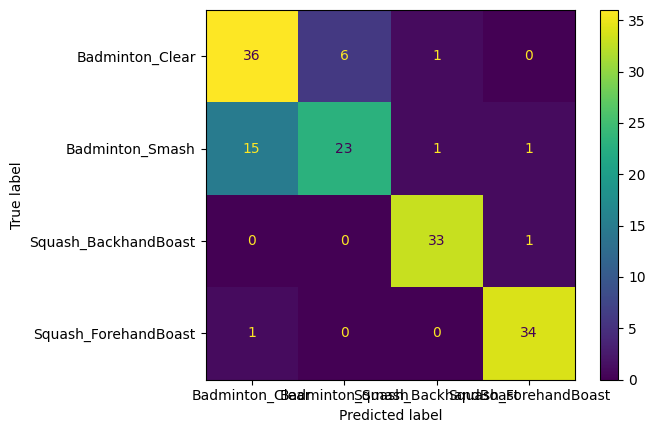

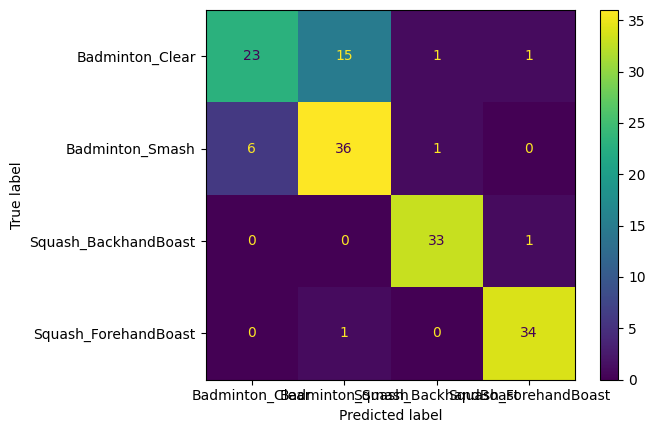

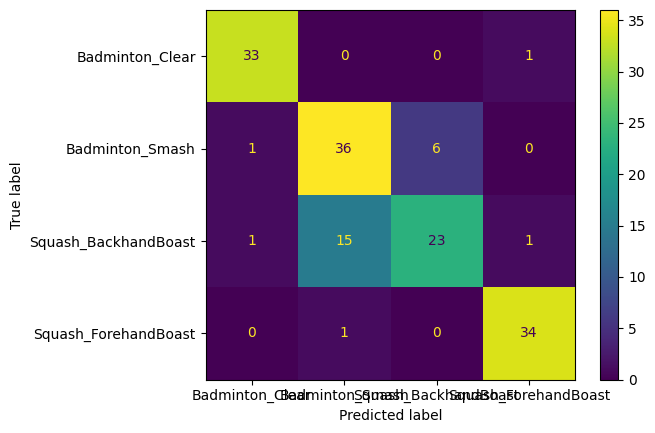

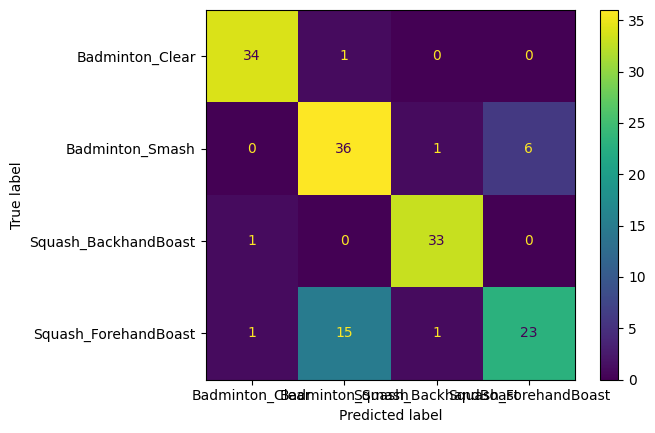

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [2, 5, 10],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train_new, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   random_state=42)
rf_tuned.fit(X_train_new, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(X_test_new)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

classes = ['Badminton_Clear', 'Badminton_Smash', 'Squash_BackhandBoast', 'Squash_ForehandBoast']
for i, class_name in enumerate(classes):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(y_test, y_pred, labels=[class_name, *set(classes)-{class_name}])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
    disp.plot()
    print()
    print()

### Gradient Boosting Trees

In [ ]:
gb = GradientBoostingClassifier()

# Train the model
gb.fit(X_train_new, y_train)

# Make predictions on the test data
y_pred = gb.predict(X_test_new)

# Print the classification report and accuracy score
gradient_boosting_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_acc)
print(classification_report(y_test, y_pred))

Accuracy: 0.8026315789473685
                      precision    recall  f1-score   support

     Badminton_Clear       0.74      0.72      0.73        43
     Badminton_Smash       0.66      0.72      0.69        40
Squash_BackhandBoast       0.91      0.94      0.93        34
Squash_ForehandBoast       0.97      0.86      0.91        35

            accuracy                           0.80       152
           macro avg       0.82      0.81      0.81       152
        weighted avg       0.81      0.80      0.80       152



### Gradient Boosting Trees Tuned

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(X_train_new, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test_new)

# Print the classification report and accuracy score
gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_tuned_acc)
print(classification_report(y_test, y_pred))

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Accuracy: 0.8289473684210527
                      precision    recall  f1-score   support

     Badminton_Clear       0.77      0.77      0.77        43
     Badminton_Smash       0.70      0.75      0.72        40
Squash_BackhandBoast       0.91      0.91      0.91        34
Squash_ForehandBoast       1.00      0.91      0.96        35

            accuracy                           0.83       152
           macro avg       0.84      0.84      0.84       152
        weighted avg       0.83      0.83      0.83       152



In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(X_train_new, y_train)


# Loop through each configuration and print the classification report
for i, params in enumerate(grid_search.cv_results_['params']):
    print(f"\nConfiguration {i}: {params}")
    gb_tuned = GradientBoostingClassifier(**params, random_state=42)
    gb_tuned.fit(X_train, y_train)
    y_pred = gb_tuned.predict(X_test)
    gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
    gb_tuned_report = classification_report(y_test, y_pred)
    print("Accuracy:", gradient_boosting_tuned_acc)
    print("Classification Report:")
    print(gb_tuned_report)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)
print('Best Accuracy:', grid_search.best_score_)


Configuration 0: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 50}
Accuracy: 0.7828947368421053
Classification Report:
                      precision    recall  f1-score   support

     Badminton_Clear       0.66      0.81      0.73        43
     Badminton_Smash       0.78      0.62      0.69        40
Squash_BackhandBoast       0.87      0.79      0.83        34
Squash_ForehandBoast       0.89      0.91      0.90        35

            accuracy                           0.78       152
           macro avg       0.80      0.79      0.79       152
        weighted avg       0.79      0.78      0.78       152


Configuration 1: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 100}
Accuracy: 0.7894736842105263
Classification Report:
                      precision    recall  f1-score   support

     Badminton_Clear       0.69      0.72      0.70        43
     Badminton_Smash       0.74      0.70      0.72        40
Squash_BackhandBoast       0.85      0.85      0.85  

Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Confusion Matrix for Badminton_Clear:
[[33 10  0  0]
 [ 8 30  2  0]
 [ 1  2 31  0]
 [ 1  1  1 32]]


Confusion Matrix for Badminton_Smash:
[[30  8  2  0]
 [10 33  0  0]
 [ 2  1 31  0]
 [ 1  1  1 32]]


Confusion Matrix for Squash_BackhandBoast:
[[31  1  2  0]
 [ 0 33 10  0]
 [ 2  8 30  0]
 [ 1  1  1 32]]


Confusion Matrix for Squash_ForehandBoast:
[[32  1  1  1]
 [ 0 33  0 10]
 [ 0  1 31  2]
 [ 0  8  2 30]]




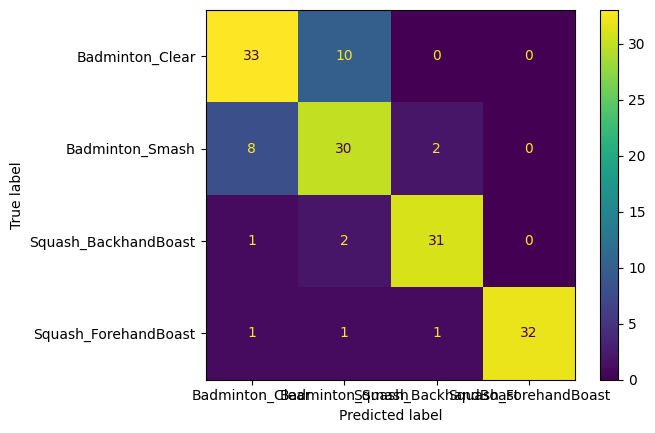

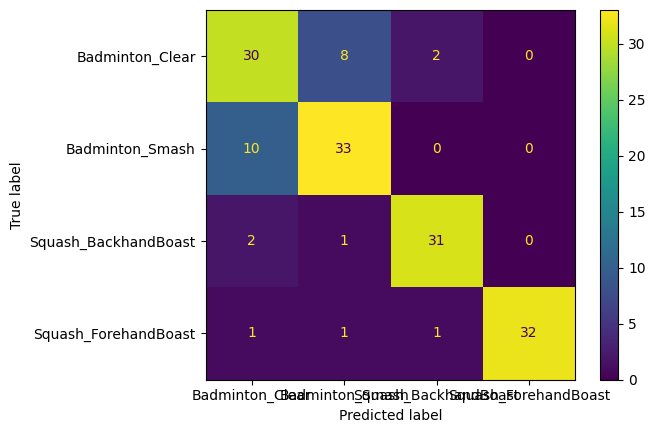

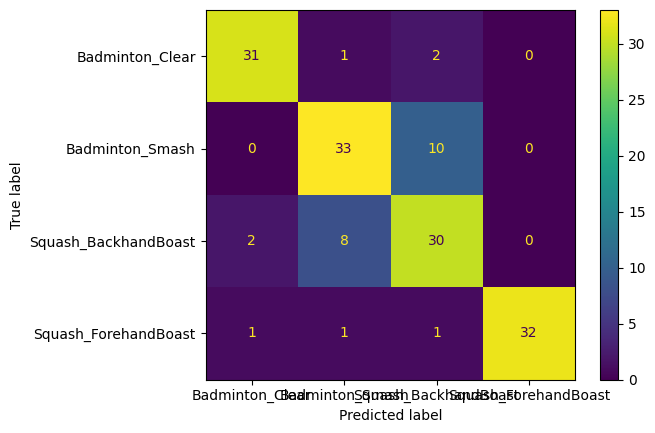

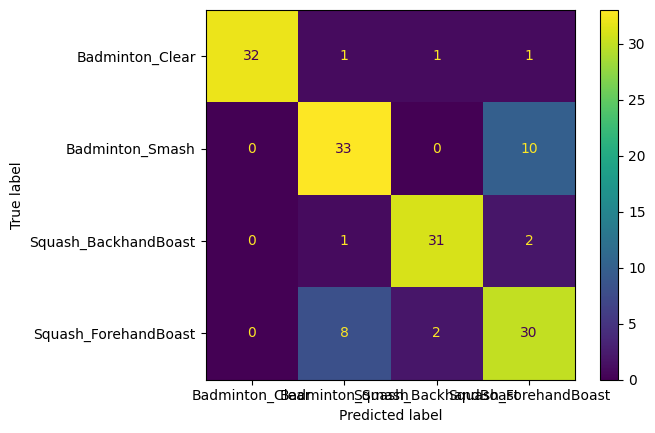

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(X_train_new, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test_new)
print('Best Parameters:', grid_search.best_params_)

classes = ['Badminton_Clear', 'Badminton_Smash', 'Squash_BackhandBoast', 'Squash_ForehandBoast']
for i, class_name in enumerate(classes):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(y_test, y_pred, labels=[class_name, *set(classes)-{class_name}])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
    disp.plot()
    print()
    print()

### SVM

In [ ]:
clf = svm.SVC()

clf.fit(X_train_new, y_train)

y_pred = clf.predict(X_test_new)
svm_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_acc)
print(classification_report(y_test, y_pred))

Accuracy: 0.8355263157894737
                      precision    recall  f1-score   support

     Badminton_Clear       0.69      0.84      0.76        43
     Badminton_Smash       0.83      0.62      0.71        40
Squash_BackhandBoast       0.94      0.97      0.96        34
Squash_ForehandBoast       0.94      0.94      0.94        35

            accuracy                           0.84       152
           macro avg       0.85      0.84      0.84       152
        weighted avg       0.84      0.84      0.83       152



### SVM Tuned

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}
Confusion Matrix for Badminton_Clear:
[[36  5  2  0]
 [14 25  0  1]
 [ 0  0 33  1]
 [ 2  0  0 33]]


Confusion Matrix for Badminton_Smash:
[[25 14  0  1]
 [ 5 36  2  0]
 [ 0  0 33  1]
 [ 0  2  0 33]]


Confusion Matrix for Squash_BackhandBoast:
[[33  0  0  1]
 [ 2 36  5  0]
 [ 0 14 25  1]
 [ 0  2  0 33]]


Confusion Matrix for Squash_ForehandBoast:
[[33  2  0  0]
 [ 0 36  2  5]
 [ 1  0 33  0]
 [ 1 14  0 25]]




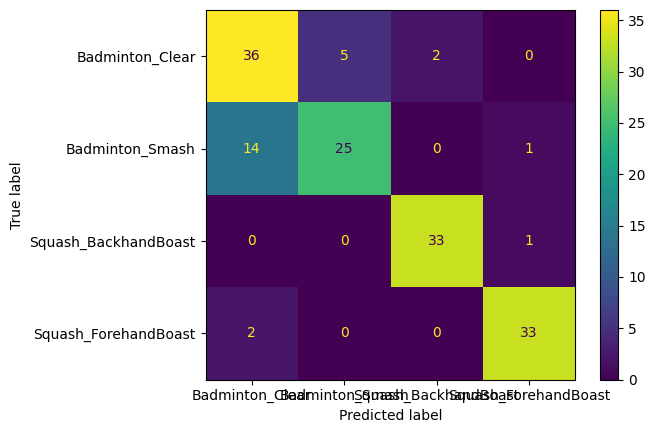

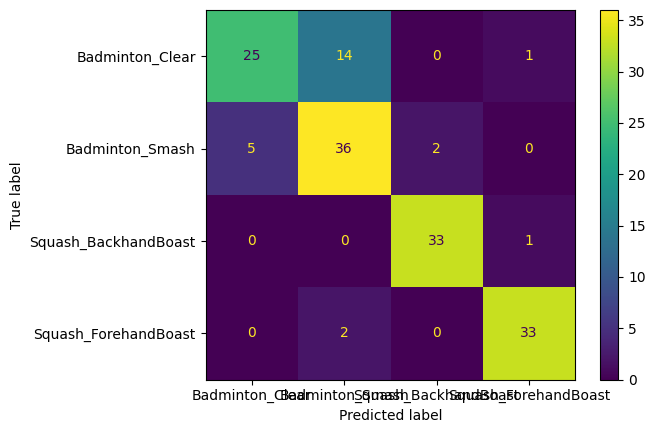

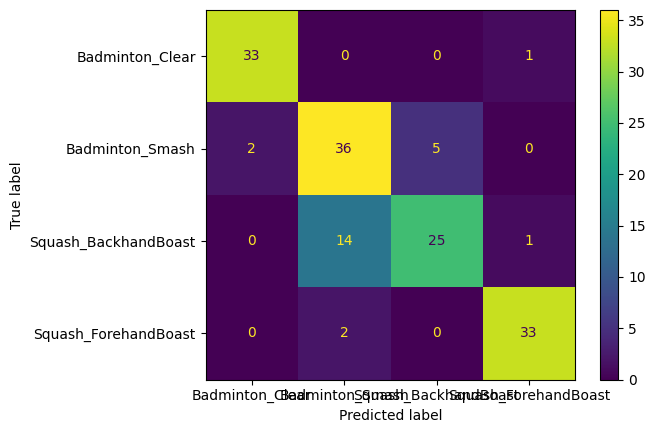

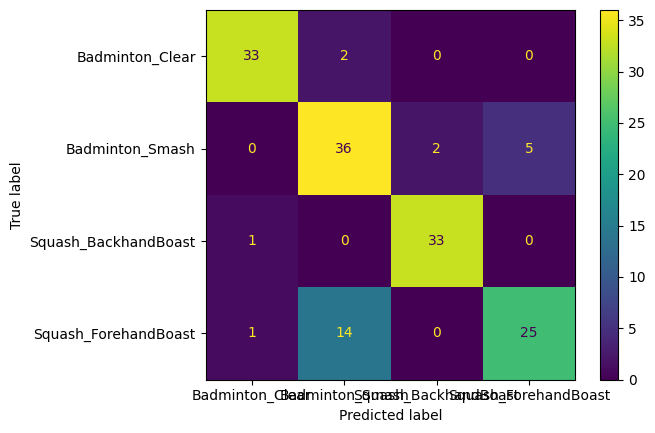

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

grid.fit(X_train_new, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(X_test_new)


classes = ['Badminton_Clear', 'Badminton_Smash', 'Squash_BackhandBoast', 'Squash_ForehandBoast']
for i, class_name in enumerate(classes):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(y_test, y_pred, labels=[class_name, *set(classes)-{class_name}])
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tuned.classes_)
    disp.plot()
    print()
    print()

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create an SVM model object
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the GridSearchCV object
best_svm = grid_search.best_estimator_

print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(X_test_new)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

# Get the classification report for each configuration in the GridSearchCV object
for i, configuration in enumerate(grid_search.cv_results_['params']):
    svm = SVC(**configuration)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_acc = accuracy_score(y_test, y_pred)
    print("Configuration:", configuration)
    print("Accuracy:", svm_acc)
    print(classification_report(y_test, y_pred))

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8355263157894737
                      precision    recall  f1-score   support

     Badminton_Clear       0.69      0.84      0.76        43
     Badminton_Smash       0.83      0.62      0.71        40
Squash_BackhandBoast       0.94      0.97      0.96        34
Squash_ForehandBoast       0.94      0.94      0.94        35

            accuracy                           0.84       152
           macro avg       0.85      0.84      0.84       152
        weighted avg       0.84      0.84      0.83       152

Configuration: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.756578947368421
                      precision    recall  f1-score   support

     Badminton_Clear       0.60      0.72      0.65        43
     Badminton_Smash       0.66      0.53      0.58        40
Squash_BackhandBoast       0.97      0.85      0.91        34
Squash_ForehandBoast       0.89      0.97      0.93        35

            accuracy                 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Configuration: {'C': 1, 'kernel': 'linear'}
Accuracy: 0.756578947368421
                      precision    recall  f1-score   support

     Badminton_Clear       0.60      0.72      0.65        43
     Badminton_Smash       0.66      0.53      0.58        40
Squash_BackhandBoast       0.97      0.85      0.91        34
Squash_ForehandBoast       0.89      0.97      0.93        35

            accuracy                           0.76       152
           macro avg       0.78      0.77      0.77       152
        weighted avg       0.76      0.76      0.76       152

Configuration: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.5723684210526315
                      precision    recall  f1-score   support

     Badminton_Clear       0.42      0.72      0.53        43
     Badminton_Smash       0.74      0.35      0.47        40
Squash_BackhandBoast       0.69      0.71      0.70        34
Squash_ForehandBoast       0.75      0.51      0.61        35

            accuracy                           

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5)

grid.fit(X_train_new, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(X_test_new)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

### Comparison

In [ ]:
print("Logistic Regresion Accuracy = ", logistic_regr_acc)
print("Random Forest Accuracy = ", random_forest_acc)
print("Random Forest Tuned Accuracy = ", random_forest_tuned_acc)
print("Gradient Boosting Trees Accuracy = ", gradient_boosting_acc)
print("Gradient Boosting Trees Tuned Accuracy = ", gradient_boosting_tuned_acc)
print("SVM Accuracy = ", svm_acc)
print("SVM Tuned Accuracy = ", svm_tuned_acc)


Logistic Regresion Accuracy =  0.8355263157894737
Random Forest Accuracy =  0.8092105263157895
Random Forest Tuned Accuracy =  0.8421052631578947
Gradient Boosting Trees Accuracy =  0.8026315789473685
Gradient Boosting Trees Tuned Accuracy =  0.7894736842105263
SVM Accuracy =  0.8355263157894737
SVM Tuned Accuracy =  0.8026315789473685


# MIT-BIH Dataset

In [ ]:
mitbih_train

0         1         2         3         4         5         6    \
0      0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1      0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2      1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3      0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4      0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   
...         ...       ...       ...       ...       ...       ...       ...   
87549  0.807018  0.494737  0.536842  0.529825  0.491228  0.484211  0.456140   
87550  0.718333  0.605000  0.486667  0.361667  0.231667  0.120000  0.051667   
87551  0.906122  0.624490  0.595918  0.575510  0.530612  0.481633  0.444898   
87552  0.858228  0.645570  0.845570  0.248101  0.167089  0.131646  0.121519   
87553  0.901506  0.845886  0.800695  0.748552  0.687138  0.599073  0.512167   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
87549  0.396491  0.284211  0.136842  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87550  0.001667  0.000000  0.013333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87551  0.387755  0.322449  0.191837  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87552  0.121519  0.118987  0.103797  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
87553  0.427578  0.395133  0.402086  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
87549  0.0  0.0  4.0  
87550  0.0  0.0  4.0  
87551  0.0  0.0  4.0  
87552  0.0  0.0  4.0  
87553  0.0  0.0  4.0  

[87554 rows x 188 columns]

In [ ]:
mitbih_test

0         1         2         3         4         5         6    \
0      1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1      0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2      0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3      1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4      0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   
...         ...       ...       ...       ...       ...       ...       ...   
21887  0.928736  0.871264  0.804598  0.742529  0.650575  0.535632  0.394253   
21888  0.802691  0.692078  0.587444  0.446936  0.318386  0.189836  0.118087   
21889  1.000000  0.967359  0.620178  0.347181  0.139466  0.089021  0.103858   
21890  0.984127  0.567460  0.607143  0.583333  0.607143  0.575397  0.575397   
21891  0.973970  0.913232  0.865510  0.823210  0.746204  0.642082  0.547722   

            7         8         9    ...  178  179  180  181  182  183  184  \
0      0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1      0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2      0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
21887  0.250575  0.140230  0.102299  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21888  0.077728  0.112108  0.152466  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21889  0.100890  0.106825  0.100890  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21890  0.488095  0.392857  0.238095  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
21891  0.426247  0.325380  0.279826  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       185  186  187  
0      0.0  0.0  0.0  
1      0.0  0.0  0.0  
2      0.0  0.0  0.0  
3      0.0  0.0  0.0  
4      0.0  0.0  0.0  
...    ...  ...  ...  
21887  0.0  0.0  4.0  
21888  0.0  0.0  4.0  
21889  0.0  0.0  4.0  
21890  0.0  0.0  4.0  
21891  0.0  0.0  4.0  

[21892 rows x 188 columns]

## Dataset setup

In [68]:
X_train = mitbih_train.iloc[:, :-1]
y_train = mitbih_train.iloc[:, -1]

X_test = mitbih_test.iloc[:, :-1]
y_test = mitbih_test.iloc[:, -1]

class_counts = mitbih_train.iloc[:, -1].value_counts()
print(class_counts)
print()
class_counts = mitbih_test.iloc[:, -1].value_counts()
print(class_counts)

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


## Standardization and Feature Selection

In [71]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_std = scaler.transform(X_train)
X_test_data_std = scaler.transform(X_test)

selector = VarianceThreshold(threshold=1)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)


selected_features = selector.get_support()
all_features = np.array(X_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new

Numărul de caracteristici inițiale: 187
Numărul de caracteristici selectate: 60


array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  14,
        16,  18,  20,  21,  22,  23,  24,  26,  27,  29,  30,  31,  33,
        34,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  48,  49,
        51,  54,  55,  56,  57,  58,  63,  65,  66,  67,  69,  70,  71,
        73,  74,  75,  76,  77,  79,  81,  82,  83,  84,  86,  88,  92,
        95,  97,  98,  99, 102, 104, 105, 106, 107, 108, 109, 110, 114,
       115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       130, 131, 133, 134, 135, 136, 137, 139, 140, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 154, 155, 158, 159, 160, 163, 164, 165,
       167, 170, 171, 172, 174, 177, 179, 180, 185, 186])

## SVM

In [ ]:
param_grid = {'C': [1],
              'kernel': [ 'rbf']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(X_test)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.9680248492600037
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.56      0.71       556
         2.0       0.97      0.86      0.91      1448
         3.0       0.75      0.48      0.59       162
         4.0       1.00      0.91      0.95      1608

    accuracy                           0.97     21892
   macro avg       0.93      0.76      0.83     21892
weighted avg       0.97      0.97      0.97     21892



## Gradient Boosted Trees

In [72]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [3],
    'n_estimators': [50]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=3)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Print the classification report and accuracy score
gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_tuned_acc)
print(classification_report(y_test, y_pred))

KeyboardInterrupt: ignored

## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   min_samples_split=rf_cv.best_params_['min_samples_split'],
                                   min_samples_leaf=rf_cv.best_params_['min_samples_leaf'],
                                   random_state=42)
rf_tuned.fit(X_train, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(X_test)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

# print the results
print("Accuracy:", random_forest_tuned_acc)
print("\n-------------Classification Report-------------\n")
print(rf_tuned_report)

## Statistical features extraction Train Set

In [ ]:
features_train = pd.DataFrame()
features_test = pd.DataFrame()

features_train['mean'] = X_train.mean(axis=1)
features_test['mean'] = X_test.mean(axis=1)

features_train['std'] = X_train.std(axis=1)
features_test['std'] = X_test.std(axis=1)

features_train['aad'] = np.mean(np.absolute(X_train - np.mean(X_train)), axis=1)
features_test['aad'] = np.mean(np.absolute(X_test - np.mean(X_test)), axis=1)

features_train['min'] = X_train.min(axis=1)
features_test['min'] = X_test.min(axis=1)

features_train['max'] = X_train.max(axis=1)
features_test['max'] = X_test.max(axis=1)

features_train['maxmin_diff'] = features_train['max'] - features_train['min']
features_test['maxmin_diff'] = features_test['max'] - features_test['min']

features_train['median'] = np.median(X_train, axis=1)
features_test['median'] = np.median(X_test, axis=1)

features_train['mad'] = np.median(np.absolute(X_train - np.median(X_train)), axis=1)
features_test['mad'] = np.median(np.absolute(X_test - np.median(X_test)), axis=1)

features_train['IQR'] =np.percentile(X_train, 75, axis=1) - np.percentile(X_train, 25, axis=1)
features_test['IQR'] = np.percentile(X_test, 75, axis=1) - np.percentile(X_test, 25, axis=1)

features_train['neg_count'] = np.sum(X_train < 0, axis=1)
features_test['neg_count'] = np.sum(X_test < 0, axis=1)

features_train['pos_count'] = np.sum(X_train > 0, axis=1)
features_test['pos_count'] = np.sum(X_test > 0, axis=1)

features_train['above_mean'] = np.sum(X_train > X_train.mean(), axis=1)
features_test['above_mean'] = np.sum(X_test > X_test.mean(), axis=1)

features_train['peak_count'] = np.sum(np.abs(X_train - np.mean(X_train)) > 2*np.std(X_train), axis=1)
features_test['peak_count'] = np.sum(np.abs(X_test - np.mean(X_test)) > 2*np.std(X_test), axis=1)

features_train['skewness'] = pd.DataFrame.skew(X_train, axis=1)
features_test['skewness'] = pd.DataFrame.skew(X_test, axis=1)

features_train['kurtosis'] = pd.DataFrame.kurtosis(X_train, axis=1)
features_test['kurtosis'] = pd.DataFrame.kurtosis(X_test, axis=1)

features_train['energy'] = np.mean(np.square(X_train), axis=1)
features_test['energy'] = np.mean(np.square(X_test), axis=1)

X_train_fft = X_train.apply(lambda x:  np.abs(np.fft.fft(x))[1:188], axis=1)
X_test_fft = X_test.apply(lambda x:  np.abs(np.fft.fft(x))[1:188], axis=1)

features_train['mean_fft'] = X_train_fft.apply(lambda x: x.mean())
features_test['mean_fft'] = X_test_fft.apply(lambda x: x.mean())

features_train['std_fft'] = X_train_fft.apply(lambda x: x.std())
features_test['std_fft'] = X_test_fft.apply(lambda x: x.std())

features_train['aad_fft'] = X_train_fft.apply(lambda x: np.abs(x - x.mean()).mean())
features_test['aad_fft'] = X_test_fft.apply(lambda x: np.abs(x - x.mean()).mean())

features_train['min_fft'] = X_train_fft.apply(lambda x: x.min())
features_test['min_fft'] = X_test_fft.apply(lambda x: x.min())

features_train['max_fft'] = X_train_fft.apply(lambda x: x.max())
features_test['max_fft'] = X_test_fft.apply(lambda x: x.max())

features_train['maxmin_diff_fft'] = features_train['max_fft'] - features_train['min_fft']
features_test['maxmin_diff_fft'] = features_test['max_fft'] - features_test['min_fft']

features_train['median_fft'] = X_train_fft.apply(lambda x: np.median(x))
features_test['median_fft'] = X_test_fft.apply(lambda x: np.median(x))

features_train['mad_fft'] = X_train_fft.apply(lambda x: np.median(np.abs(x - np.median(x))))
features_test['mad_fft'] = X_test_fft.apply(lambda x: np.median(np.abs(x - np.median(x))))

features_train['IQR_fft'] = X_train_fft.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features_test['IQR_fft'] = X_test_fft.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

features_train['neg_count_fft'] = X_train_fft.apply(lambda x: (x < 0).sum())
features_test['neg_count_fft'] = X_test_fft.apply(lambda x: (x < 0).sum())

features_train['pos_count_fft'] =  X_train_fft.apply(lambda x: (x > 0).sum())
features_test['pos_count_fft'] =  X_test_fft.apply(lambda x: (x > 0).sum())

features_train['above_mean_fft'] = X_train_fft.apply(lambda x: (x > x.mean()).sum())
features_test['above_mean_fft'] = X_test_fft.apply(lambda x: (x > x.mean()).sum())

features_train['peak_count_fft'] = X_train_fft.apply(lambda x: len(find_peaks(x)[0]))
features_test['peak_count_fft'] = X_test_fft.apply(lambda x: len(find_peaks(x)[0]))

features_train['skewness_fft'] = X_train_fft.apply(lambda x: skew(x))
features_test['skewness_fft'] = X_test_fft.apply(lambda x: skew(x))

features_train['kurtosis_fft'] = X_train_fft.apply(lambda x: kurtosis(x))
features_test['kurtosis_fft'] = X_test_fft.apply(lambda x: kurtosis(x))

features_train['energy_fft'] = X_train_fft.apply(lambda x: np.sum(np.square(x)))
features_test['energy_fft'] = X_test_fft.apply(lambda x: np.sum(np.square(x)))



features_train


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

mean       std       aad  min  max  maxmin_diff    median  \
0      0.098419  0.176545  0.113774  0.0  1.0          1.0  0.061275   
1      0.090010  0.160151  0.123521  0.0  1.0          1.0  0.054131   
2      0.062104  0.139142  0.128456  0.0  1.0          1.0  0.005405   
3      0.084084  0.161252  0.120857  0.0  1.0          1.0  0.002762   
4      0.116567  0.186651  0.131486  0.0  1.0          1.0  0.056338   
...         ...       ...       ...  ...  ...          ...       ...   
87549  0.158364  0.169925  0.070754  0.0  1.0          1.0  0.154386   
87550  0.325508  0.293708  0.191613  0.0  1.0          1.0  0.465000   
87551  0.316665  0.275855  0.179376  0.0  1.0          1.0  0.436735   
87552  0.101807  0.161769  0.111645  0.0  1.0          1.0  0.081013   
87553  0.346237  0.299571  0.201102  0.0  1.0          1.0  0.419467   

            mad       IQR  neg_count  ...  median_fft   mad_fft   IQR_fft  \
0      0.082969  0.127451          0  ...    0.703730  0.341541  1.340035   
1      0.057328  0.089744          0  ...    0.793195  0.372326  1.557695   
2      0.082969  0.058108          0  ...    0.957636  0.479769  1.491526   
3      0.082969  0.110497          0  ...    0.701249  0.211850  1.054429   
4      0.073580  0.145540          0  ...    0.714580  0.280426  1.057145   
...         ...       ...        ...  ...         ...       ...       ...   
87549  0.082969  0.242105          0  ...    0.796862  0.330609  0.639797   
87550  0.382031  0.507500          0  ...    0.722313  0.366292  0.856541   
87551  0.353765  0.546939          0  ...    0.859230  0.334584  0.770789   
87552  0.065248  0.129114          0  ...    0.751192  0.361119  1.196402   
87553  0.336498  0.575319          0  ...    0.691148  0.281660  0.823518   

       neg_count_fft  pos_count_fft  above_mean_fft  peak_count_fft  \
0                  0            186              54              76   
1                  0            186              56              69   
2                  0            186              68              79   
3                  0            186              54              79   
4                  0            186              46              60   
...              ...            ...             ...             ...   
87549              0            186              36              86   
87550              0            186              40              69   
87551              0            186              42              73   
87552              0            186              56              83   
87553              0            186              34              68   

       skewness_fft  kurtosis_fft   energy_fft  
0          1.921005      3.506938  1084.095930  
1          1.812286      2.970798   892.099804  
2          1.672710      3.230078   673.393846  
3          2.171660      4.528259   904.413708  
4          2.830464      9.786254  1211.757526  
...             ...           ...          ...  
87549      3.966887     18.430684  1004.312963  
87550      6.490528     49.255579  3000.454264  
87551      7.025405     56.632402  2646.771874  
87552      2.031448      3.939394   910.222214  
87553      6.531636     49.914898  3121.436008  

[87554 rows x 32 columns]

## Standardization and Feature Selection

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(features_train)
X_train_data_std = scaler.transform(features_train)
X_test_data_std = scaler.transform(features_test)

selector = VarianceThreshold(threshold=0.5)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)

# print("Numărul de caracteristici inițiale:", X_test_data_std.shape[1])
# print("Numărul de caracteristici selectate:", X_test_new.shape[1])

selected_features = selector.get_support()
all_features = np.array(features_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new

Numărul de caracteristici inițiale: 32
Numărul de caracteristici selectate: 29


array(['neg_count', 'neg_count_fft', 'pos_count_fft'], dtype=object)

In [ ]:
features_test

mean       std       aad  min  max  maxmin_diff    median  \
0      0.080413  0.138679  0.112695  0.0  1.0          1.0  0.053719   
1      0.196353  0.236600  0.104642  0.0  1.0          1.0  0.029304   
2      0.112063  0.137927  0.090324  0.0  1.0          1.0  0.101770   
3      0.161664  0.208151  0.081706  0.0  1.0          1.0  0.122917   
4      0.201629  0.206426  0.093552  0.0  1.0          1.0  0.231544   
...         ...       ...       ...  ...  ...          ...       ...   
21887  0.330364  0.300187  0.191853  0.0  1.0          1.0  0.434483   
21888  0.394955  0.330448  0.251334  0.0  1.0          1.0  0.562033   
21889  0.106412  0.149061  0.102069  0.0  1.0          1.0  0.091988   
21890  0.189882  0.191647  0.074165  0.0  1.0          1.0  0.214286   
21891  0.288120  0.263802  0.144707  0.0  1.0          1.0  0.364425   

            mad       IQR  neg_count  ...  median_fft   mad_fft   IQR_fft  \
0      0.046887  0.102273          0  ...    1.063307  0.636100  1.787322   
1      0.082011  0.340659          0  ...    0.720290  0.258787  1.161406   
2      0.082011  0.185841          0  ...    0.859521  0.434224  0.986435   
3      0.082011  0.275000          0  ...    0.805968  0.281245  0.774966   
4      0.149533  0.338926          0  ...    0.540384  0.225630  0.557330   
...         ...       ...        ...  ...         ...       ...       ...   
21887  0.352472  0.512069          0  ...    0.754811  0.315294  0.917518   
21888  0.480022  0.642003          0  ...    0.838157  0.378990  0.829448   
21889  0.082011  0.148368          0  ...    0.994129  0.514600  1.123260   
21890  0.132275  0.265873          0  ...    1.004210  0.419165  0.831550   
21891  0.282415  0.453362          0  ...    0.729474  0.281712  0.834828   

       neg_count_fft  pos_count_fft  above_mean_fft  peak_count_fft  \
0                  0            186              74              75   
1                  0            186              48              75   
2                  0            186              70              76   
3                  0            186              42              75   
4                  0            186              44              75   
...              ...            ...             ...             ...   
21887              0            186              36              72   
21888              0            186              38              60   
21889              0            186              62              81   
21890              0            186              40              81   
21891              0            186              38              73   

       skewness_fft  kurtosis_fft   energy_fft  
0          1.171007      0.901710   668.919825  
1          5.480297     36.610770  1947.081144  
2          4.873728     30.413217   661.687329  
3          4.146458     22.731909  1506.993460  
4          5.963400     43.475389  1482.124368  
...             ...           ...          ...  
21887      5.682223     39.863321  3134.283400  
21888      6.425306     48.366544  3798.040466  
21889      2.501532      7.477976   772.827716  
21890      3.592082     14.970718  1277.497082  
21891      4.504147     25.857057  2420.538432  

[21892 rows x 32 columns]

## SVM

In [ ]:
param_grid = {'C': [1,],
              'kernel': ['rbf']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

grid.fit(features_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(features_test)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.8433217613740179
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     18118
         1.0       0.00      0.00      0.00       556
         2.0       0.00      0.00      0.00      1448
         3.0       0.00      0.00      0.00       162
         4.0       0.58      0.36      0.44      1608

    accuracy                           0.84     21892
   macro avg       0.29      0.27      0.27     21892
weighted avg       0.75      0.84      0.79     21892



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosted Trees

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(features_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(features_test)

# Print the classification report and accuracy score
gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_tuned_acc)
print(classification_report(y_test, y_pred))

## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(features_train, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   min_samples_split=rf_cv.best_params_['min_samples_split'],
                                   min_samples_leaf=rf_cv.best_params_['min_samples_leaf'],
                                   random_state=42)
rf_tuned.fit(features_train, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(features_test)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

# print the results
print("Accuracy:", random_forest_tuned_acc)
print("\n-------------Classification Report-------------\n")
print(rf_tuned_report)

# PTB Dataset

## Dataset setup

In [ ]:
# ptbdb = ptbdb.sample(frac=1, random_state=42)

X = ptbdb.iloc[:, :-1]  # features (all columns except the last one)
y = ptbdb.iloc[:, -1]   # target (last column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(len(X_train))
train_class_counts = y_train.value_counts()
print("Train set class distribution:")
print(train_class_counts)

print(len(X_test))

test_class_counts = y_test.value_counts()
print("Test set class distribution:")
print(test_class_counts)

11641
Train set class distribution:
1.0    8404
0.0    3237
Name: 187, dtype: int64
2911
Test set class distribution:
1.0    2102
0.0     809
Name: 187, dtype: int64


## Standardization and Feature Selection

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_std = scaler.transform(X_train)
X_test_data_std = scaler.transform(X_test)

selector = VarianceThreshold(threshold=1)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)

# print("Numărul de caracteristici inițiale:", X_test_data_std.shape[1])
# print("Numărul de caracteristici selectate:", X_test_new.shape[1])

selected_features = selector.get_support()
all_features = np.array(X_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new

Numărul de caracteristici inițiale: 187
Numărul de caracteristici selectate: 49


array([  2,   3,   4,   7,   8,   9,  10,  11,  13,  14,  15,  16,  21,
        22,  23,  24,  28,  29,  30,  31,  32,  33,  34,  38,  39,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  52,  54,  55,  56,  57,
        58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  69,  70,  72,
        73,  74,  75,  76,  77,  78,  80,  81,  83,  84,  85,  86,  87,
        89,  90,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 106, 107, 108, 109, 111, 112, 113, 114, 116, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 136,
       138, 139, 140, 141, 142, 145, 147, 148, 149, 150, 151, 152, 153,
       155, 156, 157, 158, 159, 160, 161, 162, 166, 169, 170, 171, 172,
       173, 174, 175, 176, 177, 178, 179, 186])

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_std = scaler.transform(X_train)
X_test_data_std = scaler.transform(X_test)

selector = VarianceThreshold(threshold=0.5)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)

# print("Numărul de caracteristici inițiale:", X_test_data_std.shape[1])
# print("Numărul de caracteristici selectate:", X_test_new.shape[1])

selected_features = selector.get_support()
all_features = np.array(X_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new

Numărul de caracteristici inițiale: 187
Numărul de caracteristici selectate: 187


array([], dtype=int64)

## SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

grid.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(X_test)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

## Gradient Boosted Trees

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_test)

# Print the classification report and accuracy score
gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_tuned_acc)
print(classification_report(y_test, y_pred))

## Random forest

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   min_samples_split=rf_cv.best_params_['min_samples_split'],
                                   min_samples_leaf=rf_cv.best_params_['min_samples_leaf'],
                                   random_state=42)
rf_tuned.fit(X_train, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(X_test)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

# print the results
print("Accuracy:", random_forest_tuned_acc)
print("\n-------------Classification Report-------------\n")
print(rf_tuned_report)

## Statistical features extraction Train Set

In [ ]:
features_train = pd.DataFrame()
features_test = pd.DataFrame()

features_train['mean'] = X_train.mean(axis=1)
features_test['mean'] = X_test.mean(axis=1)

features_train['std'] = X_train.std(axis=1)
features_test['std'] = X_test.std(axis=1)

features_train['aad'] = np.mean(np.absolute(X_train - np.mean(X_train)), axis=1)
features_test['aad'] = np.mean(np.absolute(X_test - np.mean(X_test)), axis=1)

features_train['min'] = X_train.min(axis=1)
features_test['min'] = X_test.min(axis=1)

features_train['max'] = X_train.max(axis=1)
features_test['max'] = X_test.max(axis=1)

features_train['maxmin_diff'] = features_train['max'] - features_train['min']
features_test['maxmin_diff'] = features_test['max'] - features_test['min']

features_train['median'] = np.median(X_train, axis=1)
features_test['median'] = np.median(X_test, axis=1)

features_train['mad'] = np.median(np.absolute(X_train - np.median(X_train)), axis=1)
features_test['mad'] = np.median(np.absolute(X_test - np.median(X_test)), axis=1)

features_train['IQR'] =np.percentile(X_train, 75, axis=1) - np.percentile(X_train, 25, axis=1)
features_test['IQR'] = np.percentile(X_test, 75, axis=1) - np.percentile(X_test, 25, axis=1)

features_train['neg_count'] = np.sum(X_train < 0, axis=1)
features_test['neg_count'] = np.sum(X_test < 0, axis=1)

features_train['pos_count'] = np.sum(X_train > 0, axis=1)
features_test['pos_count'] = np.sum(X_test > 0, axis=1)

features_train['above_mean'] = np.sum(X_train > X_train.mean(), axis=1)
features_test['above_mean'] = np.sum(X_test > X_test.mean(), axis=1)

features_train['peak_count'] = np.sum(np.abs(X_train - np.mean(X_train)) > 2*np.std(X_train), axis=1)
features_test['peak_count'] = np.sum(np.abs(X_test - np.mean(X_test)) > 2*np.std(X_test), axis=1)

features_train['skewness'] = pd.DataFrame.skew(X_train, axis=1)
features_test['skewness'] = pd.DataFrame.skew(X_test, axis=1)

features_train['kurtosis'] = pd.DataFrame.kurtosis(X_train, axis=1)
features_test['kurtosis'] = pd.DataFrame.kurtosis(X_test, axis=1)

features_train['energy'] = np.mean(np.square(X_train), axis=1)
features_test['energy'] = np.mean(np.square(X_test), axis=1)

X_train_fft = X_train.apply(lambda x:  np.abs(np.fft.fft(x))[1:188], axis=1)
X_test_fft = X_test.apply(lambda x:  np.abs(np.fft.fft(x))[1:188], axis=1)

features_train['mean_fft'] = X_train_fft.apply(lambda x: x.mean())
features_test['mean_fft'] = X_test_fft.apply(lambda x: x.mean())

features_train['std_fft'] = X_train_fft.apply(lambda x: x.std())
features_test['std_fft'] = X_test_fft.apply(lambda x: x.std())

features_train['aad_fft'] = X_train_fft.apply(lambda x: np.abs(x - x.mean()).mean())
features_test['aad_fft'] = X_test_fft.apply(lambda x: np.abs(x - x.mean()).mean())

features_train['min_fft'] = X_train_fft.apply(lambda x: x.min())
features_test['min_fft'] = X_test_fft.apply(lambda x: x.min())

features_train['max_fft'] = X_train_fft.apply(lambda x: x.max())
features_test['max_fft'] = X_test_fft.apply(lambda x: x.max())

features_train['maxmin_diff_fft'] = features_train['max_fft'] - features_train['min_fft']
features_test['maxmin_diff_fft'] = features_test['max_fft'] - features_test['min_fft']

features_train['median_fft'] = X_train_fft.apply(lambda x: np.median(x))
features_test['median_fft'] = X_test_fft.apply(lambda x: np.median(x))

features_train['mad_fft'] = X_train_fft.apply(lambda x: np.median(np.abs(x - np.median(x))))
features_test['mad_fft'] = X_test_fft.apply(lambda x: np.median(np.abs(x - np.median(x))))

features_train['IQR_fft'] = X_train_fft.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
features_test['IQR_fft'] = X_test_fft.apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

features_train['neg_count_fft'] = X_train_fft.apply(lambda x: (x < 0).sum())
features_test['neg_count_fft'] = X_test_fft.apply(lambda x: (x < 0).sum())

features_train['pos_count_fft'] =  X_train_fft.apply(lambda x: (x > 0).sum())
features_test['pos_count_fft'] =  X_test_fft.apply(lambda x: (x > 0).sum())

features_train['above_mean_fft'] = X_train_fft.apply(lambda x: (x > x.mean()).sum())
features_test['above_mean_fft'] = X_test_fft.apply(lambda x: (x > x.mean()).sum())

features_train['peak_count_fft'] = X_train_fft.apply(lambda x: len(find_peaks(x)[0]))
features_test['peak_count_fft'] = X_test_fft.apply(lambda x: len(find_peaks(x)[0]))

features_train['skewness_fft'] = X_train_fft.apply(lambda x: skew(x))
features_test['skewness_fft'] = X_test_fft.apply(lambda x: skew(x))

features_train['kurtosis_fft'] = X_train_fft.apply(lambda x: kurtosis(x))
features_test['kurtosis_fft'] = X_test_fft.apply(lambda x: kurtosis(x))

features_train['energy_fft'] = X_train_fft.apply(lambda x: np.sum(np.square(x)))
features_test['energy_fft'] = X_test_fft.apply(lambda x: np.sum(np.square(x)))



features_train

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/

mean       std       aad  min  max  maxmin_diff    median       mad  \
6363  0.140885  0.153858  0.072430  0.0  1.0          1.0  0.147445  0.084159   
1305  0.224678  0.143817  0.085105  0.0  1.0          1.0  0.215213  0.111222   
3311  0.334041  0.359033  0.240777  0.0  1.0          1.0  0.000000  0.103992   
5768  0.085697  0.136029  0.123465  0.0  1.0          1.0  0.067873  0.045168   
8523  0.166121  0.261148  0.152405  0.0  1.0          1.0  0.000000  0.103992   
...        ...       ...       ...  ...  ...          ...       ...       ...   
5237  0.116040  0.140358  0.080472  0.0  1.0          1.0  0.131844  0.085953   
5504  0.190970  0.168739  0.061045  0.0  1.0          1.0  0.243488  0.139496   
1441  0.282308  0.210251  0.120599  0.0  1.0          1.0  0.313266  0.209275   
9470  0.084454  0.177347  0.129003  0.0  1.0          1.0  0.000000  0.103992   
8679  0.059737  0.142563  0.140364  0.0  1.0          1.0  0.031549  0.075948   

           IQR  neg_count  ...  median_fft   mad_fft   IQR_fft  neg_count_fft  \
6363  0.185889          0  ...    0.957625  0.547750  1.632253              0   
1305  0.041002          0  ...    0.830371  0.366366  1.191867              0   
3311  0.715867          0  ...    1.096760  0.512710  1.221006              0   
5768  0.073756          0  ...    1.070316  0.451135  1.182108              0   
8523  0.424510          0  ...    0.773898  0.435776  1.362112              0   
...        ...        ...  ...         ...       ...       ...            ...   
5237  0.155028          0  ...    0.925359  0.555251  1.384395              0   
5504  0.280968          0  ...    1.098740  0.295877  0.592752              0   
1441  0.361204          0  ...    0.844367  0.409274  1.550753              0   
9470  0.119266          0  ...    0.721577  0.261091  0.934478              0   
8679  0.059433          0  ...    0.922976  0.482655  1.495051              0   

      pos_count_fft  above_mean_fft  peak_count_fft  skewness_fft  \
6363            186              58              68      1.622859   
1305            186              56              48      1.732321   
3311            186              42              81      7.950430   
5768            186              58              60      1.758290   
8523            186              52              55      5.531648   
...             ...             ...             ...           ...   
5237            186              66              82      2.238247   
5504            186              44              81      5.420662   
1441            186              56              59      4.365244   
9470            186              46              46      3.230915   
8679            186              62              83      1.388762   

      kurtosis_fft   energy_fft  
6363      2.202305   823.366787  
1305      2.988564   719.404849  
3311     67.579244  4483.567279  
5768      2.731598   643.606159  
8523     36.828491  2372.070562  
...            ...          ...  
5237      7.114357   685.222647  
5504     35.296493   990.346227  
1441     22.556732  1537.560449  
9470     12.769107  1093.960077  
8679      1.020223   706.914617  

[11641 rows x 32 columns]

## Standardization and Feature Selection

In [ ]:
# standardization
scaler = StandardScaler()
scaler.fit(features_train)
X_train_data_std = scaler.transform(features_train)
X_test_data_std = scaler.transform(features_test)

selector = VarianceThreshold(threshold=0.5)

X_train_new = selector.fit_transform(X_train_data_std)

print("Numărul de caracteristici inițiale:", X_train_data_std.shape[1])
print("Numărul de caracteristici selectate:", X_train_new.shape[1])

X_test_new = selector.transform(X_test_data_std)

# print("Numărul de caracteristici inițiale:", X_test_data_std.shape[1])
# print("Numărul de caracteristici selectate:", X_test_new.shape[1])

selected_features = selector.get_support()
all_features = np.array(features_train.columns)
discarded_features = all_features[~selected_features]

discarded_features
# X_train_new

Numărul de caracteristici inițiale: 32
Numărul de caracteristici selectate: 26


array(['min', 'max', 'maxmin_diff', 'neg_count', 'neg_count_fft',
       'pos_count_fft'], dtype=object)

## SVM

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a GridSearchCV object
grid = GridSearchCV(estimator=svm.SVC(), param_grid=param_grid, cv=5)

grid.fit(features_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid.best_params_)

# Use the best hyperparameters to make predictions on the test data
y_pred = grid.predict(features_test)

# Calculate the accuracy and print the classification report
svm_tuned_acc = accuracy_score(y_test, y_pred)
print("Accuracy:", svm_tuned_acc)
print(classification_report(y_test, y_pred))

## Gradient Boosted Trees

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)

grid_search.fit(features_train, y_train)

# Print the best parameters and score
print('Best Parameters:', grid_search.best_params_)

# Make predictions on the test data using the best model
best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(features_test)

# Print the classification report and accuracy score
gradient_boosting_tuned_acc = accuracy_score(y_test, y_pred)
print('Accuracy:', gradient_boosting_tuned_acc)
print(classification_report(y_test, y_pred))

## Random Forest

In [ ]:
param_grid = {
    'n_estimators': [80, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_samples': [0.3, 0.5, 0.8]
}


rf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(features_train, y_train)
print("Best hyperparameters:", rf_cv.best_params_)

rf_tuned = RandomForestClassifier(n_estimators=rf_cv.best_params_['n_estimators'],
                                  max_samples=rf_cv.best_params_['max_samples'],
                                   max_depth=rf_cv.best_params_['max_depth'],
                                   min_samples_split=rf_cv.best_params_['min_samples_split'],
                                   min_samples_leaf=rf_cv.best_params_['min_samples_leaf'],
                                   random_state=42)
rf_tuned.fit(features_train, y_train)

# make predictions on the test set and calculate accuracy and classification report
y_pred = rf_tuned.predict(features_test)
random_forest_tuned_acc = accuracy_score(y_test, y_pred)
rf_tuned_report = classification_report(y_test, y_pred)

# print the results
print("Accuracy:", random_forest_tuned_acc)
print("\n-------------Classification Report-------------\n")
print(rf_tuned_report)

# 3.3 Utilizarea modelelor de Rețele Neurale

# MIT-BIH

In [48]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn

# Definirea mediului pe care va rula codul de antrenare
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f'Running code @ {device}')



Running code @ cpu


In [49]:
mitbih_train = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/mitbih_train.csv', header=None)
mitbih_test = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/mitbih_test.csv', header=None)

train_features = mitbih_train.iloc[:, :-1]
train_labels = mitbih_train.iloc[:, -1]

test_features = mitbih_test.iloc[:, :-1]
test_labels = mitbih_test.iloc[:, -1]

train_features_tensor = torch.Tensor(train_features.values).unsqueeze(1)
train_labels_tensor = torch.Tensor(train_labels.values).long()

test_features_tensor = torch.Tensor(test_features.values).unsqueeze(1)
test_labels_tensor = torch.Tensor(test_labels.values).long()

In [4]:
BATCH_SIZE_TRAIN = 64  #@param
BATCH_SIZE_TEST = 64  #@param
NO_WORKERS = 2  #@param
SHUFFLE_DATA = True

In [50]:
train_dataset = torch.utils.data.TensorDataset(train_features_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=SHUFFLE_DATA, num_workers=NO_WORKERS)

test_dataset = torch.utils.data.TensorDataset(test_features_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=SHUFFLE_DATA, num_workers=NO_WORKERS)

(batch_train_features, batch_train_labels) = next(iter(train_loader))

print(f'Shape of training features: {batch_train_features.size()}')
print(f'Shape of training labels: {batch_train_labels.size()}')

Shape of training features: torch.Size([64, 1, 187])
Shape of training labels: torch.Size([64])


## Multi-layered Perceptron(MLP)

In [6]:
class MLP(nn.Module):
    def __init__(self, n_features, num_classes=5, hidden_sizes=[256, 256]):
        super(MLP, self).__init__()
        self.n_features = n_features
        self.hidden_sizes = hidden_sizes
        self.num_layers = len(hidden_sizes)
        
        self.layers = nn.ModuleList([nn.Linear(n_features, hidden_sizes[0])])
        for i in range(self.num_layers - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
        self.fc_out = nn.Linear(hidden_sizes[-1], num_classes)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = x.view(-1, self.n_features)  # Flatten the input
        for layer in self.layers:
            x = self.relu(layer(x))
        x = self.fc_out(x)
        return x

In [ ]:
REFRESH_EVERY = 1000

def plot_losses(loss_list, steps, ct):
    if ct % REFRESH_EVERY == 0:
        display.clear_output(wait=True)
    
    display.display(plt.gcf())
    plt.plot(steps, loss_list, c='b')
    time.sleep(1.0)

In [ ]:
def top_k_accuracy(k, target, output):
    batch_size = target.size(0)
    
    _, pred = output.topk(k, 1, True, True)
    
    pred = pred.t()
    correct = pred.eq(target.to(device).view(1, -1).expand_as(pred))

    correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
    correct_k.mul_(100.0 / batch_size)
    
    return correct_k

Epoch [1/10], Validation Accuracy: 0.9506
Epoch [2/10], Validation Accuracy: 0.9604
Epoch [3/10], Validation Accuracy: 0.9593
Epoch [4/10], Validation Accuracy: 0.9692
Epoch [5/10], Validation Accuracy: 0.9734
Epoch [6/10], Validation Accuracy: 0.9743
Epoch [7/10], Validation Accuracy: 0.9743
Epoch [8/10], Validation Accuracy: 0.9694
Epoch [9/10], Validation Accuracy: 0.9742
Epoch [10/10], Validation Accuracy: 0.9722


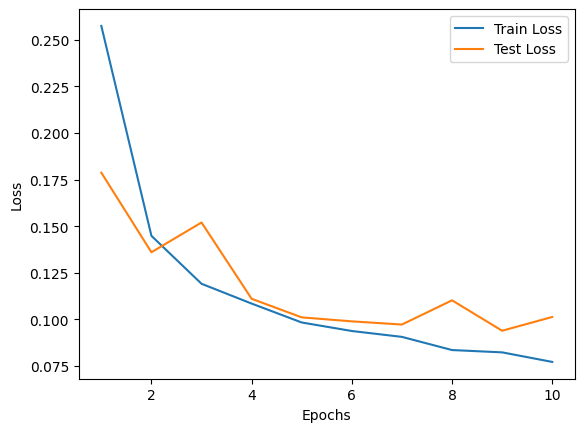

Confusion Matrix for 0:
[[18035    11    32     9    31]
 [  246   296    11     1     2]
 [  135     1  1279    26     7]
 [   44     0    12   106     0]
 [   36     0     4     0  1568]]


Confusion Matrix for 1:
[[  296   246    11     1     2]
 [   11 18035    32     9    31]
 [    1   135  1279    26     7]
 [    0    44    12   106     0]
 [    0    36     4     0  1568]]


Confusion Matrix for 2:
[[ 1279   135     1    26     7]
 [   32 18035    11     9    31]
 [   11   246   296     1     2]
 [   12    44     0   106     0]
 [    4    36     0     0  1568]]


Confusion Matrix for 3:
[[  106    44     0    12     0]
 [    9 18035    11    32    31]
 [    1   246   296    11     2]
 [   26   135     1  1279     7]
 [    0    36     0     4  1568]]


Confusion Matrix for 4:
[[ 1568    36     0     4     0]
 [   31 18035    11    32     9]
 [    2   246   296    11     1]
 [    7   135     1  1279    26]
 [    0    44     0    12   106]]


              precision    recall  f1-sc

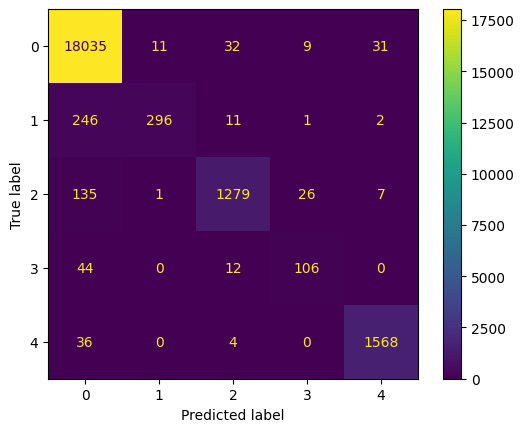

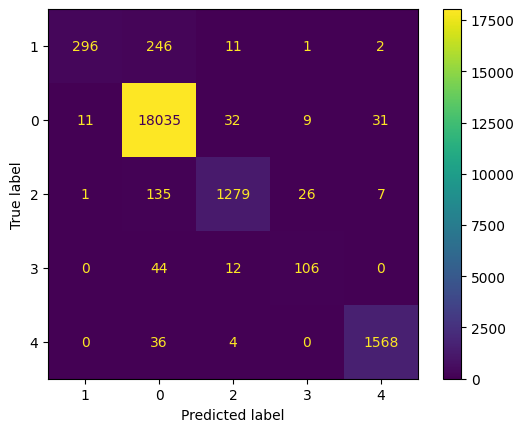

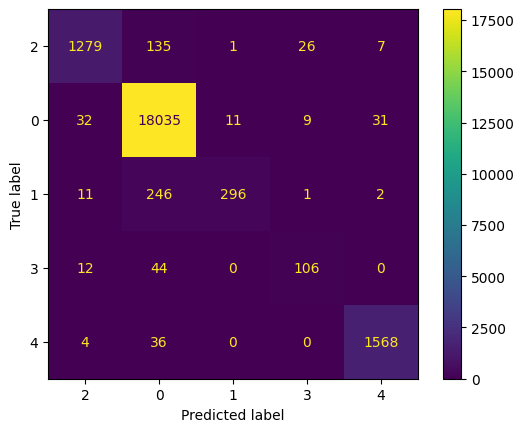

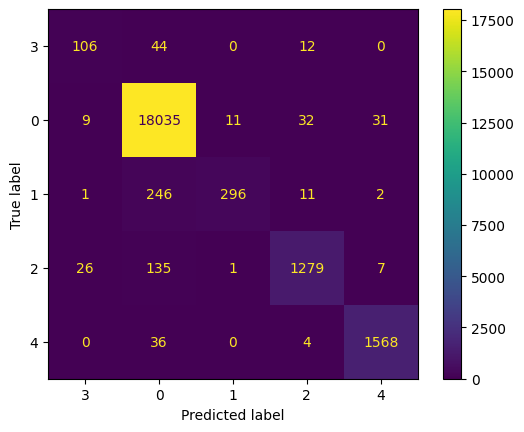

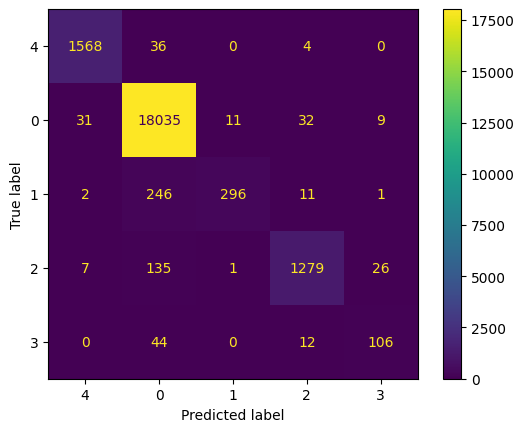

In [8]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [256, 256]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

Epoch [1/10], Validation Accuracy: 0.9588
Epoch [2/10], Validation Accuracy: 0.9597
Epoch [3/10], Validation Accuracy: 0.9652
Epoch [4/10], Validation Accuracy: 0.9705
Epoch [5/10], Validation Accuracy: 0.9725
Epoch [6/10], Validation Accuracy: 0.9723
Epoch [7/10], Validation Accuracy: 0.9725
Epoch [8/10], Validation Accuracy: 0.9753
Epoch [9/10], Validation Accuracy: 0.9749
Epoch [10/10], Validation Accuracy: 0.9770


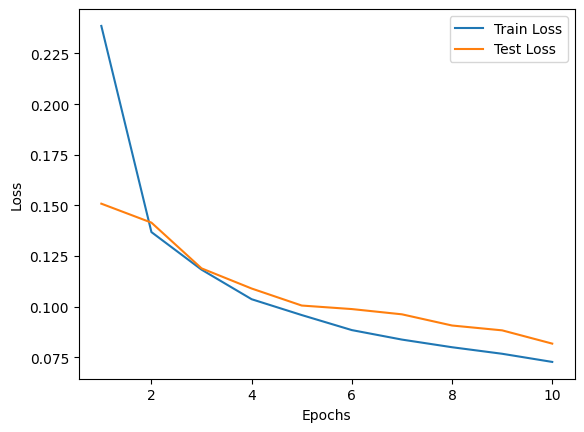

Confusion Matrix for 0:
[[18009    31    57     6    15]
 [  187   357     9     0     3]
 [   74     5  1346    15     8]
 [   40     0    19   103     0]
 [   26     0     8     0  1574]]


Confusion Matrix for 1:
[[  357   187     9     0     3]
 [   31 18009    57     6    15]
 [    5    74  1346    15     8]
 [    0    40    19   103     0]
 [    0    26     8     0  1574]]


Confusion Matrix for 2:
[[ 1346    74     5    15     8]
 [   57 18009    31     6    15]
 [    9   187   357     0     3]
 [   19    40     0   103     0]
 [    8    26     0     0  1574]]


Confusion Matrix for 3:
[[  103    40     0    19     0]
 [    6 18009    31    57    15]
 [    0   187   357     9     3]
 [   15    74     5  1346     8]
 [    0    26     0     8  1574]]


Confusion Matrix for 4:
[[ 1574    26     0     8     0]
 [   15 18009    31    57     6]
 [    3   187   357     9     0]
 [    8    74     5  1346    15]
 [    0    40     0    19   103]]


              precision    recall  f1-sc

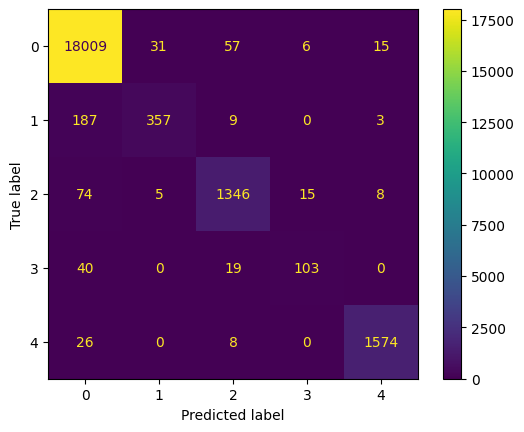

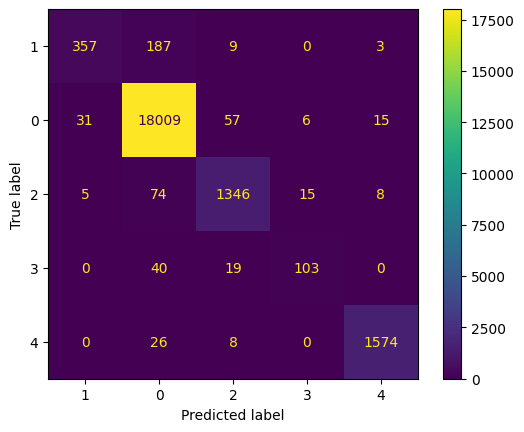

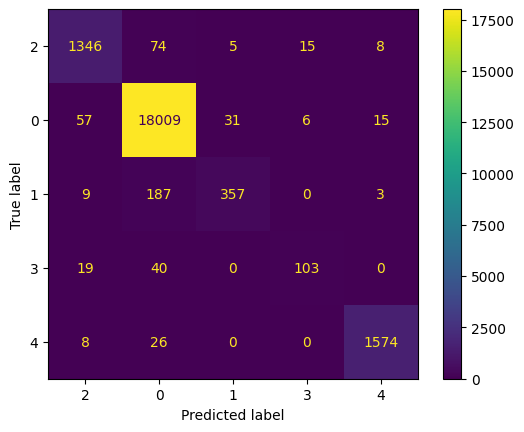

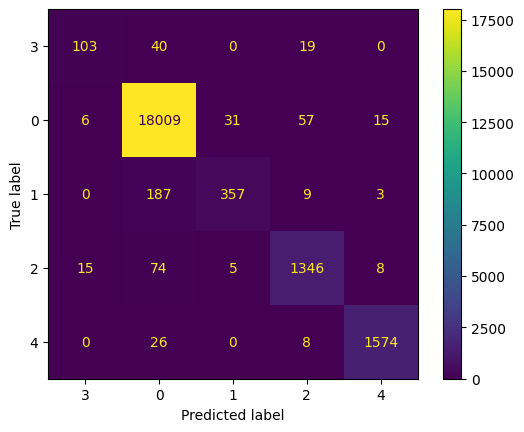

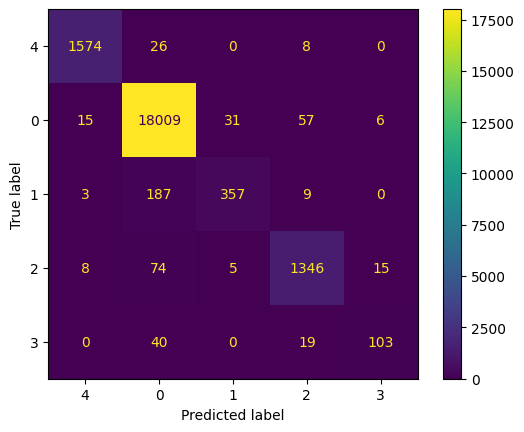

In [10]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [256, 512]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

Epoch [1/10], Validation Accuracy: 0.9341
Epoch [2/10], Validation Accuracy: 0.9486
Epoch [3/10], Validation Accuracy: 0.9482
Epoch [4/10], Validation Accuracy: 0.9588
Epoch [5/10], Validation Accuracy: 0.9625
Epoch [6/10], Validation Accuracy: 0.9645
Epoch [7/10], Validation Accuracy: 0.9648
Epoch [8/10], Validation Accuracy: 0.9670
Epoch [9/10], Validation Accuracy: 0.9637
Epoch [10/10], Validation Accuracy: 0.9642


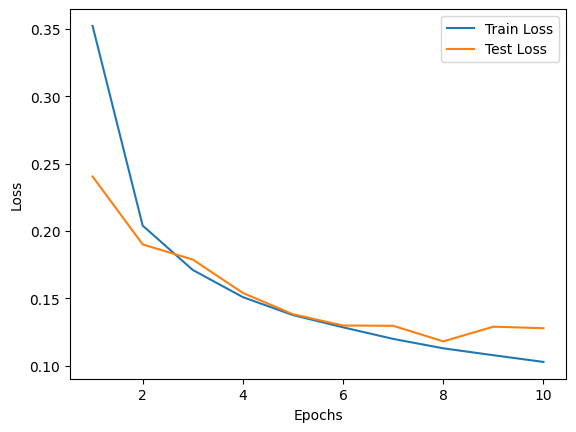

Confusion Matrix for 0:
[[17831    19   186    10    72]
 [  209   306    36     0     5]
 [   86     2  1321    21    18]
 [   45     0    19    98     0]
 [   49     0     7     0  1552]]


Confusion Matrix for 1:
[[  306   209    36     0     5]
 [   19 17831   186    10    72]
 [    2    86  1321    21    18]
 [    0    45    19    98     0]
 [    0    49     7     0  1552]]


Confusion Matrix for 2:
[[ 1321    86     2    21    18]
 [  186 17831    19    10    72]
 [   36   209   306     0     5]
 [   19    45     0    98     0]
 [    7    49     0     0  1552]]


Confusion Matrix for 3:
[[   98    45     0    19     0]
 [   10 17831    19   186    72]
 [    0   209   306    36     5]
 [   21    86     2  1321    18]
 [    0    49     0     7  1552]]


Confusion Matrix for 4:
[[ 1552    49     0     7     0]
 [   72 17831    19   186    10]
 [    5   209   306    36     0]
 [   18    86     2  1321    21]
 [    0    45     0    19    98]]


              precision    recall  f1-sc

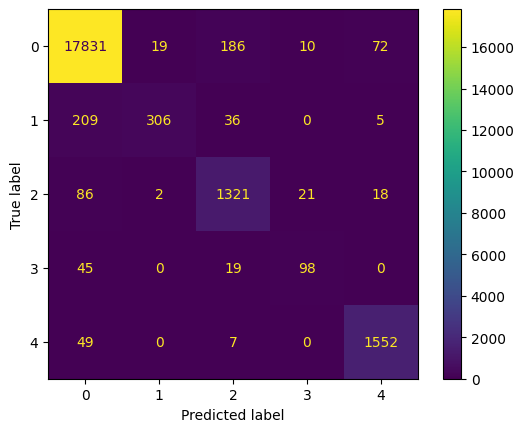

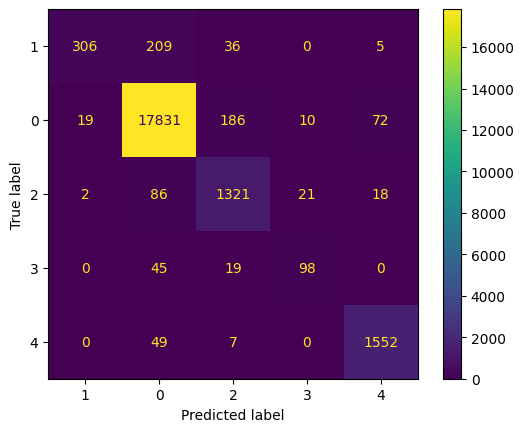

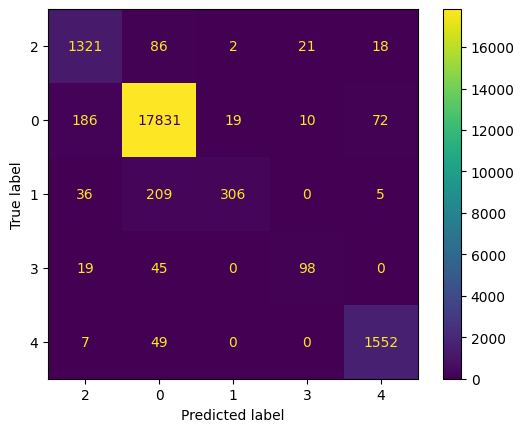

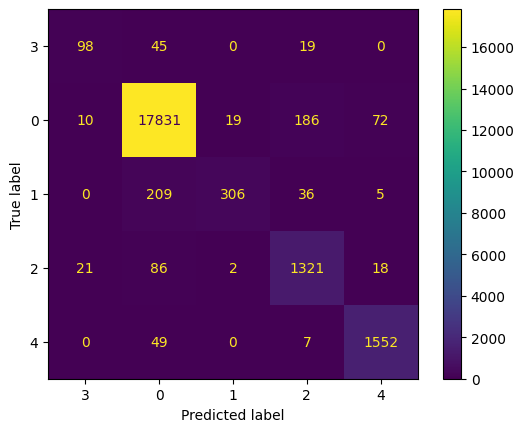

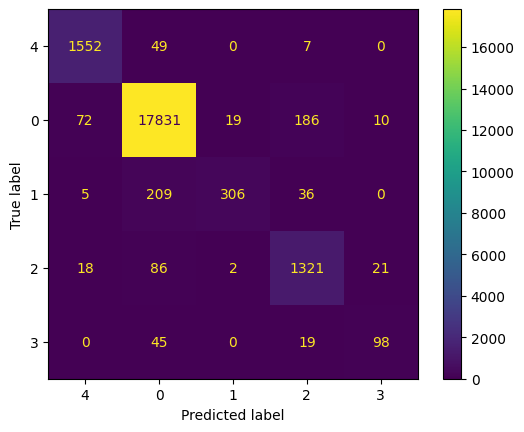

In [11]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [64, 64]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

Epoch [1/10], Validation Accuracy: 0.9244
Epoch [2/10], Validation Accuracy: 0.9484
Epoch [3/10], Validation Accuracy: 0.9539
Epoch [4/10], Validation Accuracy: 0.9577
Epoch [5/10], Validation Accuracy: 0.9585
Epoch [6/10], Validation Accuracy: 0.9587
Epoch [7/10], Validation Accuracy: 0.9604
Epoch [8/10], Validation Accuracy: 0.9649
Epoch [9/10], Validation Accuracy: 0.9660
Epoch [10/10], Validation Accuracy: 0.9607


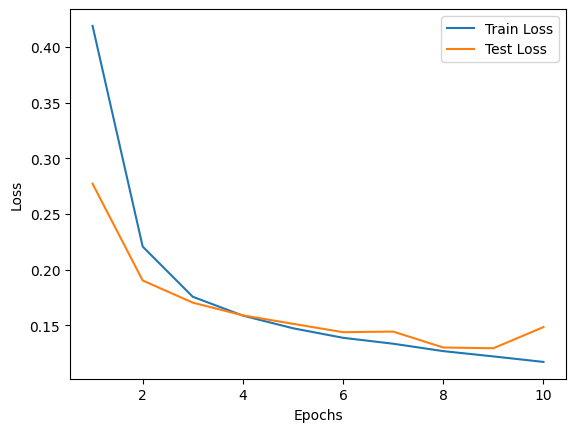

Confusion Matrix for 0:
[[17974    98    46     0     0]
 [  209   338     8     1     0]
 [  165     7  1269     6     1]
 [   66     0    30    66     0]
 [  187     1    35     0  1385]]


Confusion Matrix for 1:
[[  338   209     8     1     0]
 [   98 17974    46     0     0]
 [    7   165  1269     6     1]
 [    0    66    30    66     0]
 [    1   187    35     0  1385]]


Confusion Matrix for 2:
[[ 1269   165     7     6     1]
 [   46 17974    98     0     0]
 [    8   209   338     1     0]
 [   30    66     0    66     0]
 [   35   187     1     0  1385]]


Confusion Matrix for 3:
[[   66    66     0    30     0]
 [    0 17974    98    46     0]
 [    1   209   338     8     0]
 [    6   165     7  1269     1]
 [    0   187     1    35  1385]]


Confusion Matrix for 4:
[[ 1385   187     1    35     0]
 [    0 17974    98    46     0]
 [    0   209   338     8     1]
 [    1   165     7  1269     6]
 [    0    66     0    30    66]]


              precision    recall  f1-sc

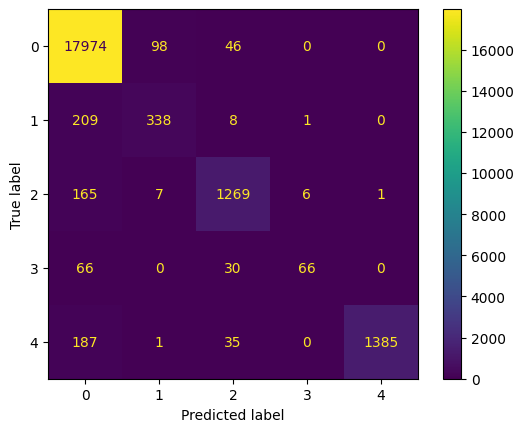

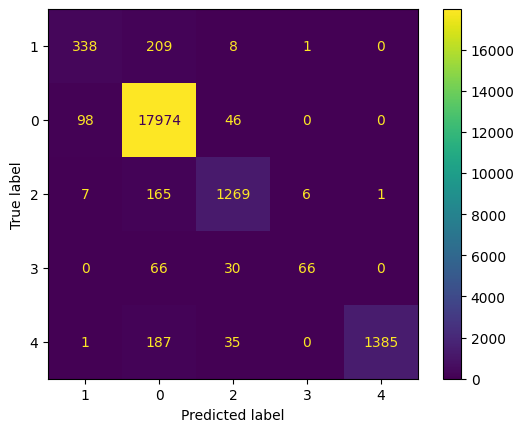

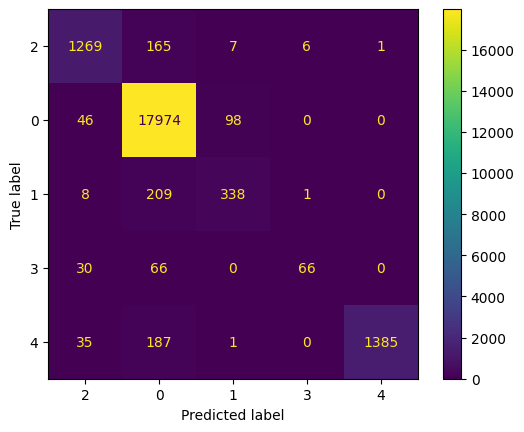

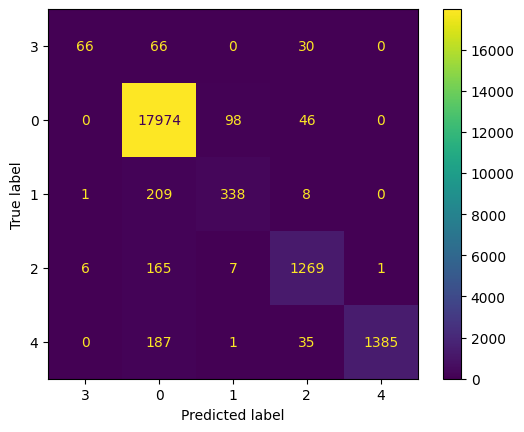

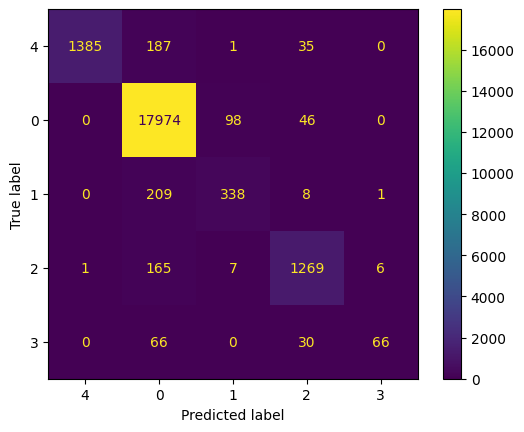

In [12]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [32, 32, 32]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

Epoch [1/10], Validation Accuracy: 0.9402
Epoch [2/10], Validation Accuracy: 0.9555
Epoch [3/10], Validation Accuracy: 0.9619
Epoch [4/10], Validation Accuracy: 0.9647
Epoch [5/10], Validation Accuracy: 0.9685
Epoch [6/10], Validation Accuracy: 0.9672
Epoch [7/10], Validation Accuracy: 0.9700
Epoch [8/10], Validation Accuracy: 0.9705
Epoch [9/10], Validation Accuracy: 0.9713
Epoch [10/10], Validation Accuracy: 0.9719


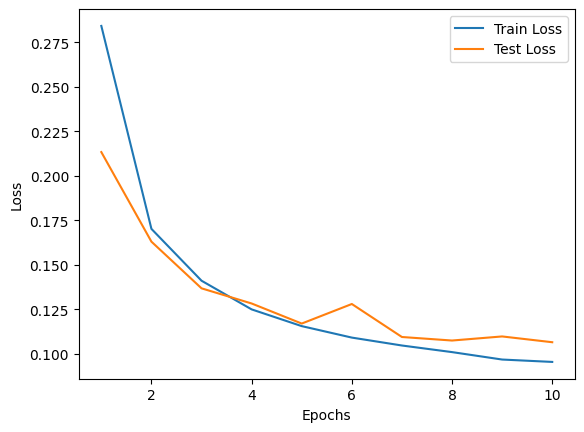

Confusion Matrix for 0:
[[18014    30    43     6    25]
 [  219   324     8     0     5]
 [  123     6  1295    21     3]
 [   50     0    15    97     0]
 [   51     3     8     0  1546]]


Confusion Matrix for 1:
[[  324   219     8     0     5]
 [   30 18014    43     6    25]
 [    6   123  1295    21     3]
 [    0    50    15    97     0]
 [    3    51     8     0  1546]]


Confusion Matrix for 2:
[[ 1295   123     6    21     3]
 [   43 18014    30     6    25]
 [    8   219   324     0     5]
 [   15    50     0    97     0]
 [    8    51     3     0  1546]]


Confusion Matrix for 3:
[[   97    50     0    15     0]
 [    6 18014    30    43    25]
 [    0   219   324     8     5]
 [   21   123     6  1295     3]
 [    0    51     3     8  1546]]


Confusion Matrix for 4:
[[ 1546    51     3     8     0]
 [   25 18014    30    43     6]
 [    5   219   324     8     0]
 [    3   123     6  1295    21]
 [    0    50     0    15    97]]


              precision    recall  f1-sc

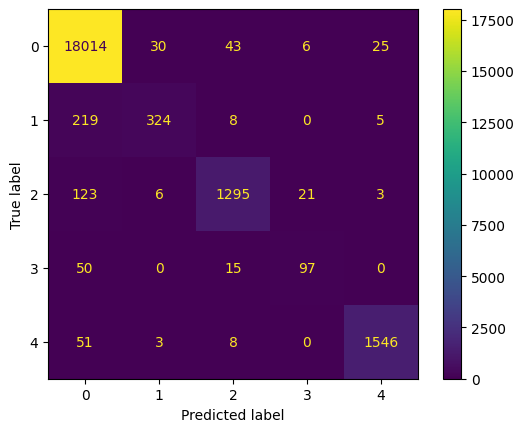

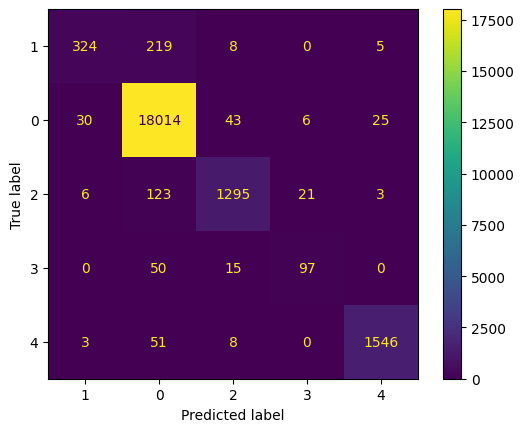

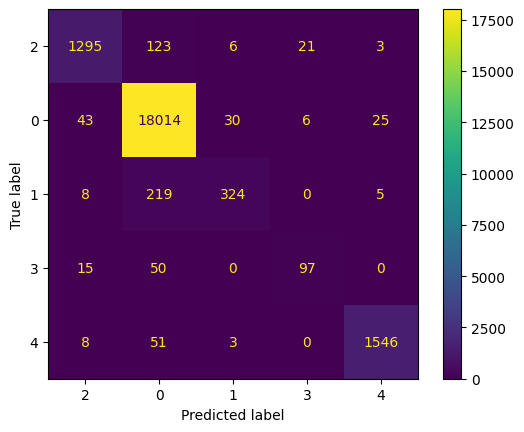

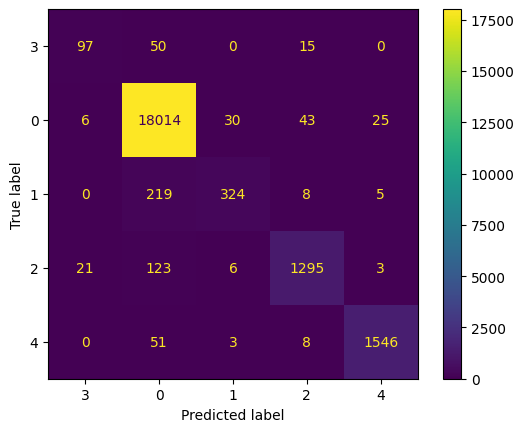

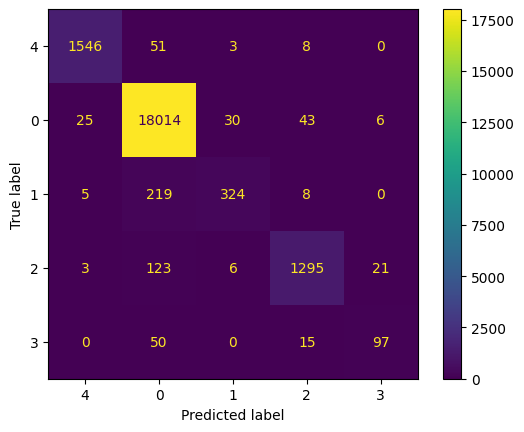

In [14]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [512]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

Epoch [1/10], Validation Accuracy: 0.8584
Epoch [2/10], Validation Accuracy: 0.8675
Epoch [3/10], Validation Accuracy: 0.8697
Epoch [4/10], Validation Accuracy: 0.8321
Epoch [5/10], Validation Accuracy: 0.8276
Epoch [6/10], Validation Accuracy: 0.8276
Epoch [7/10], Validation Accuracy: 0.8276
Epoch [8/10], Validation Accuracy: 0.8276
Epoch [9/10], Validation Accuracy: 0.8276
Epoch [10/10], Validation Accuracy: 0.8276


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      0.99      0.92    181180
           1       0.00      0.00      0.00      5560
           2       0.25      0.05      0.08     14480
           3       0.00      0.00      0.00      1620
           4       0.65      0.19      0.30     16080

    accuracy                           0.84    218920
   macro avg       0.35      0.25      0.26    218920
weighted avg       0.77      0.84      0.79    218920



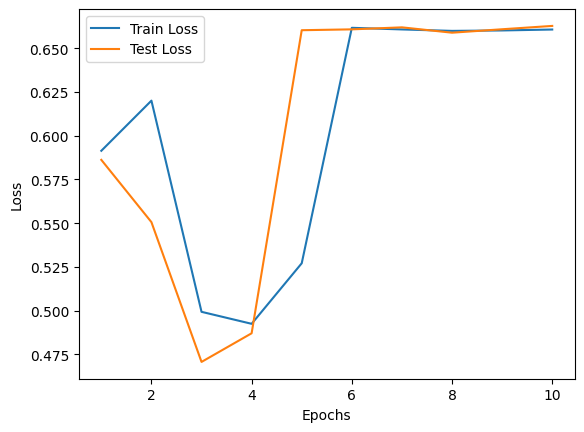

In [ ]:
num_epochs = 10
lr_factor = 0.1             # learning rate decay factor
hidden_sizes = [256, 256]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=5, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

all_predictions = []
all_labels = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)
            all_predictions.extend(predicted.tolist())
            all_labels.extend(labels.tolist())

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)
report = classification_report(all_labels, all_predictions)
print(report)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Arhitectură de tip convoluțională

In [ ]:
class InceptionTime(nn.Module):
    def __init__(self, in_channels, kernel_sizes):
        super(InceptionTime, self).__init__()

        self.kernel_sizes = kernel_sizes

        self.conv1x1 = nn.Conv1d(in_channels, 32, kernel_size=1)
        self.conv3x3 = nn.Conv1d(in_channels, 32, kernel_size=3, padding=1)
        self.conv5x5 = nn.Conv1d(in_channels, 32, kernel_size=5, padding=1)
        self.conv_avg = nn.ModuleList([nn.Conv1d(in_channels, 32, kernel_size=k, padding=(k // 2)) for k in kernel_sizes])

        self.global_avg_pool = nn.AdaptiveAvgPool1d(1)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Conv 1x1 branch
        branch_1x1 = self.conv1x1(x)
        # print('branch_1x1:', branch_1x1.shape)


        # Conv 3x3 branch
        branch_3x3 = self.conv3x3(x)
        # print('branch_3x3:', branch_3x3.shape)



        # Conv 5x5 branch
        branch_5x5 = self.conv5x5(x)
        # print('branch_5x5:', branch_5x5.shape)

        # Conv avg branch
        branch_avg = [conv(x) for conv in self.conv_avg]
        # for i, b in enumerate(branch_avg):
          # print(f'branch_avg[{i}]:', b.shape)

        # Concatenate branch outputs along the channel dimension
        output = torch.cat([branch_1x1, branch_3x3, branch_5x5] + branch_avg, dim=1)
        # print('output:', output.shape)

        # Apply global average pooling
        output = self.global_avg_pool(output).squeeze(2)

        # Apply ReLU activation
        output = self.relu(output)

        return output

In [ ]:
num_epochs = 10

model = InceptionTime(in_channels=1, kernel_sizes=[])

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        ct += 1
        running_loss += loss.item()

    train_loss = running_loss / ct
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RuntimeError: ignored

In [ ]:
import torch.nn.functional as F

class InceptionModule(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(InceptionModule, self).__init__()
        
        self.bottleneck = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        self.conv1 = nn.Conv1d(out_channels, out_channels, kernel_size=10, padding=5)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=20, padding=10)
        self.conv3 = nn.Conv1d(out_channels, out_channels, kernel_size=40, padding=20)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=1, padding=1)
        
    def forward(self, x):
        bottleneck_output = self.bottleneck(x)
        conv1_output = self.conv1(bottleneck_output)
        conv2_output = self.conv2(bottleneck_output)
        conv3_output = self.conv3(bottleneck_output)
        maxpool_output = self.maxpool(x)

        # Apply padding to match the size of the other outputs
        maxpool_output = F.pad(maxpool_output, (5, 5))

        output = torch.cat([conv1_output, conv2_output, conv3_output, maxpool_output], dim=1)
        return output


class InceptionTimeV2(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(InceptionTimeV2, self).__init__()
        
        self.conv1 = nn.Conv1d(in_channels, 32, kernel_size=39, stride=1, padding=0)
        self.inception = InceptionModule(32, 32)
        self.fc = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.inception(x)
        x = torch.mean(x, dim=2)
        x = self.fc(x)
        return x

In [ ]:
num_epochs = 10

model = InceptionTimeV2(in_channels=1, num_classes=5)

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        ct += 1
        running_loss += loss.item()

    train_loss = running_loss / ct
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

RuntimeError: ignored

In [60]:
class ConvNet(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ConvNet, self).__init__()
        
        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        # )

        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 32, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        # )

        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 64, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        # )
        
        self.conv_layers = nn.Sequential(
          nn.Conv1d(input_channels, 32, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.Conv1d(32, 64, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool1d(kernel_size=2, stride=2)
      )
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        
        self.fc_layers = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, num_classes)
      )


    def forward(self, x):
        x = self.conv_layers(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

Epoch [1/10], Validation Accuracy: 0.8907
Epoch [2/10], Validation Accuracy: 0.9232
Epoch [3/10], Validation Accuracy: 0.9289
Epoch [4/10], Validation Accuracy: 0.9415
Epoch [5/10], Validation Accuracy: 0.9410
Epoch [6/10], Validation Accuracy: 0.9540
Epoch [7/10], Validation Accuracy: 0.9570
Epoch [8/10], Validation Accuracy: 0.9582
Epoch [9/10], Validation Accuracy: 0.9583
Epoch [10/10], Validation Accuracy: 0.9589


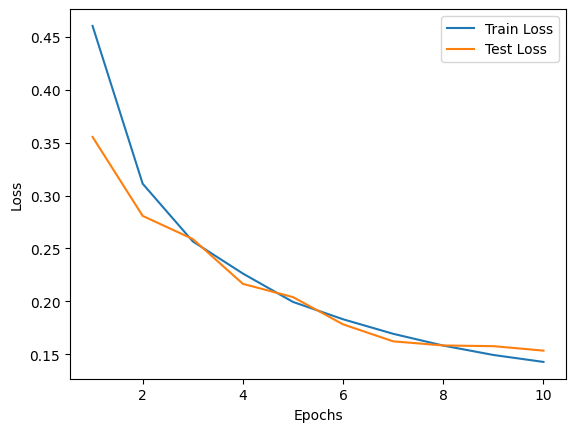

Confusion Matrix for 0:
[[17871    33   192     7    15]
 [  271   258    24     2     1]
 [   82     0  1360     4     2]
 [   66     0    52    44     0]
 [   83     1    64     0  1460]]


Confusion Matrix for 1:
[[  258   271    24     2     1]
 [   33 17871   192     7    15]
 [    0    82  1360     4     2]
 [    0    66    52    44     0]
 [    1    83    64     0  1460]]


Confusion Matrix for 2:
[[ 1360    82     0     4     2]
 [  192 17871    33     7    15]
 [   24   271   258     2     1]
 [   52    66     0    44     0]
 [   64    83     1     0  1460]]


Confusion Matrix for 3:
[[   44    66     0    52     0]
 [    7 17871    33   192    15]
 [    2   271   258    24     1]
 [    4    82     0  1360     2]
 [    0    83     1    64  1460]]


Confusion Matrix for 4:
[[ 1460    83     1    64     0]
 [   15 17871    33   192     7]
 [    1   271   258    24     2]
 [    2    82     0  1360     4]
 [    0    66     0    52    44]]


              precision    recall  f1-sc

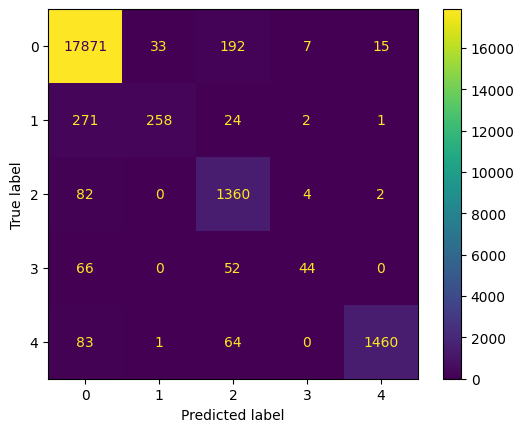

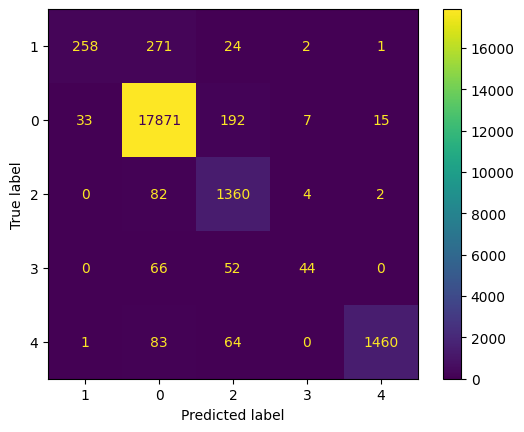

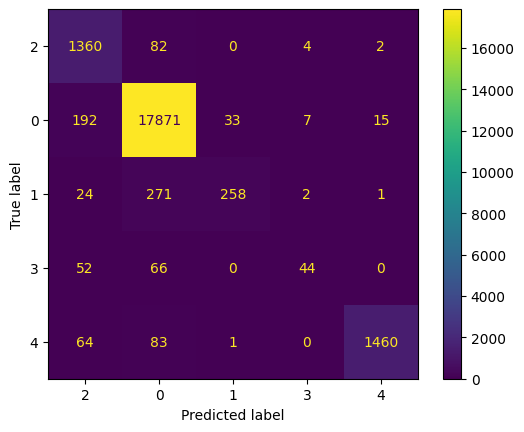

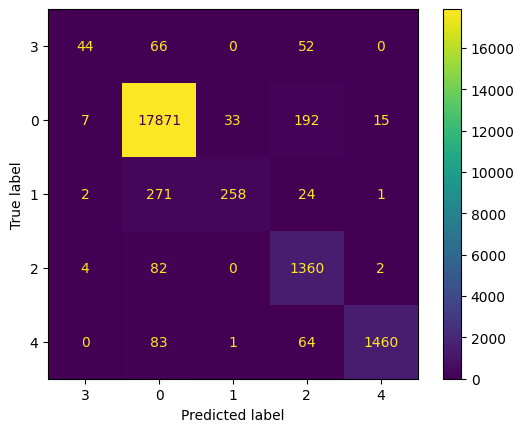

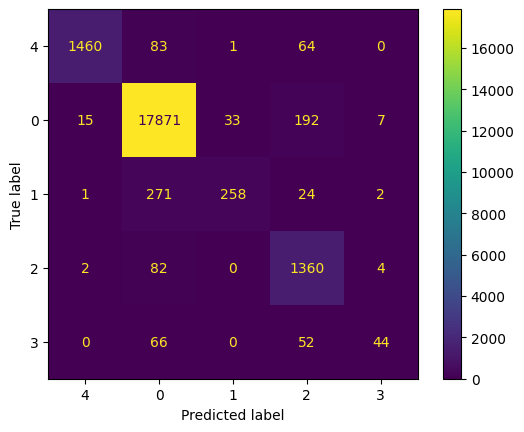

In [61]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]


model = ConvNet(input_channels=1, num_classes=5)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

## O arhitectură de tip recurent (LSTM sau BiLSTM)

In [15]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out.unsqueeze(2)

        for layer in self.hidden_layers:
            out = layer(out[:, -1, :])

        out = self.fc(out[:, -1, :])
        return out

Epoch [1/10], Validation Accuracy: 0.9379
Epoch [2/10], Validation Accuracy: 0.9509
Epoch [3/10], Validation Accuracy: 0.9568
Epoch [4/10], Validation Accuracy: 0.9634
Epoch [5/10], Validation Accuracy: 0.8810
Epoch [6/10], Validation Accuracy: 0.9675
Epoch [7/10], Validation Accuracy: 0.9676
Epoch [8/10], Validation Accuracy: 0.9686
Epoch [9/10], Validation Accuracy: 0.9674
Epoch [10/10], Validation Accuracy: 0.9687


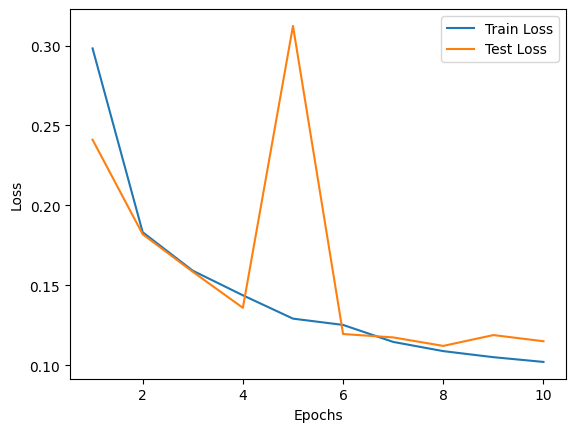

Confusion Matrix for 0:
[[18026    12    59    12     9]
 [  234   312     9     0     1]
 [  131     5  1291    16     5]
 [   53     0    28    81     0]
 [   94     0    18     0  1496]]


Confusion Matrix for 1:
[[  312   234     9     0     1]
 [   12 18026    59    12     9]
 [    5   131  1291    16     5]
 [    0    53    28    81     0]
 [    0    94    18     0  1496]]


Confusion Matrix for 2:
[[ 1291   131     5    16     5]
 [   59 18026    12    12     9]
 [    9   234   312     0     1]
 [   28    53     0    81     0]
 [   18    94     0     0  1496]]


Confusion Matrix for 3:
[[   81    53     0    28     0]
 [   12 18026    12    59     9]
 [    0   234   312     9     1]
 [   16   131     5  1291     5]
 [    0    94     0    18  1496]]


Confusion Matrix for 4:
[[ 1496    94     0    18     0]
 [    9 18026    12    59    12]
 [    1   234   312     9     0]
 [    5   131     5  1291    16]
 [    0    53     0    28    81]]


              precision    recall  f1-sc

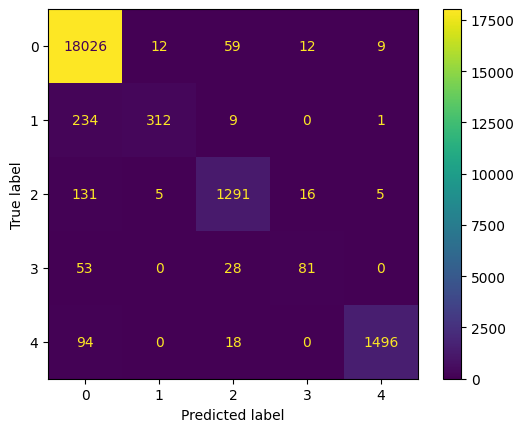

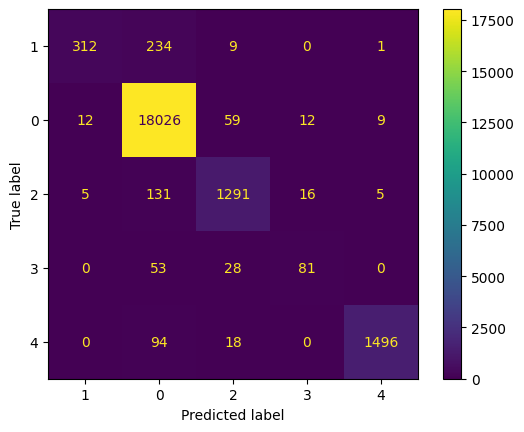

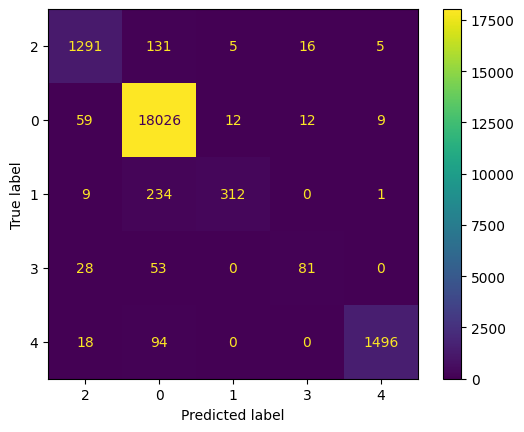

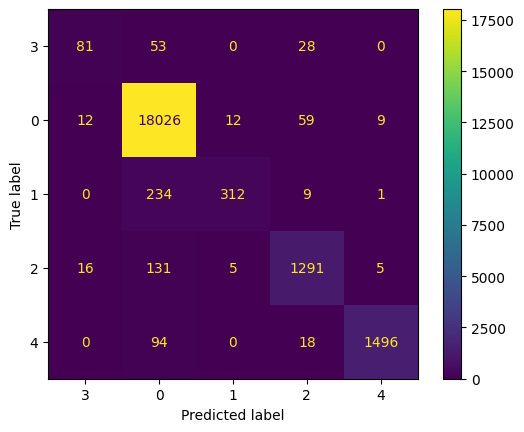

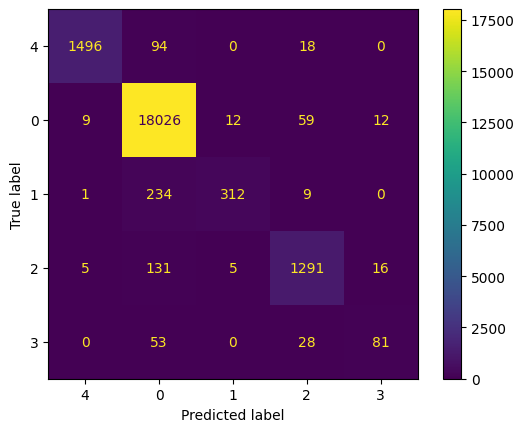

In [21]:
num_epochs = 10
lr_init = 0.001                # rata de învățare inițială
lr_factor = 0.1                # factorul de descreștere a ratei de învățare
weight_decay_factor = 1e-4     # factorul de descreștere a ponderii pentru regularizarea L2
lr_schedule_milestones = [50e3, 75e3, 100e3]

# Inițializarea modelului și a optimizatorului
model = LSTMModel(input_size=187, hidden_size=256, num_layers=2, num_classes=5)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

train_losses = []
test_losses = []

# Antrenamentul modelului
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    ct = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Propagarea înainte
        outputs = model(inputs)

        # Calcularea pierderii
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        ct += 1

        # Retropropagarea erorii și actualizarea parametrilor
        loss.backward()
        optimizer.step()

    lr_scheduler.step()

    # Calcularea pierderii medii pe setul de antrenament
    train_loss = running_loss / ct
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    ct = 0

    with torch.no_grad():
        total_correct = 0
        total_samples = 0

        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Propagarea înainte
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            # Calcularea pierderii
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Calcularea numărului de predicții corecte
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calcularea pierderii medii pe setul de testare și acurateței
        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples

        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

# Afișarea graficului evoluției pierderii pe setul de antrenament și setul de testare în funcție de epocă
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)


# PTB

In [62]:
ptbdb_abnormal = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/ptbdb_abnormal.csv', header=None)
ptbdb_normal = pd.read_csv('/content/drive/MyDrive/ML/Tema1/data2/ptbdb_normal.csv', header=None)

ptbdb = pd.concat([ptbdb_abnormal, ptbdb_normal], axis=0, ignore_index=True)
print(len(ptbdb))
ptbdb_train, ptbdb_test = train_test_split(ptbdb, test_size=0.2, random_state=42)


X = ptbdb.iloc[:, :-1]  # features (all columns except the last one)
y = ptbdb.iloc[:, -1]   # target (last column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


train_features = X_train
train_labels = y_train

test_features = X_test
test_labels = y_test

print(len(train_features))
print(len(test_features))


train_features_tensor = torch.Tensor(train_features.values).unsqueeze(1)
train_labels_tensor = torch.Tensor(train_labels.values).long()

test_features_tensor = torch.Tensor(test_features.values).unsqueeze(1)
test_labels_tensor = torch.Tensor(test_labels.values).long()

14552
11641
2911


In [63]:
BATCH_SIZE_TRAIN = 64  #@param
BATCH_SIZE_TEST = 64  #@param
NO_WORKERS = 2  #@param
SHUFFLE_DATA = True

train_dataset = torch.utils.data.TensorDataset(train_features_tensor, train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE_TRAIN, shuffle=SHUFFLE_DATA, num_workers=NO_WORKERS)

test_dataset = torch.utils.data.TensorDataset(test_features_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE_TEST, shuffle=SHUFFLE_DATA, num_workers=NO_WORKERS)

(batch_train_features, batch_train_labels) = next(iter(train_loader))

print(f'Shape of training features: {batch_train_features.size()}')
print(f'Shape of training labels: {batch_train_labels.size()}')

Shape of training features: torch.Size([64, 1, 187])
Shape of training labels: torch.Size([64])


## Multi-layered Perceptron(MLP)

In [26]:
class MLP(nn.Module):
    def __init__(self, n_features, num_classes=5, hidden_sizes=[256, 256]):
        super(MLP, self).__init__()
        self.n_features = n_features
        self.hidden_sizes = hidden_sizes
        self.num_layers = len(hidden_sizes)
        
        self.layers = nn.ModuleList([nn.Linear(n_features, hidden_sizes[0])])
        for i in range(self.num_layers - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i + 1]))
        self.fc_out = nn.Linear(hidden_sizes[-1], num_classes)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = x.view(-1, self.n_features)  # Flatten the input
        for layer in self.layers:
            x = self.relu(layer(x))
        x = self.fc_out(x)
        return x

Epoch [1/10], Validation Accuracy: 0.7870
Epoch [2/10], Validation Accuracy: 0.8227
Epoch [3/10], Validation Accuracy: 0.8475
Epoch [4/10], Validation Accuracy: 0.8557
Epoch [5/10], Validation Accuracy: 0.8753
Epoch [6/10], Validation Accuracy: 0.8963
Epoch [7/10], Validation Accuracy: 0.9007
Epoch [8/10], Validation Accuracy: 0.9014
Epoch [9/10], Validation Accuracy: 0.9035
Epoch [10/10], Validation Accuracy: 0.9148


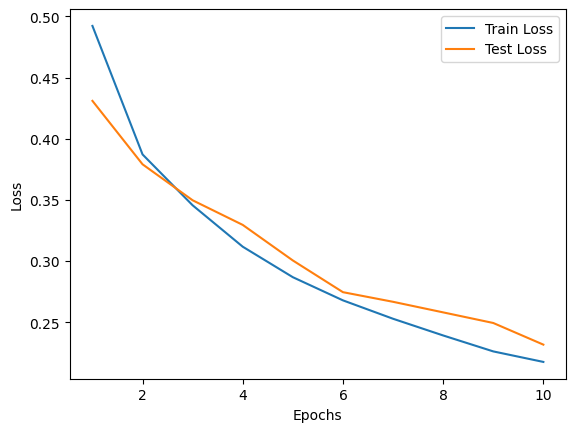

Confusion Matrix for 0:
[[ 657  152]
 [  96 2006]]


Confusion Matrix for 1:
[[2006   96]
 [ 152  657]]


              precision    recall  f1-score   support

           0       0.87      0.81      0.84       809
           1       0.93      0.95      0.94      2102

    accuracy                           0.91      2911
   macro avg       0.90      0.88      0.89      2911
weighted avg       0.91      0.91      0.91      2911



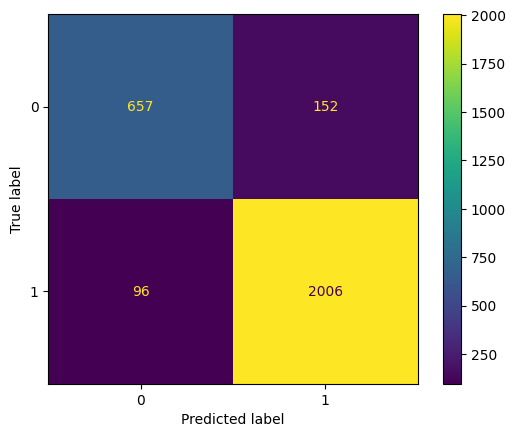

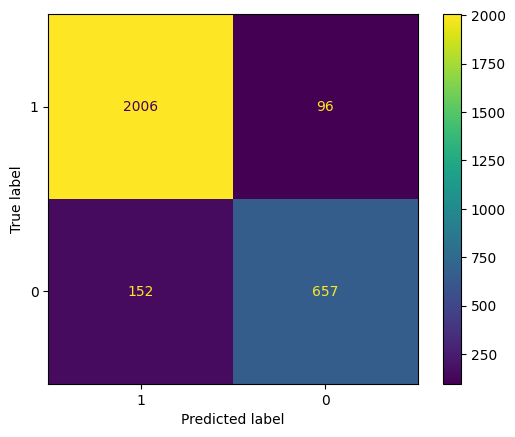

In [32]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]

hidden_sizes = [32, 32]  # Dimensiunile straturilor ascunse

model = MLP(n_features=187, num_classes=2, hidden_sizes=hidden_sizes)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

## Arhitectură de tip convoluțională

In [66]:
class ConvNet(nn.Module):
    def __init__(self, input_channels, num_classes):
        super(ConvNet, self).__init__()
        
        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(64, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(64, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(128, 128, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(128, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(256, 256, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        # )

        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 32, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        #     nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.MaxPool1d(kernel_size=2, stride=2),
        # )

        # self.conv_layers = nn.Sequential(
        #     nn.Conv1d(input_channels, 64, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        #     nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1),
        #     nn.ReLU(inplace=True),
        # )
        
        self.conv_layers = nn.Sequential(
          nn.Conv1d(input_channels, 64, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.Conv1d(64, 128, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.Conv1d(128, 256, kernel_size=3, stride=2, padding=1),
          nn.ReLU(inplace=True),
          nn.MaxPool1d(kernel_size=2, stride=2)
      )
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        
        self.fc_layers = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(inplace=True),
            nn.Linear(64, num_classes)
      )


    def forward(self, x):
        x = self.conv_layers(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

Epoch [1/10], Validation Accuracy: 0.7221
Epoch [2/10], Validation Accuracy: 0.7492
Epoch [3/10], Validation Accuracy: 0.7757
Epoch [4/10], Validation Accuracy: 0.7867
Epoch [5/10], Validation Accuracy: 0.7911
Epoch [6/10], Validation Accuracy: 0.8021
Epoch [7/10], Validation Accuracy: 0.8059
Epoch [8/10], Validation Accuracy: 0.8093
Epoch [9/10], Validation Accuracy: 0.8059
Epoch [10/10], Validation Accuracy: 0.8303


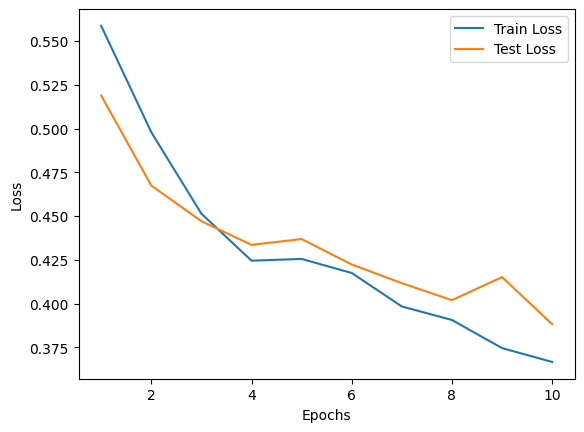

Confusion Matrix for 0:
[[ 421  388]
 [ 106 1996]]


Confusion Matrix for 1:
[[1996  106]
 [ 388  421]]


              precision    recall  f1-score   support

           0       0.80      0.52      0.63       809
           1       0.84      0.95      0.89      2102

    accuracy                           0.83      2911
   macro avg       0.82      0.73      0.76      2911
weighted avg       0.83      0.83      0.82      2911



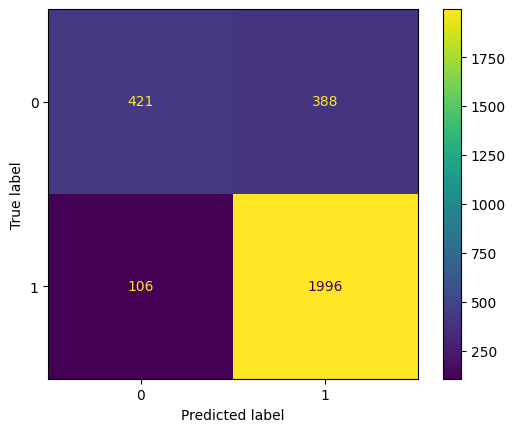

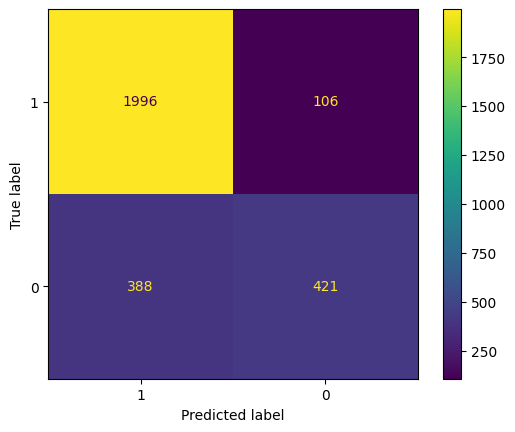

In [67]:
num_epochs = 10
lr_init = 0.001                # initial learning rate
lr_factor = 0.1             # learning rate decay factor
weight_decay_factor = 1e-4  # weight decay factor for L2 weight regularization
lr_schedule_milestones = [50e3, 75e3, 100e3]


model = ConvNet(input_channels=1, num_classes=2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

model.train()

running_loss = 0.0
running_acc = 0.0
ct = 0

train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()  # Set the model in training mode
    running_loss = 0.0
    ct = 0
    for inputs, labels in train_loader:

      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      
      # Backward pass and optimization
    
      loss.backward()
      optimizer.step()
      ct += 1
      running_loss+=loss.item()
    
    lr_scheduler.step()
    train_loss = running_loss / ct
    train_losses.append(train_loss)


    model.eval()
    running_loss = 0.0
    ct = 0
    with torch.no_grad():
        total_correct = 0
        total_samples = 0
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Count the number of correct predictions
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)

## O arhitectură de tip recurent (LSTM sau BiLSTM)

In [33]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.hidden_layers = nn.ModuleList([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = out.unsqueeze(2)

        for layer in self.hidden_layers:
            out = layer(out[:, -1, :])

        out = self.fc(out[:, -1, :])
        return out

Epoch [1/10], Validation Accuracy: 0.8145
Epoch [2/10], Validation Accuracy: 0.8337
Epoch [3/10], Validation Accuracy: 0.8348
Epoch [4/10], Validation Accuracy: 0.8578
Epoch [5/10], Validation Accuracy: 0.8688
Epoch [6/10], Validation Accuracy: 0.8856
Epoch [7/10], Validation Accuracy: 0.8949
Epoch [8/10], Validation Accuracy: 0.9021
Epoch [9/10], Validation Accuracy: 0.9048
Epoch [10/10], Validation Accuracy: 0.9086


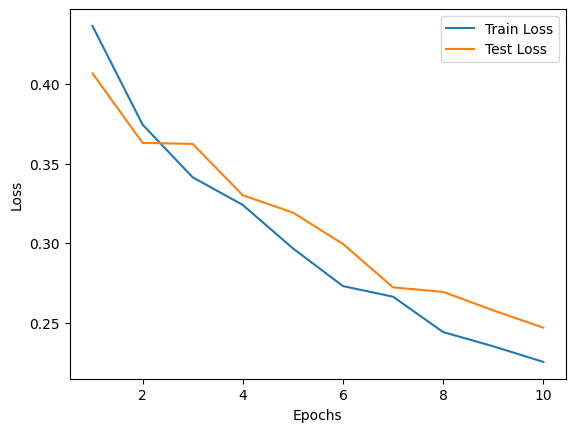

Confusion Matrix for 0:
[[ 703  106]
 [ 160 1942]]


Confusion Matrix for 1:
[[1942  160]
 [ 106  703]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       809
           1       0.95      0.92      0.94      2102

    accuracy                           0.91      2911
   macro avg       0.88      0.90      0.89      2911
weighted avg       0.91      0.91      0.91      2911



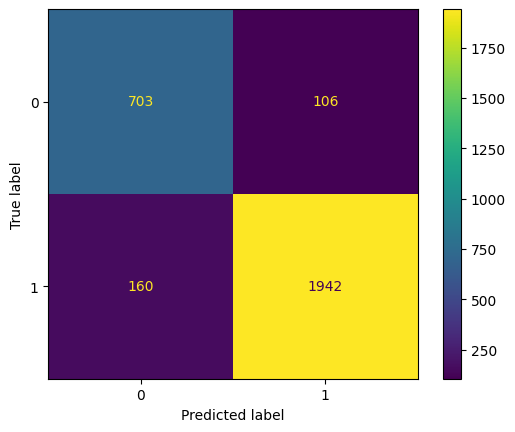

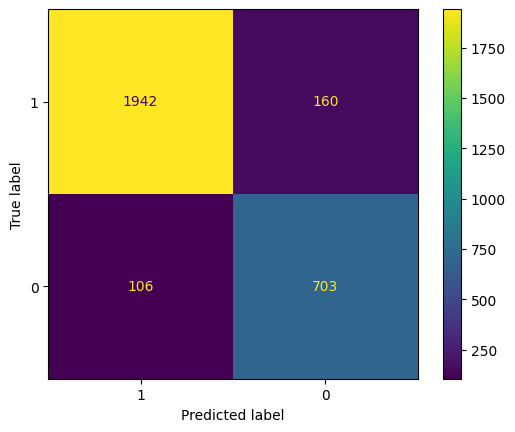

In [36]:
num_epochs = 10
lr_init = 0.001                # rata de învățare inițială
lr_factor = 0.1                # factorul de descreștere a ratei de învățare
weight_decay_factor = 1e-4     # factorul de descreștere a ponderii pentru regularizarea L2
lr_schedule_milestones = [50e3, 75e3, 100e3]

# Inițializarea modelului și a optimizatorului
model = LSTMModel(input_size=187, hidden_size=512, num_layers=2, num_classes=2)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr_init, weight_decay=weight_decay_factor)
lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=lr_schedule_milestones, gamma=lr_factor)

train_losses = []
test_losses = []

# Antrenamentul modelului
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    ct = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        # Propagarea înainte
        outputs = model(inputs)

        # Calcularea pierderii
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        ct += 1

        # Retropropagarea erorii și actualizarea parametrilor
        loss.backward()
        optimizer.step()

    lr_scheduler.step()

    # Calcularea pierderii medii pe setul de antrenament
    train_loss = running_loss / ct
    train_losses.append(train_loss)

    model.eval()
    running_loss = 0.0
    ct = 0

    with torch.no_grad():
        total_correct = 0
        total_samples = 0

        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Propagarea înainte
            outputs = model(inputs)
            _, predicted = torch.max(outputs, dim=1)

            # Calcularea pierderii
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            ct += 1

            # Calcularea numărului de predicții corecte
            total_correct += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calcularea pierderii medii pe setul de testare și acurateței
        test_loss = running_loss / ct
        test_losses.append(test_loss)
        accuracy = total_correct / total_samples

        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.4f}")

# Afișarea graficului evoluției pierderii pe setul de antrenament și setul de testare în funcție de epocă
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Obținerea predicțiilor modelului
        outputs = model(inputs)
        _, predicted = torch.max(outputs, dim=1)

        # Adăugarea predicțiilor și etichetelor în listele corespunzătoare
        all_predictions.extend(predicted.tolist())
        all_labels.extend(labels.tolist())


class_names = np.unique(all_labels)

# Afisarea matricii de confuzie pentru fiecare clasa
for i, class_name in enumerate(class_names):
    print(f"Confusion Matrix for {class_name}:")
    cm = confusion_matrix(all_labels, all_predictions, labels=[class_name, *set(class_names)-{class_name}])
    print(cm)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_name, *set(class_names)-{class_name}])
    disp.plot()
    
    print()
    print()

# Generarea raportului de clasificare
report = classification_report(all_labels, all_predictions, zero_division=1)
print(report)
